In [3]:
from keras.layers import Input, Dense, Reshape, Dropout, Activation
from keras.layers import LSTM, Bidirectional, BatchNormalization, ZeroPadding2D
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
import tensorflow as tf
import pygame
import copy
import pretty_midi

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
import librosa
import mir_eval
import mir_eval.display
import IPython.display
import re
from mido  import MidiFile
from music21 import converter, instrument, note, chord, midi, stream, converter

import glob

In [6]:
from magenta.music.protobuf import music_pb2
import pretty_midi as pm
from magenta.music import note_sequence_io, midi_io
import six
#midi = pm.PrettyMIDI("rock.mid")
#mm.midi_to_sequence_proto(midi)

In [7]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plot
import sklearn
import seaborn as sns


import pandas_profiling

#Path for the groove dataset

MIDI_PATH = "/home/mark/repos/Springboard/data/"
DATA_PATH = "/home/mark/repos/Springboard/data/info.csv"

groove_df = pd.read_csv(DATA_PATH)
groove_df

drummer                session                        id  \
0     drummer1  drummer1/eval_session   drummer1/eval_session/1   
1     drummer1  drummer1/eval_session  drummer1/eval_session/10   
2     drummer1  drummer1/eval_session   drummer1/eval_session/2   
3     drummer1  drummer1/eval_session   drummer1/eval_session/3   
4     drummer1  drummer1/eval_session   drummer1/eval_session/4   
...        ...                    ...                       ...   
1145  drummer2      drummer2/session2      drummer2/session2/11   
1146  drummer2      drummer2/session2      drummer2/session2/12   
1147  drummer2      drummer2/session2      drummer2/session2/13   
1148  drummer2      drummer2/session2      drummer2/session2/14   
1149  drummer2      drummer2/session2      drummer2/session2/15   

              style  bpm beat_type time_signature  \
0      funk/groove1  138      beat            4-4   
1     soul/groove10  102      beat            4-4   
2      funk/groove2  105      beat            4-4   
3      soul/groove3   86      beat            4-4   
4      soul/groove4   80      beat            4-4   
...             ...  ...       ...            ...   
1145           rock  130      beat            4-4   
1146           rock  130      beat            4-4   
1147           rock  130      beat            4-4   
1148           rock  130      beat            4-4   
1149           rock  130      beat            4-4   

                                          midi_filename  \
0     drummer1/eval_session/1_funk-groove1_138_beat_...   
1     drummer1/eval_session/10_soul-groove10_102_bea...   
2     drummer1/eval_session/2_funk-groove2_105_beat_...   
3     drummer1/eval_session/3_soul-groove3_86_beat_4...   
4     drummer1/eval_session/4_soul-groove4_80_beat_4...   
...                                                 ...   
1145         drummer2/session2/11_rock_130_beat_4-4.mid   
1146         drummer2/session2/12_rock_130_beat_4-4.mid   
1147         drummer2/session2/13_rock_130_beat_4-4.mid   
1148         drummer2/session2/14_rock_130_beat_4-4.mid   
1149         drummer2/session2/15_rock_130_beat_4-4.mid   

                                         audio_filename   duration  split  
0     drummer1/eval_session/1_funk-groove1_138_beat_...  27.872308   test  
1     drummer1/eval_session/10_soul-groove10_102_bea...  37.691158   test  
2     drummer1/eval_session/2_funk-groove2_105_beat_...  36.351218   test  
3     drummer1/eval_session/3_soul-groove3_86_beat_4...  44.716543   test  
4     drummer1/eval_session/4_soul-groove4_80_beat_4...  47.987500   test  
...                                                 ...        ...    ...  
1145                                                NaN   1.909613  train  
1146                                                NaN   1.808652  train  
1147                                                NaN   1.864421  train  
1148                                                NaN   1.875960  train  
1149                                                NaN   3.714419  train  

[1150 rows x 11 columns]

In [8]:
groove_df['style'].value_counts()

rock                        281
hiphop                       91
funk                         77
punk                         58
neworleans/funk              48
                           ... 
middleeastern                 1
latin/venezuelan-sangueo      1
rock/folk                     1
rock/rockabilly               1
latin/dominican-merengue      1
Name: style, Length: 76, dtype: int64

In [9]:
#pandas_profiling.ProfileReport(groove_df)

In [10]:
groove_df = groove_df[groove_df.beat_type != 'fill']
short = groove_df[groove_df.duration <=30]
short.count()
#43 < 5 seconds
#158 < 30 seconds
#261 < 1 minute

drummer           158
session           158
id                158
style             158
bpm               158
beat_type         158
time_signature    158
midi_filename     158
audio_filename    148
duration          158
split             158
dtype: int64

In [11]:
groove_df['style'].value_counts()

rock                  193
funk                   36
hiphop                 30
jazz                   24
afrobeat               13
                     ... 
rock/folk               1
jazz/klezmer            1
latin/merengue          1
funk/fast               1
funk/purdieshuffle      1
Name: style, Length: 76, dtype: int64

In [12]:
groove_df = groove_df[groove_df.audio_filename.isna() == False]
groove_df.count()

drummer           444
session           444
id                444
style             444
bpm               444
beat_type         444
time_signature    444
midi_filename     444
audio_filename    444
duration          444
split             444
dtype: int64

In [13]:
#sample = groove_df.iloc[0]
#midi_sample = MIDI_PATH + sample.midi_filename
#audio_sample = MIDI_PATH + sample.audio_filename
#pm = pm.PrettyMIDI(midi_sample)

In [14]:
groove_df['style'].value_counts()

rock                  171
hiphop                 28
funk                   28
jazz                   24
jazz/swing             11
                     ... 
funk/fast               1
afrocuban/bembe         1
latin/bomba             1
neworleans/shuffle      1
jazz/fast               1
Name: style, Length: 74, dtype: int64

In [15]:
groove_df['style'].value_counts()

rock                  171
hiphop                 28
funk                   28
jazz                   24
jazz/swing             11
                     ... 
funk/fast               1
afrocuban/bembe         1
latin/bomba             1
neworleans/shuffle      1
jazz/fast               1
Name: style, Length: 74, dtype: int64

In [16]:
#pandas_profiling.ProfileReport(groove_df)

In [17]:
single_styles = groove_df[groove_df['duration'] <= 20]
#single_styles

In [18]:
styles = groove_df['style'].value_counts()
style_durations = pd.DataFrame(columns=['style','max','min','sum'])
for s in styles.index:
    style_df = groove_df.query('style=="'+s+'"')
    style_durations = style_durations.append({'style': s, 'max': style_df['duration'].max(), 
                                             'min': style_df['duration'].min(), 'sum': style_df['duration'].sum()},
                                             ignore_index=True)
#print(style_df.count())
style_durations.sort_values(by=['sum'], ascending='True')

style         max         min          sum
63            latin/merengue   18.304597   18.304597    18.304597
62              jazz/klezmer   37.595410   37.595410    37.595410
58  latin/venezuelan-sangueo   80.779648   80.779648    80.779648
51           latin/reggaeton   87.784634   87.784634    87.784634
73                 jazz/fast  105.048858  105.048858   105.048858
..                       ...         ...         ...          ...
48     latin/brazilian-bossa  611.564048  582.125068  1193.689116
3                       jazz  183.415349    3.196875  1383.800351
1                     hiphop  191.755389    4.361367  1849.707697
2                       funk  297.670000    4.482500  3206.277720
0                       rock  305.406445    1.290000  8478.819136

[74 rows x 4 columns]

In [19]:
#Method 1: Add the multi-style to the first substyle.
test_df = groove_df
for s in styles.index:
    if '/' in s:
        print(s)
        style_a,style_b = s.split('/')
        print(s.split('/'))
        if style_a in styles.index:
            print(style_a)
            split_style = groove_df.query('style=="'+s+'"')
            test_df = test_df.replace({'style':{s:style_a}})
            #groove_df = groove_df.replace({'style':{s:style_a}})
        if style_b in styles.index:
            print(style_b)
            split_style = groove_df.query('style=="'+s+'"')
            test_df = test_df.replace({'style':{s:style_b}})
            groove_df = groove_df.replace({'style':{s:style_b}})
#groove_df['style'].value_counts()
#test_df['style'].value_counts()

jazz/swing
['jazz', 'swing']
jazz
neworleans/funk
['neworleans', 'funk']
funk
latin/brazilian-samba
['latin', 'brazilian-samba']
latin
soul/groove10
['soul', 'groove10']
soul
latin/brazilian
['latin', 'brazilian']
latin
jazz/fusion
['jazz', 'fusion']
jazz
hiphop/groove6
['hiphop', 'groove6']
hiphop
soul/groove3
['soul', 'groove3']
soul
funk/groove5
['funk', 'groove5']
funk
blues/shuffle
['blues', 'shuffle']
soul/motown
['soul', 'motown']
soul
pop/groove7
['pop', 'groove7']
pop
rock/groove8
['rock', 'groove8']
rock
soul/groove4
['soul', 'groove4']
soul
soul/groove9
['soul', 'groove9']
soul
funk/groove2
['funk', 'groove2']
funk
funk/groove1
['funk', 'groove1']
funk
latin/chacarera
['latin', 'chacarera']
latin
rock/prog
['rock', 'prog']
rock
pop/soft
['pop', 'soft']
pop
neworleans/secondline
['neworleans', 'secondline']
dance/disco
['dance', 'disco']
rock/shuffle
['rock', 'shuffle']
rock
latin/brazilian-sambareggae
['latin', 'brazilian-sambareggae']
latin
latin/brazilian-songo
['latin', '

In [20]:
#styles = groove_df['style'].value_counts()
styles = test_df['style'].value_counts()
style_durations = pd.DataFrame(columns=['style','max','min','sum'])
for s in styles.index:
    style_df = groove_df.query('style=="'+s+'"')
    style_durations = style_durations.append({'style': s, 'max': style_df['duration'].max(), 
                                             'min': style_df['duration'].min(), 'sum': int(style_df['duration'].sum())},
                                             ignore_index=True)
#print(style_df.count())
#style_durations.sort_values(by=['sum'], ascending='True')



In [21]:
styles_removed = style_durations[style_durations['sum'] < 100]
#print(styles_removed)
#groove_df = groove_df[groove_df.style]

In [22]:
#Generates MIDI list for each genre
genre_midi_list = {}
for s in styles.index:
    style_df = groove_df.query('style=="'+s+'"')
    genre_midi_list[s] = style_df.midi_filename.tolist()


In [23]:


def create_midi_old(prediction_output):
    offset = 0
    output_notes = []
    
    for item in prediction_output:
        print(item)
        pattern = item[0]
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)
        offset += 0.5
    print(output_notes)
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='/home/mark/repos/Springboard/test_output.mid')

In [24]:
def create_midi_d(prediction_output):
    offset = 0
    output_notes = []
    
    pm = midi.percussion.PercussionMapper()

    for item in prediction_output:
        print(item)
        pattern = item[0]
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                try:
                    print(type(pm.midiPitchToInstrument(new_note.pitch)))
                    new_note.storedInstrument = pm.midiPitchToInstrument(new_note.pitch)
                    print(new_note.storedInstrument)
                    notes.append(new_note)
                except:
                    print('aaaa')
                    pass
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        else:
            new_note = note.Note(pattern)
            #print(new_note.storedInstrument)
            new_note.offset = offset
            try:
                print(type(pm.midiPitchToInstrument(new_note.pitch)))
                new_note.storedInstrument = pm.midiPitchToInstrument(new_note.pitch)
                output_notes.append(new_note)
            except:
                print('bbbb')
                pass
        offset += 0.5
    print(output_notes)
    midi_stream = stream.Stream()
    midi_stream.append(output_notes)
    midi_stream.write('midi', fp='/home/mark/repos/Springboard/test_output.mid')

In [90]:
r_len = int(len(genre_midi_list['rock'])/2)
#print(genre_midi_list['rock'])
#r_list = genre_midi_list['rock'][:r_len]
#r_list = ["drummer1/session2/6_rock_102_beat_3-4.mid"]
r_list = groove_df.midi_filename.tolist()
#r_list = genre_midi_list['rock']

In [26]:

n_x = 79
max_T_x = 1000
sequence_length = 20
T_y_generated = 200

In [27]:
def get_notes(midi_list):
    notes = []
    for file in midi_list:
        midi = pretty_midi.PrettyMIDI(MIDI_PATH + file)
        for instrument in midi.instruments:
            if instrument.is_drum:
                for note in instrument.notes:
                    if int(note.pitch) >= 35 and int(note.pitch) <= 81:
                        notes.append((note.pitch))
    return notes

In [28]:
def get_notes_music21(midi_list):
    """ Get all the notes and chords from the midi files """
    notes = []

    for file in midi_list:
        midi = converter.parse(MIDI_PATH + file)

        print("Parsing %s" % file)

        notes_to_parse = None
        try: # file has instrument parts
            s2 = instrument.partitionByInstrument(midi)
            notes_to_parse = s2.parts[0].recurse() 
        except: # file has notes in a flat structure
            notes_to_parse = midi.flat.notes
        #pm = percussion.PercussionMapper()     
        for element in notes_to_parse:
            if isinstance(element, note.Note):
                midiNumber = element.pitch.midi
                notes.append(str(midiNumber))
                #if midiNumber>=35 and midiNumber<=81:
                #    try:
                        #bassDrum1Pitch = pitch.Pitch(midiNumber)
                        #mapping = pm.midiPitchToInstrument(bassDrum1Pitch)
                        #print (bassDrum1Pitch, mapping)
                        #notes.append(str(midiNumber))
                        #notes.append(bassDrum1Pitch)
                    #except:
                    #    pass
            elif isinstance(element, chord.Chord):
                pitches = element.pitches
            #    notes.append(str(n.midi) for n in pitches)
                for pitch in pitches:
                    midiNumber = pitch.midi
                    #print(pitch.midi)
                    notes.append(str(midiNumber))
                    #notes.append('.'.join(str(pitch.midi) for n in element.normalOrder))
            #    notes.append('.'.join(str(n) for n in element.normalOrder))

    return notes



In [29]:
def prepare_sequences_l(notes, sequence_length):
    print("\n**Preparing sequences for training**")
    pitchnames = sorted(set(i for i in notes)) # list of unique chords and notes
    n_vocab = len(pitchnames)
    print("Pitchnames (unique notes/chords from 'notes') at length {}: {}".format(len(pitchnames),pitchnames))
    # enumerate pitchnames into dictionary embedding
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
    print("Note to integer embedding created at length {}".format(len(note_to_int)))

    network_input = []
    network_output = []

    # i equals total notes less declared sequence length of LSTM (ie 5000 - 100)
    # sequence input for each i is list of notes i to end of sequence length (ie 0-100 for i = 0)
    # sequence output for each i is single note at i + sequence length (ie 100 for i = 0)
    for i in range(0, len(notes) - sequence_length,1):
        sequence_in = notes[i:i + sequence_length] # 100
        sequence_out = notes[i + sequence_length] # 1

        # enumerate notes and chord sequences with note_to_int enumerated encoding
        # network input/output is a list of encoded notes and chords based on note_to_int encoding
        # if 100 unique notes/chords, the encoding will be between 0-100
        input_add = [note_to_int[char] for char in sequence_in]
        network_input.append(input_add) # sequence length
        output_add = note_to_int[sequence_out]
        network_output.append(output_add) # single note

    print("Network input and output created with (pre-transform) lengths {} and {}".format(len(network_input),len(network_output)))
    # print("Network input and output first list items: {} and {}".format(network_input[0],network_output[0]))
    # print("Network input list item length: {}".format(len(network_input[0])))
    n_patterns = len(network_input) # notes less sequence length
    print("Lengths. N Vocab: {} N Patterns: {} Pitchnames: {}".format(n_vocab,n_patterns, len(pitchnames)))
    print("\n**Reshaping for training**")

    # convert network input/output from lists to numpy arrays
    # reshape input to (notes less sequence length, sequence length)
    # reshape output to (notes less sequence length, unique notes/chords)
    network_input_r = np.reshape(network_input, (n_patterns, sequence_length, 1))
    network_output_r = np_utils.to_categorical(network_output)

    print("Reshaping network input to (notes - sequence length, sequence length) {}".format(network_input_r.shape))
    print("Reshaping network output to (notes - sequence length, unique notes) {}".format(network_output_r.shape))
    return network_input_r, network_output_r, n_patterns, n_vocab, pitchnames

In [30]:
def prepare_sequences(notes, n_vocab):
    sequence_length = 100
    print("\n**Preparing sequences for training**")
    pitchnames = sorted(set(i for i in notes)) # list of unique chords and notes
    #n_vocab = len(pitchnames)
    print("Pitchnames (unique notes/chords from 'notes') at length {}: {}".format(len(pitchnames),pitchnames))
    # enumerate pitchnames into dictionary embedding
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
    print("Note to integer embedding created at length {}".format(len(note_to_int)))

    network_input = []
    network_output = []

    # i equals total notes less declared sequence length of LSTM (ie 5000 - 100)
    # sequence input for each i is list of notes i to end of sequence length (ie 0-100 for i = 0)
    # sequence output for each i is single note at i + sequence length (ie 100 for i = 0)
    for i in range(0, len(notes) - sequence_length,1):
        sequence_in = notes[i:i + sequence_length] # 100
        sequence_out = notes[i + sequence_length] # 1

        # enumerate notes and chord sequences with note_to_int enumerated encoding
        # network input/output is a list of encoded notes and chords based on note_to_int encoding
        # if 100 unique notes/chords, the encoding will be between 0-100
        input_add = [note_to_int[char] for char in sequence_in]
        network_input.append(input_add) # sequence length
        output_add = note_to_int[sequence_out]
        network_output.append(output_add) # single note

    print("Network input and output created with (pre-transform) lengths {} and {}".format(len(network_input),len(network_output)))
    # print("Network input and output first list items: {} and {}".format(network_input[0],network_output[0]))
    # print("Network input list item length: {}".format(len(network_input[0])))
    n_patterns = len(network_input) # notes less sequence length
    print("Lengths. N Vocab: {} N Patterns: {} Pitchnames: {}".format(n_vocab,n_patterns, len(pitchnames)))
    print("\n**Reshaping for training**")

    # convert network input/output from lists to numpy arrays
    # reshape input to (notes less sequence length, sequence length)
    # reshape output to (notes less sequence length, unique notes/chords)
    network_input_r = np.reshape(network_input, (n_patterns, sequence_length, 1))
    
    #Normalize input
    network_input_r = (network_input_r - (float(n_vocab) / 2)) / (float(n_vocab) / 2)
    
    network_output_r = np_utils.to_categorical(network_output)

    print("Reshaping network input to (notes - sequence length, sequence length) {}".format(network_input_r.shape))
    print("Reshaping network output to (notes - sequence length, unique notes) {}".format(network_output_r.shape))
    return network_input_r, network_output_r, n_patterns, n_vocab, pitchnames

In [31]:
notes = get_notes(r_list)
n_vocab = len(set(notes))
print (set(notes))
#print(notes)
#network_input,network_output = prepare_sequences(notes, n_vocab)
#print (network_input,network_output )

{36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59}


In [32]:
#print (set(notes))
#notes = get_notes(["drummer3/session2/9_rock_100_beat_4-4.mid"])
#print(notes)

In [33]:
network_input, network_output, n_patterns, n_vocab, pitchnames = prepare_sequences(notes, n_vocab)


**Preparing sequences for training**
Pitchnames (unique notes/chords from 'notes') at length 20: [36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59]
Note to integer embedding created at length 20
Network input and output created with (pre-transform) lengths 56277 and 56277
Lengths. N Vocab: 20 N Patterns: 56277 Pitchnames: 20

**Reshaping for training**
Reshaping network input to (notes - sequence length, sequence length) (56277, 100, 1)
Reshaping network output to (notes - sequence length, unique notes) (56277, 20)


{40: 4127, 38: 11508, 48: 1695, 43: 2413, 36: 14287, 55: 790, 51: 6779, 42: 5179, 44: 4783, 52: 504, 37: 458, 58: 105, 50: 279, 47: 127, 46: 555, 45: 896, 53: 1033, 57: 230, 59: 600, 49: 29}


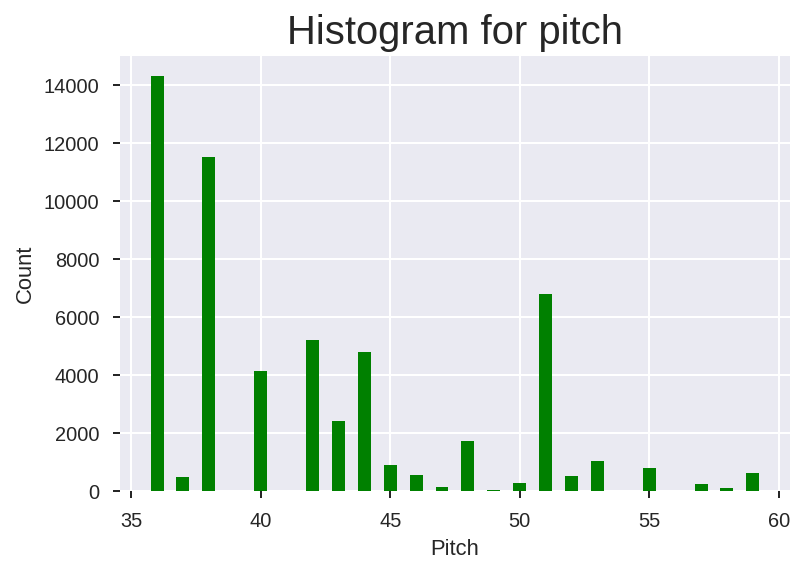

In [34]:
#importing library
from collections import Counter
freq = dict(Counter(notes))
print (freq)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#set figure
f, ax = plt.subplots(1,1)

#plt.figure(figsize=(15,5))
plt.bar(freq.keys(), freq.values(), width=.5, color='g')
#set title & axis titles
ax.set_title('Histogram for pitch', fontsize=20)
ax.set_xlabel('Pitch')
ax.set_ylabel('Count')
plt.show()

In [79]:
class GAN():
    def __init__(self, rows):
        self.seq_length = rows
        self.seq_shape = (self.seq_length, 1)
        self.latent_dim = 1000
        self.disc_loss = []
        self.gen_loss =[]
        
        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates note sequence
        
        z = Input(shape=(self.latent_dim,))
        generated_seq = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(generated_seq)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        

    def build_discriminator(self):

        model = Sequential()
        model.add(LSTM(512, input_shape=self.seq_shape, return_sequences=True))
        model.add(Bidirectional(LSTM(512)))
        #model.add(Dropout(0.4))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.3))
        #model.add(Dropout(0.4))
        model.add(Dense(256))
        #model.add(Dropout(0.4))
        model.add(LeakyReLU(alpha=0.3))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        seq = Input(shape=self.seq_shape)
        validity = model(seq)

        return Model(seq, validity)
      
    def build_generator(self):

        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.3))
        model.add(BatchNormalization(momentum=0.8))
        #model.add(Dropout(0.4))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.3))
        model.add(BatchNormalization(momentum=0.8))
        #model.add(Dropout(0.4))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.3))
        model.add(BatchNormalization(momentum=0.8))
        #model.add(Dropout(0.4))
        model.add(Dense(np.prod(self.seq_shape), activation='sigmoid'))
        model.add(Reshape(self.seq_shape))
        #model.add(Dropout(0.4))
        model.summary()
        
        noise = Input(shape=(self.latent_dim,))
        seq = model(noise)

        return Model(noise, seq)

    def train(self, genre_dataset, epochs, batch_size=128, sample_interval=50):

        # Load and convert the data
        notes = get_notes(genre_dataset)
        n_vocab = len(set(notes))
        X_train, y_train, n_patterns, n_vocab, pitchnames = prepare_sequences(notes, n_vocab)

        # Adversarial ground truths
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        # Training the model
        for epoch in range(epochs):

            # Training the discriminator
            # Select a random batch of note sequences
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_seqs = X_train[idx]

            #noise = np.random.choice(range(484), (batch_size, self.latent_dim))
            #noise = (noise-242)/242
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            
            # Generate a batch of new note sequences
            
            gen_seqs = self.generator.predict(noise)
            

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(real_seqs, real)
            d_loss_fake = self.discriminator.train_on_batch(gen_seqs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            #  Training the Generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            #valid_y = np.array([1] * batch_size)
            
            # Train the generator (to have the discriminator label samples as real)
            g_loss = self.combined.train_on_batch(noise, real)

            # Print the progress and save into loss lists
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

In [91]:
gan = GAN(rows=100)
gan.train(genre_dataset=r_list, epochs=200, batch_size=32, sample_interval=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 512)          1052672   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 1024)              4198400   
_________________________________________________________________
dense_50 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 257       
Total para

/home/mark/.local/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.682782, acc.: 96.88%] [G loss: 0.754189]


/home/mark/.local/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.616294, acc.: 100.00%] [G loss: 0.878575]
2 [D loss: 0.478259, acc.: 100.00%] [G loss: 1.486154]
3 [D loss: 0.139512, acc.: 100.00%] [G loss: 6.440076]
4 [D loss: 0.001488, acc.: 100.00%] [G loss: 12.096827]
5 [D loss: 0.000008, acc.: 100.00%] [G loss: 13.848015]
6 [D loss: 0.000001, acc.: 100.00%] [G loss: 14.341358]
7 [D loss: 0.000003, acc.: 100.00%] [G loss: 14.461512]
8 [D loss: 0.000018, acc.: 100.00%] [G loss: 14.487623]
9 [D loss: 0.000003, acc.: 100.00%] [G loss: 14.502110]
10 [D loss: 0.000001, acc.: 100.00%] [G loss: 14.482676]
11 [D loss: 0.000015, acc.: 100.00%] [G loss: 14.506823]
12 [D loss: 0.000001, acc.: 100.00%] [G loss: 14.511356]
13 [D loss: 0.000002, acc.: 100.00%] [G loss: 14.479186]
14 [D loss: 0.000003, acc.: 100.00%] [G loss: 14.498940]
15 [D loss: 0.000002, acc.: 100.00%] [G loss: 14.485930]
16 [D loss: 0.000001, acc.: 100.00%] [G loss: 14.476082]
17 [D loss: 0.000001, acc.: 100.00%] [G loss: 14.462326]
18 [D loss: 0.000001, acc.: 100.00%] [G los

148 [D loss: 1.743719, acc.: 89.06%] [G loss: 7.710430]
149 [D loss: 2.241916, acc.: 85.94%] [G loss: 8.053049]
150 [D loss: 1.245520, acc.: 92.19%] [G loss: 7.744384]
151 [D loss: 2.241916, acc.: 85.94%] [G loss: 7.139457]
152 [D loss: 0.996420, acc.: 93.75%] [G loss: 8.069386]
153 [D loss: 1.893499, acc.: 87.50%] [G loss: 2.685624]
154 [D loss: 2.749891, acc.: 82.81%] [G loss: 3.203355]
155 [D loss: 1.498357, acc.: 90.62%] [G loss: 4.212380]
156 [D loss: 1.993945, acc.: 87.50%] [G loss: 4.427624]
157 [D loss: 1.495368, acc.: 90.62%] [G loss: 5.128489]
158 [D loss: 2.491426, acc.: 84.38%] [G loss: 5.121773]
159 [D loss: 2.242246, acc.: 85.94%] [G loss: 5.040033]
160 [D loss: 1.744038, acc.: 89.06%] [G loss: 5.793728]
161 [D loss: 1.993075, acc.: 87.50%] [G loss: 5.474520]
162 [D loss: 2.242137, acc.: 85.94%] [G loss: 6.016382]
163 [D loss: 1.743925, acc.: 89.06%] [G loss: 5.625353]
164 [D loss: 1.992995, acc.: 87.50%] [G loss: 5.967017]
165 [D loss: 2.740255, acc.: 82.81%] [G loss: 5.

In [92]:
notes = get_notes(r_list)
#n_vocab = len(notes)
#X_train_list,Y_train_list = prepare_sequences(notes, n_vocab)


In [93]:
def generate(gan, input_notes):
        # Get pitch names and store in a dictionary
        notes = input_notes
        
        pitchnames = sorted(set(item for item in notes))
        int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
        #print (int_to_note)
        # Use random noise to generate sequences
        noise = np.random.normal(0, 1, (1, gan.latent_dim))

        predictions = gan.generator.predict(noise)
        #print(predictions)
        pred_notes = [x*47+47 for x in predictions[0]]
        #pred_notes = [int_to_note[int(x)] for x in pred_notes]
        notess = []
        #print(len(pred_notes))
        for x in pred_notes:
            #print(x)
            #if x >=35 and x <=81:
            notess.append(int(x))
        #pred_notes = [int_to_note[int(x)] for x in notess]
        return notess

In [100]:
predictions = generate(gan, notes)
print(predictions)

[50, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 47, 47, 52, 50, 47, 47, 75, 60, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93]


In [101]:
def create_midi(notes):
    new_midi_data = pretty_midi.PrettyMIDI()
    drum = pretty_midi.Instrument(program=0, is_drum=True, name="Midi Drums" )
    time = 0
    step = 0.25
    len_notes = len(notes)
    vec_arr = np.random.uniform(50,125,len_notes)
    delta_arr = np.random.uniform(0.2,0.5,len_notes)
    for i,note_number in enumerate(notes):
        myNote = pretty_midi.Note(velocity=int(vec_arr[i]), pitch=int(note_number), start=time, end=time+delta_arr[i])
        drum.notes.append(myNote)
        time += step
    new_midi_data.instruments.append(drum)
    return new_midi_data

new_midi_data = create_midi(predictions)
new_midi_data.write('/home/mark/repos/Springboard/final_5.mid')

In [70]:
def create_midi_a(notes):
    new_midi_data = pretty_midi.PrettyMIDI()
    #drum_program = pretty_midi.instrument_name_to_program('SteelDrums')
    drum = pretty_midi.Instrument(program=0, is_drum=True, name="Midi Drums" )
    time = 0
    step = 0.1
    for note_number in notes:
        myNote = pretty_midi.Note(velocity=90, pitch=int(note_number), start=time, end=time+step)
        drum.notes.append(myNote)
        time += step
    new_midi_data.instruments.append(drum)
    return new_midi_data

new_midi_data = create_midi(predictions)
new_midi_data.write('/home/mark/repos/Springboard/final.mid')

In [41]:
def create_midi_l(notes):
    new_midi_data = pretty_midi.PrettyMIDI()
    drum_program = pretty_midi.instrument_name_to_program('SteelDrums')
    drum = pretty_midi.Instrument(program=drum_program)
    time = 0
    step = 0.1
    for note_number in notes[0]:
        print(type(note_number))
        for note1 in note_number:
            myNote = pretty_midi.Note(velocity=100, pitch=int(note1), start=time, end=time+step)
            print(myNote)
            drum.notes.append(myNote)
            time += step
    new_midi_data.instruments.append(drum)
    return new_midi_data

new_midi_data = create_midi(predictions)
print (new_midi_data)
new_midi_data.write('/home/mark/repos/Springboard/final.mid')

<class 'numpy.ndarray'>
Note(start=0.000000, end=0.100000, pitch=1, velocity=100)
Note(start=0.100000, end=0.200000, pitch=-1, velocity=100)
Note(start=0.200000, end=0.300000, pitch=1, velocity=100)
Note(start=0.300000, end=0.400000, pitch=1, velocity=100)
Note(start=0.400000, end=0.500000, pitch=-1, velocity=100)
Note(start=0.500000, end=0.600000, pitch=-1, velocity=100)
Note(start=0.600000, end=0.700000, pitch=-1, velocity=100)
Note(start=0.700000, end=0.800000, pitch=-1, velocity=100)
Note(start=0.800000, end=0.900000, pitch=-1, velocity=100)
Note(start=0.900000, end=1.000000, pitch=1, velocity=100)
Note(start=1.000000, end=1.100000, pitch=1, velocity=100)
Note(start=1.100000, end=1.200000, pitch=-1, velocity=100)
Note(start=1.200000, end=1.300000, pitch=-1, velocity=100)
Note(start=1.300000, end=1.400000, pitch=1, velocity=100)
Note(start=1.400000, end=1.500000, pitch=1, velocity=100)
Note(start=1.500000, end=1.600000, pitch=1, velocity=100)
Note(start=1.600000, end=1.700000, pitch

Note(start=76.500000, end=76.600000, pitch=1, velocity=100)
Note(start=76.600000, end=76.700000, pitch=0, velocity=100)
Note(start=76.700000, end=76.800000, pitch=-1, velocity=100)
Note(start=76.800000, end=76.900000, pitch=-1, velocity=100)
Note(start=76.900000, end=77.000000, pitch=-1, velocity=100)
Note(start=77.000000, end=77.100000, pitch=-1, velocity=100)
Note(start=77.100000, end=77.200000, pitch=-1, velocity=100)
Note(start=77.200000, end=77.300000, pitch=1, velocity=100)
Note(start=77.300000, end=77.400000, pitch=-1, velocity=100)
Note(start=77.400000, end=77.500000, pitch=1, velocity=100)
Note(start=77.500000, end=77.600000, pitch=0, velocity=100)
Note(start=77.600000, end=77.700000, pitch=1, velocity=100)
Note(start=77.700000, end=77.800000, pitch=-1, velocity=100)
Note(start=77.800000, end=77.900000, pitch=-1, velocity=100)
Note(start=77.900000, end=78.000000, pitch=1, velocity=100)
Note(start=78.000000, end=78.100000, pitch=1, velocity=100)
Note(start=78.100000, end=78.200

Note(start=148.700000, end=148.800000, pitch=1, velocity=100)
Note(start=148.800000, end=148.900000, pitch=-1, velocity=100)
Note(start=148.900000, end=149.000000, pitch=-1, velocity=100)
Note(start=149.000000, end=149.100000, pitch=1, velocity=100)
Note(start=149.100000, end=149.200000, pitch=1, velocity=100)
Note(start=149.200000, end=149.300000, pitch=1, velocity=100)
Note(start=149.300000, end=149.400000, pitch=1, velocity=100)
Note(start=149.400000, end=149.500000, pitch=1, velocity=100)
Note(start=149.500000, end=149.600000, pitch=-1, velocity=100)
Note(start=149.600000, end=149.700000, pitch=-1, velocity=100)
Note(start=149.700000, end=149.800000, pitch=-1, velocity=100)
Note(start=149.800000, end=149.900000, pitch=-1, velocity=100)
Note(start=149.900000, end=150.000000, pitch=-1, velocity=100)
Note(start=150.000000, end=150.100000, pitch=-1, velocity=100)
<class 'numpy.ndarray'>
Note(start=150.100000, end=150.200000, pitch=-1, velocity=100)
Note(start=150.200000, end=150.300000

Note(start=222.100000, end=222.200000, pitch=1, velocity=100)
Note(start=222.200000, end=222.300000, pitch=1, velocity=100)
Note(start=222.300000, end=222.400000, pitch=-1, velocity=100)
Note(start=222.400000, end=222.500000, pitch=0, velocity=100)
Note(start=222.500000, end=222.600000, pitch=1, velocity=100)
Note(start=222.600000, end=222.700000, pitch=1, velocity=100)
Note(start=222.700000, end=222.800000, pitch=1, velocity=100)
Note(start=222.800000, end=222.900000, pitch=1, velocity=100)
Note(start=222.900000, end=223.000000, pitch=1, velocity=100)
Note(start=223.000000, end=223.100000, pitch=-1, velocity=100)
Note(start=223.100000, end=223.200000, pitch=-1, velocity=100)
Note(start=223.200000, end=223.300000, pitch=-1, velocity=100)
Note(start=223.300000, end=223.400000, pitch=-1, velocity=100)
Note(start=223.400000, end=223.500000, pitch=1, velocity=100)
Note(start=223.500000, end=223.600000, pitch=1, velocity=100)
Note(start=223.600000, end=223.700000, pitch=1, velocity=100)
Not

Note(start=298.400000, end=298.500000, pitch=0, velocity=100)
Note(start=298.500000, end=298.600000, pitch=0, velocity=100)
Note(start=298.600000, end=298.700000, pitch=1, velocity=100)
Note(start=298.700000, end=298.800000, pitch=1, velocity=100)
Note(start=298.800000, end=298.900000, pitch=1, velocity=100)
Note(start=298.900000, end=299.000000, pitch=0, velocity=100)
Note(start=299.000000, end=299.100000, pitch=-1, velocity=100)
Note(start=299.100000, end=299.200000, pitch=1, velocity=100)
Note(start=299.200000, end=299.300000, pitch=-1, velocity=100)
Note(start=299.300000, end=299.400000, pitch=1, velocity=100)
Note(start=299.400000, end=299.500000, pitch=1, velocity=100)
Note(start=299.500000, end=299.600000, pitch=1, velocity=100)
Note(start=299.600000, end=299.700000, pitch=-1, velocity=100)
Note(start=299.700000, end=299.800000, pitch=-1, velocity=100)
Note(start=299.800000, end=299.900000, pitch=0, velocity=100)
Note(start=299.900000, end=300.000000, pitch=1, velocity=100)
Note

Note(start=372.500000, end=372.600000, pitch=-1, velocity=100)
Note(start=372.600000, end=372.700000, pitch=1, velocity=100)
Note(start=372.700000, end=372.800000, pitch=1, velocity=100)
Note(start=372.800000, end=372.900000, pitch=-1, velocity=100)
Note(start=372.900000, end=373.000000, pitch=1, velocity=100)
Note(start=373.000000, end=373.100000, pitch=-1, velocity=100)
Note(start=373.100000, end=373.200000, pitch=-1, velocity=100)
Note(start=373.200000, end=373.300000, pitch=-1, velocity=100)
Note(start=373.300000, end=373.400000, pitch=1, velocity=100)
Note(start=373.400000, end=373.500000, pitch=1, velocity=100)
Note(start=373.500000, end=373.600000, pitch=1, velocity=100)
Note(start=373.600000, end=373.700000, pitch=1, velocity=100)
Note(start=373.700000, end=373.800000, pitch=1, velocity=100)
Note(start=373.800000, end=373.900000, pitch=0, velocity=100)
Note(start=373.900000, end=374.000000, pitch=-1, velocity=100)
Note(start=374.000000, end=374.100000, pitch=0, velocity=100)
No

Note(start=448.200000, end=448.300000, pitch=-1, velocity=100)
Note(start=448.300000, end=448.400000, pitch=-1, velocity=100)
Note(start=448.400000, end=448.500000, pitch=-1, velocity=100)
Note(start=448.500000, end=448.600000, pitch=1, velocity=100)
Note(start=448.600000, end=448.700000, pitch=-1, velocity=100)
Note(start=448.700000, end=448.800000, pitch=1, velocity=100)
Note(start=448.800000, end=448.900000, pitch=1, velocity=100)
Note(start=448.900000, end=449.000000, pitch=1, velocity=100)
Note(start=449.000000, end=449.100000, pitch=-1, velocity=100)
Note(start=449.100000, end=449.200000, pitch=-1, velocity=100)
Note(start=449.200000, end=449.300000, pitch=1, velocity=100)
Note(start=449.300000, end=449.400000, pitch=-1, velocity=100)
Note(start=449.400000, end=449.500000, pitch=1, velocity=100)
Note(start=449.500000, end=449.600000, pitch=1, velocity=100)
Note(start=449.600000, end=449.700000, pitch=1, velocity=100)
Note(start=449.700000, end=449.800000, pitch=1, velocity=100)
N

Note(start=513.700000, end=513.800000, pitch=1, velocity=100)
Note(start=513.800000, end=513.900000, pitch=1, velocity=100)
Note(start=513.900000, end=514.000000, pitch=0, velocity=100)
Note(start=514.000000, end=514.100000, pitch=-1, velocity=100)
Note(start=514.100000, end=514.200000, pitch=1, velocity=100)
Note(start=514.200000, end=514.300000, pitch=1, velocity=100)
Note(start=514.300000, end=514.400000, pitch=1, velocity=100)
Note(start=514.400000, end=514.500000, pitch=1, velocity=100)
Note(start=514.500000, end=514.600000, pitch=1, velocity=100)
Note(start=514.600000, end=514.700000, pitch=-1, velocity=100)
Note(start=514.700000, end=514.800000, pitch=0, velocity=100)
Note(start=514.800000, end=514.900000, pitch=1, velocity=100)
Note(start=514.900000, end=515.000000, pitch=1, velocity=100)
Note(start=515.000000, end=515.100000, pitch=1, velocity=100)
Note(start=515.100000, end=515.200000, pitch=1, velocity=100)
Note(start=515.200000, end=515.300000, pitch=1, velocity=100)
Note(s

Note(start=606.000000, end=606.100000, pitch=0, velocity=100)
Note(start=606.100000, end=606.200000, pitch=-1, velocity=100)
Note(start=606.200000, end=606.300000, pitch=1, velocity=100)
Note(start=606.300000, end=606.400000, pitch=-1, velocity=100)
Note(start=606.400000, end=606.500000, pitch=1, velocity=100)
Note(start=606.500000, end=606.600000, pitch=1, velocity=100)
Note(start=606.600000, end=606.700000, pitch=-1, velocity=100)
Note(start=606.700000, end=606.800000, pitch=1, velocity=100)
Note(start=606.800000, end=606.900000, pitch=1, velocity=100)
Note(start=606.900000, end=607.000000, pitch=1, velocity=100)
Note(start=607.000000, end=607.100000, pitch=-1, velocity=100)
Note(start=607.100000, end=607.200000, pitch=-1, velocity=100)
Note(start=607.200000, end=607.300000, pitch=1, velocity=100)
Note(start=607.300000, end=607.400000, pitch=1, velocity=100)
Note(start=607.400000, end=607.500000, pitch=1, velocity=100)
Note(start=607.500000, end=607.600000, pitch=-1, velocity=100)
No

Note(start=660.700000, end=660.800000, pitch=0, velocity=100)
Note(start=660.800000, end=660.900000, pitch=1, velocity=100)
Note(start=660.900000, end=661.000000, pitch=1, velocity=100)
Note(start=661.000000, end=661.100000, pitch=-1, velocity=100)
Note(start=661.100000, end=661.200000, pitch=1, velocity=100)
Note(start=661.200000, end=661.300000, pitch=1, velocity=100)
Note(start=661.300000, end=661.400000, pitch=-1, velocity=100)
Note(start=661.400000, end=661.500000, pitch=-1, velocity=100)
Note(start=661.500000, end=661.600000, pitch=-1, velocity=100)
Note(start=661.600000, end=661.700000, pitch=-1, velocity=100)
Note(start=661.700000, end=661.800000, pitch=-1, velocity=100)
Note(start=661.800000, end=661.900000, pitch=-1, velocity=100)
Note(start=661.900000, end=662.000000, pitch=-1, velocity=100)
Note(start=662.000000, end=662.100000, pitch=0, velocity=100)
Note(start=662.100000, end=662.200000, pitch=1, velocity=100)
Note(start=662.200000, end=662.300000, pitch=1, velocity=100)


Note(start=734.900000, end=735.000000, pitch=-1, velocity=100)
Note(start=735.000000, end=735.100000, pitch=1, velocity=100)
Note(start=735.100000, end=735.200000, pitch=1, velocity=100)
Note(start=735.200000, end=735.300000, pitch=-1, velocity=100)
Note(start=735.300000, end=735.400000, pitch=1, velocity=100)
Note(start=735.400000, end=735.500000, pitch=-1, velocity=100)
Note(start=735.500000, end=735.600000, pitch=-1, velocity=100)
Note(start=735.600000, end=735.700000, pitch=1, velocity=100)
Note(start=735.700000, end=735.800000, pitch=1, velocity=100)
Note(start=735.800000, end=735.900000, pitch=-1, velocity=100)
Note(start=735.900000, end=736.000000, pitch=-1, velocity=100)
Note(start=736.000000, end=736.100000, pitch=1, velocity=100)
Note(start=736.100000, end=736.200000, pitch=1, velocity=100)
Note(start=736.200000, end=736.300000, pitch=-1, velocity=100)
Note(start=736.300000, end=736.400000, pitch=-1, velocity=100)
Note(start=736.400000, end=736.500000, pitch=1, velocity=100)


ValueError: data byte must be in range 0..127

In [27]:
def midi_to_note_sequence(midi_list):
    notes = []
    for file in midi_list:
        notes_to_parse = midi_io.midi_file_to_note_sequence(MIDI_PATH + file)
        
        #ONLY WORKING WITH DRUM TRACKS ONLY
        #notes_to_parse = midi_io.note_sequence_to_pretty_midi(midi_retrieved)
        #print(notes_to_parse.notes)
        for element in notes_to_parse.notes:
            notes.append(element)
        
    return notes

In [28]:
def midi_to_notes(midi_list):
    """Retrieves all notes from midi files passed from midi list"""
    
    notes = []
    for file in midi_list:
        midi_retrieved = converter.parse(MIDI_PATH + file)            
        
        print("Parsing %s", midi_retrieved)
        
        notes_to_parse = None
        
        try:#file has instrument parts
            s2 = instrument.partitionByInstrument(midi_retrieved)
            print(s2.parts)
            notes_to_parse = s2.parts[0].recurse()
        
        except:#File notes have flat structure
            notes_to_parse = midi_retrieved.flat.notes
        
        for element in notes_to_parse:
            if isinstance(element, note.Note):
                notes.append(str(element.pitch))
            elif isinstance(element, chord.Chord):
                notes.append('.'.join(str(n) for n in element.normalOrder))
        
    return notes

In [29]:
def midi_to_notes_old(midi_list):
    """Retrieves all notes from midi files passed from midi list"""
    
    pm = midi.percussion.PercussionMapper()
    
    notes = []
    for file in midi_list:
        midi_retrieved = converter.parse(MIDI_PATH + file)
        
        print("Parsing %s", file)
        
        notes_to_parse = None
        
        try:#file has instrument parts
            s2 = instrument.partitionByInstrument(midi_retrieved)
            print(s2.parts)
            notes_to_parse = s2.parts[0].recurse()
        
        except:#File notes have flat structure
            notes_to_parse = midi_retrieved.flat.notes
        
        for element in notes_to_parse:
            if isinstance(element, note.Note):
                #print("NOTE")
                print(element)
                #print(element.pitch.midi)
                try:
                    pm.midiPitchToInstrument(element.pitch)
                    element.storedInstrument = pm.midiPitchToInstrument(element.pitch)
                    #print(pm.midiPitchToInstrument(element.pitch.midi))
                    notes.append(str(element.pitch))
                    #print("**********")
                except:
                    pass
                    #print("EEEEE")
                    #print("**********")
            elif isinstance(element, chord.Chord):
                #print("CHORD")
                #print(element)
                chord_notes = ''
                #for n, n_order in zip(element,element.normalOrder):
                    #print(n)
                    #print(n_order)
                    #try:
                        #pm.midiPitchToInstrument(n.pitch.midi)
                        #chord_notes = chord_notes + '.'.join(str(n_order))
                        #print(pm.midiPitchToInstrument(n.pitch.midi))
                    #except:
                        #print("RRRRR")
                #notes.append(chord_notes)
                notes.append('.'.join(str(n) for n in element.normalOrder))
                #print("**********")
        
    return notes

In [31]:
def prepare_sequences_test(notes, n_vocab):
    sequence_length = 100
    network_input = []
    network_output = []
    sequence_in = []
    sequence_out = []
    print("Inputs")
    for i in range(len(notes)):
        print(i)
        for t in range(len(notes[i])-sequence_length):
            network_input = notes[i][t:t+sequence_length]
            network_output = notes[i][t+ sequence_length]
        sequence_in.append(c for c in network_input)
        sequence_out.append(network_output)
    #sequence_in = np.asarray(network_input)
    print("input")
    print(len(network_input))
    print("output")
    print(len(network_output))
    print("seq_in")
    print(sequence_in)
    print("seq_out")
    print(sequence_out)   
    #sequence_out = np.asarray(network_output)

    print("X_train.shape:", sequence_in.shape)
    print("y_train.shape:", sequence_out.shape)
    return (sequence_in, sequence_out)

In [32]:
def prepare_sequences_old(notes,n_vocab):
    """ Prepare the sequences used by the Neural Network"""
    sequence_length = 100
    
    #Retrieve all pitch names
    pitchnames = sorted(set(item for item in notes))
    
    #Create a dictionary to map pitches to integers
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
    
    input_network = []
    output_network = []
    #Create the input sequences and the corresponding outputs
    for i in range(0, len(notes) - sequence_length, 1):
        input_sequence = notes[i:i+sequence_length]
        output_sequence = notes[i+sequence_length]
        input_network.append([note_to_int[c] for c in input_sequence])
        output_network.append(note_to_int[output_sequence])
    print(len(output_sequence))
    print(len(input_sequence))
    print(len(output_network))
    print(len(input_network))
    n_patterns = len(input_network)
    
    #Reshape input into compatible format for LSTM layers
    input_network = np.reshape(input_network, (n_patterns, sequence_length, 1))

    #Normalize input
    input_network = (input_network - (float(n_vocab) / 2)) / (float(n_vocab) / 2)
    output_network = np_utils.to_categorical(output_network)
    
    return(input_network, output_network)
    #Why did you implement a conditional statement with input/output or input/normalized??

In [35]:
#TEST AREA

#frames per sec is something to figure out
r_len = int(len(genre_midi_list['rock'])/2)
#print(genre_midi_list['rock'])
r_list = genre_midi_list['rock'][:r_len]

#rock_notes = get_notes(genre_midi_list['rock'])
#rock_vocab = len(rock_notes)
#network_input,network_output = prepare_sequences(rock_notes, rock_vocab)

#print(network_input)
#print(network_output)
#pitch_from_instrument = pm.midiInstrumentToPitch(s2)

#print(pitch_from_instrument)

#rock_list = midi_to_note_sequence(genre_midi_list['rock'])
#rock_notes = midi_to_notes(genre_midi_list['rock'])
#rock_vocab = len(set(rock_notes))
#print(rock_vocab)
#rock_notes = midi_to_notes(["drummer1/session2/6_rock_102_beat_3-4.mid"])
#rock_notes = midi_to_notes_old(["drummer1/session2/6_rock_102_beat_3-4.mid"])
#X_train, y_train = prepare_sequences_old(rock_notes, rock_vocab)
#print(X_train)
#print(y_train)
#rock_notes = midi_to_note_sequence(["drummer1/session2/6_rock_102_beat_3-4.mid"])
#rock_vocab = len(set(rock_notes))
#rock_vocab = len(set(rock_notes))
#print(rock_notes)
#print(rock_vocab)
#print(rock_vocab)
#pandas_profiling.ProfileReport(rock_list)

In [42]:
gan = drum_gan(rows=100)
gan.train(genre_dataset=r_list, epochs=15, batch_size=10, sample_interval=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 512)          1212416   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1024)              4198400   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
__________

/home/mark/.local/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.694049, acc: 50.15%] [G loss: 0.692253]


/home/mark/.local/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.691543, acc: 55.45%] [G loss: 0.692974]
2 [D loss: 0.686850, acc: 61.65%] [G loss: 0.692387]
3 [D loss: 0.680666, acc: 67.15%] [G loss: 0.691811]
4 [D loss: 0.670429, acc: 71.40%] [G loss: 0.692219]
5 [D loss: 0.640987, acc: 75.15%] [G loss: 0.694521]
6 [D loss: 0.562772, acc: 79.40%] [G loss: 0.782650]
7 [D loss: 0.439784, acc: 80.35%] [G loss: 1.457105]
8 [D loss: 0.313712, acc: 87.70%] [G loss: 1.277284]
9 [D loss: 0.369541, acc: 87.60%] [G loss: 1.552698]
10 [D loss: 0.189807, acc: 92.75%] [G loss: 2.082508]
11 [D loss: 0.170390, acc: 93.65%] [G loss: 2.715905]
12 [D loss: 0.125977, acc: 95.15%] [G loss: 2.187093]
13 [D loss: 0.119428, acc: 96.10%] [G loss: 2.161993]
14 [D loss: 0.136309, acc: 92.75%] [G loss: 3.997290]


In [46]:
notes = get_notes(r_list)
print(notes)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0.

In [47]:
#notes = midi_to_notes(r_list)
#notes = get_notes(r_list)
gan.generate(notes)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=0.000000, end=0.100000, pitch=0, velocity=100)
0.0
Note(start=0.100000, end=0.200000, pitch=0, velocity=100)
0.0
Note(start=0.200000, end=0.300000, pitch=0, velocity=100)
0.0
Note(start=0.300000, end=0.400000, pitch=0, velocity=100)
0.0
Note(start=0.400000, end=0.500000, pitch=0, velocity=100)
0.0
Note(start=0.500000, end=0.600000, pitch=0, velocity=100)
0.0
Note(start=0.600000, end=0.700000, pitch=0, velocity=100)
0.0
Note(start=0.700000, end=0.800000, pitch=0, velocity=100)
0.0
Note(start=0.800000, end=0.900000, pitch=0, velocity=100)
0.0
Note(start=0.900000, end=1.000000, pitch=0, velocity=100)
0.0
Note(start=1.000000, end=1.100000, pitch=0, velocity=100)
0.0
Note(start=1.100000, end=1.200000, pitch=0, velocity=100)
0.0
Note(start

Note(start=34.800000, end=34.900000, pitch=0, velocity=100)
0.0
Note(start=34.900000, end=35.000000, pitch=0, velocity=100)
0.0
Note(start=35.000000, end=35.100000, pitch=0, velocity=100)
1.0
Note(start=35.100000, end=35.200000, pitch=1, velocity=100)
0.0
Note(start=35.200000, end=35.300000, pitch=0, velocity=100)
0.0
Note(start=35.300000, end=35.400000, pitch=0, velocity=100)
0.0
Note(start=35.400000, end=35.500000, pitch=0, velocity=100)
0.0
Note(start=35.500000, end=35.600000, pitch=0, velocity=100)
0.0
Note(start=35.600000, end=35.700000, pitch=0, velocity=100)
0.0
Note(start=35.700000, end=35.800000, pitch=0, velocity=100)
0.0
Note(start=35.800000, end=35.900000, pitch=0, velocity=100)
0.0
Note(start=35.900000, end=36.000000, pitch=0, velocity=100)
0.0
Note(start=36.000000, end=36.100000, pitch=0, velocity=100)
0.0
Note(start=36.100000, end=36.200000, pitch=0, velocity=100)
0.0
Note(start=36.200000, end=36.300000, pitch=0, velocity=100)
0.0
Note(start=36.300000, end=36.400000, pit

0.0
Note(start=71.200000, end=71.300000, pitch=0, velocity=100)
0.0
Note(start=71.300000, end=71.400000, pitch=0, velocity=100)
0.0
Note(start=71.400000, end=71.500000, pitch=0, velocity=100)
0.0
Note(start=71.500000, end=71.600000, pitch=0, velocity=100)
0.0
Note(start=71.600000, end=71.700000, pitch=0, velocity=100)
0.0
Note(start=71.700000, end=71.800000, pitch=0, velocity=100)
0.0
Note(start=71.800000, end=71.900000, pitch=0, velocity=100)
0.0
Note(start=71.900000, end=72.000000, pitch=0, velocity=100)
0.0
Note(start=72.000000, end=72.100000, pitch=0, velocity=100)
0.0
Note(start=72.100000, end=72.200000, pitch=0, velocity=100)
0.0
Note(start=72.200000, end=72.300000, pitch=0, velocity=100)
0.0
Note(start=72.300000, end=72.400000, pitch=0, velocity=100)
0.0
Note(start=72.400000, end=72.500000, pitch=0, velocity=100)
0.0
Note(start=72.500000, end=72.600000, pitch=0, velocity=100)
0.0
Note(start=72.600000, end=72.700000, pitch=0, velocity=100)
0.0
Note(start=72.700000, end=72.800000,

0.0
Note(start=103.200000, end=103.300000, pitch=0, velocity=100)
0.0
Note(start=103.300000, end=103.400000, pitch=0, velocity=100)
0.0
Note(start=103.400000, end=103.500000, pitch=0, velocity=100)
0.0
Note(start=103.500000, end=103.600000, pitch=0, velocity=100)
0.0
Note(start=103.600000, end=103.700000, pitch=0, velocity=100)
0.0
Note(start=103.700000, end=103.800000, pitch=0, velocity=100)
0.0
Note(start=103.800000, end=103.900000, pitch=0, velocity=100)
0.0
Note(start=103.900000, end=104.000000, pitch=0, velocity=100)
0.0
Note(start=104.000000, end=104.100000, pitch=0, velocity=100)
0.0
Note(start=104.100000, end=104.200000, pitch=0, velocity=100)
0.0
Note(start=104.200000, end=104.300000, pitch=0, velocity=100)
0.0
Note(start=104.300000, end=104.400000, pitch=0, velocity=100)
0.0
Note(start=104.400000, end=104.500000, pitch=0, velocity=100)
0.0
Note(start=104.500000, end=104.600000, pitch=0, velocity=100)
0.0
Note(start=104.600000, end=104.700000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=136.100000, end=136.200000, pitch=0, velocity=100)
0.0
Note(start=136.200000, end=136.300000, pitch=0, velocity=100)
0.0
Note(start=136.300000, end=136.400000, pitch=0, velocity=100)
0.0
Note(start=136.400000, end=136.500000, pitch=0, velocity=100)
0.0
Note(start=136.500000, end=136.600000, pitch=0, velocity=100)
0.0
Note(start=136.600000, end=136.700000, pitch=0, velocity=100)
0.0
Note(start=136.700000, end=136.800000, pitch=0, velocity=100)
0.0
Note(start=136.800000, end=136.900000, pitch=0, velocity=100)
0.0
Note(start=136.900000, end=137.000000, pitch=0, velocity=100)
0.0
Note(start=137.000000, end=137.100000, pitch=0, velocity=100)
0.0
Note(start=137.100000, end=137.200000, pitch=0, velocity=100)
0.0
Note(start=137.200000, end=137.300000, pitch=0, velocity=100)
0.0
Note(start=137.300000, end=137.400000, pitch=0, velocity=100)
0.0
Note(start=137.400000, end=137.500000, pitch=0, velocity=100)
0.0
Note(start=137.500000, end=137.600000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=172.600000, end=172.700000, pitch=0, velocity=100)
0.0
Note(start=172.700000, end=172.800000, pitch=0, velocity=100)
0.0
Note(start=172.800000, end=172.900000, pitch=0, velocity=100)
0.0
Note(start=172.900000, end=173.000000, pitch=0, velocity=100)
0.0
Note(start=173.000000, end=173.100000, pitch=0, velocity=100)
0.0
Note(start=173.100000, end=173.200000, pitch=0, velocity=100)
0.0
Note(start=173.200000, end=173.300000, pitch=0, velocity=100)
0.0
Note(start=173.300000, end=173.400000, pitch=0, velocity=100)
0.0
Note(start=173.400000, end=173.500000, pitch=0, velocity=100)
0.0
Note(start=173.500000, end=173.600000, pitch=0, velocity=100)
0.0
Note(start=173.600000, end=173.700000, pitch=0, velocity=100)
0.0
Note(start=173.700000, end=173.800000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Note(start=206.100000, end=206.200000, pitch=0, velocity=100)
0.0
Note(start=206.200000, end=206.300000, pitch=0, velocity=100)
0.0
Note(start=206.300000, end=206.400000, pitch=0, velocity=100)
0.0
Note(start=206.400000, end=206.500000, pitch=0, velocity=100)
0.0
Note(start=206.500000, end=206.600000, pitch=0, velocity=100)
0.0
Note(start=206.600000, end=206.700000, pitch=0, velocity=100)
0.0
Note(start=206.700000, end=206.800000, pitch=0, velocity=100)
0.0
Note(start=206.800000, end=206.900000, pitch=0, velocity=100)
0.0
Note(start=206.900000, end=207.000000, pitch=0, velocity=100)
0.0
Note(start=207.000000, end=207.100000, pitch=0, velocity=100)
0.0
Note(start=207.100000, end=207.200000, pitch=0, velocity=100)
0.0
Note(start=207.200000, end=207.300000, pitch=0, velocity=100)
0.0
Note(start=207.300000, end=207.400000, pitch=0, velocity=100)
0.0
Note(start=207.400000, end=207.500000, pitch=0, velocity=100)
0.0
Note(start=207.500000, end=207.600000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=235.500000, end=235.600000, pitch=0, velocity=100)
0.0
Note(start=235.600000, end=235.700000, pitch=0, velocity=100)
0.0
Note(start=235.700000, end=235.800000, pitch=0, velocity=100)
0.0
Note(start=235.800000, end=235.900000, pitch=0, velocity=100)
0.0
Note(start=235.900000, end=236.000000, pitch=0, velocity=100)
0.0
Note(start=236.000000, end=236.100000, pitch=0, velocity=100)
0.0
Note(start=236.100000, end=236.200000, pitch=0, velocity=100)
0.0
Note(start=236.200000, end=236.300000, pitch=0, velocity=100)
0.0
Note(start=236.300000, end=236.400000, pitch=0, velocity=100)
0.0
Note(start=236.400000, end=236.500000, pitch=0, velocity=100)
0.0
Note(start=236.500000, end=236.600000, pitch=0, velocity=100)
0.0
Note(start=236.600000, end=236.700000, pitch=0, velocity=100)
0.0
Note(start=236.700000, end=236.800000, pitch=0, velocity=100)
0.0
Note(start=236.800000, end=236.900000, pitch=0, velocity=100)
0.0
Note(start=236.900000, end=237.000000, pitch=0, velocity=100)
[0. 0. 0. 

0.0
Note(start=267.600000, end=267.700000, pitch=0, velocity=100)
0.0
Note(start=267.700000, end=267.800000, pitch=0, velocity=100)
0.0
Note(start=267.800000, end=267.900000, pitch=0, velocity=100)
0.0
Note(start=267.900000, end=268.000000, pitch=0, velocity=100)
0.0
Note(start=268.000000, end=268.100000, pitch=0, velocity=100)
0.0
Note(start=268.100000, end=268.200000, pitch=0, velocity=100)
0.0
Note(start=268.200000, end=268.300000, pitch=0, velocity=100)
0.0
Note(start=268.300000, end=268.400000, pitch=0, velocity=100)
0.0
Note(start=268.400000, end=268.500000, pitch=0, velocity=100)
0.0
Note(start=268.500000, end=268.600000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=268.600000, end=268.700000, pitch=0, velocity=100)
0.0
Note(start=268.700000, end=2

Note(start=299.400000, end=299.500000, pitch=0, velocity=100)
0.0
Note(start=299.500000, end=299.600000, pitch=0, velocity=100)
0.0
Note(start=299.600000, end=299.700000, pitch=0, velocity=100)
0.0
Note(start=299.700000, end=299.800000, pitch=0, velocity=100)
0.0
Note(start=299.800000, end=299.900000, pitch=0, velocity=100)
0.0
Note(start=299.900000, end=300.000000, pitch=0, velocity=100)
0.0
Note(start=300.000000, end=300.100000, pitch=0, velocity=100)
0.0
Note(start=300.100000, end=300.200000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=300.200000, end=300.300000, pitch=0, velocity=100)
0.0
Note(start=300.300000, end=300.400000, pitch=0, velocity=100)
0.0
Note(start=300.400000, end=300.500000, pitch=0, velocity=100)
0.0
Note(start=300.500000, end=300.6

Note(start=326.800000, end=326.900000, pitch=0, velocity=100)
0.0
Note(start=326.900000, end=327.000000, pitch=0, velocity=100)
0.0
Note(start=327.000000, end=327.100000, pitch=0, velocity=100)
0.0
Note(start=327.100000, end=327.200000, pitch=0, velocity=100)
0.0
Note(start=327.200000, end=327.300000, pitch=0, velocity=100)
0.0
Note(start=327.300000, end=327.400000, pitch=0, velocity=100)
0.0
Note(start=327.400000, end=327.500000, pitch=0, velocity=100)
0.0
Note(start=327.500000, end=327.600000, pitch=0, velocity=100)
0.0
Note(start=327.600000, end=327.700000, pitch=0, velocity=100)
0.0
Note(start=327.700000, end=327.800000, pitch=0, velocity=100)
1.0
Note(start=327.800000, end=327.900000, pitch=1, velocity=100)
0.0
Note(start=327.900000, end=328.000000, pitch=0, velocity=100)
0.0
Note(start=328.000000, end=328.100000, pitch=0, velocity=100)
0.0
Note(start=328.100000, end=328.200000, pitch=0, velocity=100)
0.0
Note(start=328.200000, end=328.300000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=356.200000, end=356.300000, pitch=0, velocity=100)
0.0
Note(start=356.300000, end=356.400000, pitch=0, velocity=100)
0.0
Note(start=356.400000, end=356.500000, pitch=0, velocity=100)
0.0
Note(start=356.500000, end=356.600000, pitch=0, velocity=100)
0.0
Note(start=356.600000, end=356.700000, pitch=0, velocity=100)
0.0
Note(start=356.700000, end=356.800000, pitch=0, velocity=100)
0.0
Note(start=356.800000, end=356.900000, pitch=0, velocity=100)
0.0
Note(start=356.900000, end=357.000000, pitch=0, velocity=100)
0.0
Note(start=357.000000, end=357.100000, pitch=0, velocity=100)
0.0
Note(start=357.100000, end=357.200000, pitch=0, velocity=100)
0.0
Note(start=357.200000, end=357.300000, pitch=0, velocity=100)
0.0
Note(start=357.300000, end=357.400000, pitch=0, velocity=100)
0.0
Note(start=357.400000, end=357.500000, pitch=0, velocity=100)
0.0
Note(start=357.500000, end=357.600000, pitch=0, velocity=100)
0.0
Note(start=357.600000, end=357.700000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=391.500000, end=391.600000, pitch=0, velocity=100)
0.0
Note(start=391.600000, end=391.700000, pitch=0, velocity=100)
0.0
Note(start=391.700000, end=391.800000, pitch=0, velocity=100)
0.0
Note(start=391.800000, end=391.900000, pitch=0, velocity=100)
0.0
Note(start=391.900000, end=392.000000, pitch=0, velocity=100)
0.0
Note(start=392.000000, end=392.100000, pitch=0, velocity=100)
0.0
Note(start=392.100000, end=392.200000, pitch=0, velocity=100)
0.0
Note(start=392.200000, end=392.300000, pitch=0, velocity=100)
0.0
Note(start=392.300000, end=392.400000, pitch=0, velocity=100)
0.0
Note(start=392.400000, end=392.500000, pitch=0, velocity=100)
0.0
Note(start=392.500000, end=392.600000, pitch=0, velocity=100)
0.0
Note(start=392.600000, end=392.700000, pitch=0, velocity=100)
0.0
Note(start=392.700000, end=392.800000, pitch=0, velocity=100)
0.0
Note(start=392.800000, end=392.900000, pitch=0, velocity=100)
0.0
Note(start=392.900000, end=393.000000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=427.500000, end=427.600000, pitch=0, velocity=100)
0.0
Note(start=427.600000, end=427.700000, pitch=0, velocity=100)
0.0
Note(start=427.700000, end=427.800000, pitch=0, velocity=100)
0.0
Note(start=427.800000, end=427.900000, pitch=0, velocity=100)
0.0
Note(start=427.900000, end=428.000000, pitch=0, velocity=100)
0.0
Note(start=428.000000, end=428.100000, pitch=0, velocity=100)
0.0
Note(start=428.100000, end=428.200000, pitch=0, velocity=100)
0.0
Note(start=428.200000, end=428.300000, pitch=0, velocity=100)
0.0
Note(start=428.300000, end=428.400000, pitch=0, velocity=100)
0.0
Note(start=428.400000, end=428.500000, pitch=0, velocity=100)
0.0
Note(start=428.500000, end=428.600000, pitch=0, velocity=100)
0.0
Note(start=428.600000, end=428.700000, pitch=0, velocity=100)
0.0
Note(start=428.700000, end=428.800000, pitch=0, velocity=100)
0.0
Note(start=428.800000, end=428.900000, pitch=0, velocity=100)
0.0
Note(start=428.900000, end=429.000000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=462.700000, end=462.800000, pitch=0, velocity=100)
0.0
Note(start=462.800000, end=462.900000, pitch=0, velocity=100)
0.0
Note(start=462.900000, end=463.000000, pitch=0, velocity=100)
0.0
Note(start=463.000000, end=463.100000, pitch=0, velocity=100)
0.0
Note(start=463.100000, end=463.200000, pitch=0, velocity=100)
0.0
Note(start=463.200000, end=463.300000, pitch=0, velocity=100)
0.0
Note(start=463.300000, end=463.400000, pitch=0, velocity=100)
0.0
Note(start=463.400000, end=463.500000, pitch=0, velocity=100)
0.0
Note(start=463.500000, end=463.600000, pitch=0, velocity=100)
0.0
Note(start=463.600000, end=463.700000, pitch=0, velocity=100)
0.0
Note(start=463.700000, end=463.800000, pitch=0, velocity=100)
0.0
Note(start=463.800000, end=463.900000, pitch=0, velocity=100)
0.0
Note(start=463.900000, end=464.000000, pitch=0, velocity=100)
0.0
Note(start=464.000000, end=464.100000, pitch=0, velocity=100)
0.0
Note(start=464.100000, end=464.200000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=494.900000, end=495.000000, pitch=0, velocity=100)
0.0
Note(start=495.000000, end=495.100000, pitch=0, velocity=100)
0.0
Note(start=495.100000, end=495.200000, pitch=0, velocity=100)
0.0
Note(start=495.200000, end=495.300000, pitch=0, velocity=100)
0.0
Note(start=495.300000, end=495.400000, pitch=0, velocity=100)
0.0
Note(start=495.400000, end=495.500000, pitch=0, velocity=100)
0.0
Note(start=495.500000, end=495.600000, pitch=0, velocity=100)
0.0
Note(start=495.600000, end=495.700000, pitch=0, velocity=100)
0.0
Note(start=495.700000, end=495.800000, pitch=0, velocity=100)
0.0
Note(start=495.800000, end=495.900000, pitch=0, velocity=100)
0.0
Note(start=495.900000, end=496.000000, pitch=0, velocity=100)
0.0
Note(start=496.000000, end=496.100000, pitch=0, velocity=100)
0.0
Note(start=496.100000, end=496.200000, pitch=0, velocity=100)
0.0
Note(start=496.200000, end=496.300000, pitch=0, velocity=100)
0.0
Note(start=496.300000, end=496.400000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=529.500000, end=529.600000, pitch=0, velocity=100)
0.0
Note(start=529.600000, end=529.700000, pitch=0, velocity=100)
0.0
Note(start=529.700000, end=529.800000, pitch=0, velocity=100)
0.0
Note(start=529.800000, end=529.900000, pitch=0, velocity=100)
0.0
Note(start=529.900000, end=530.000000, pitch=0, velocity=100)
0.0
Note(start=530.000000, end=530.100000, pitch=0, velocity=100)
0.0
Note(start=530.100000, end=530.200000, pitch=0, velocity=100)
0.0
Note(start=530.200000, end=530.300000, pitch=0, velocity=100)
0.0
Note(start=530.300000, end=530.400000, pitch=0, velocity=100)
0.0
Note(start=530.400000, end=530.500000, pitch=0, velocity=100)
0.0
Note(start=530.500000, end=530.600000, pitch=0, velocity=100)
0.0
Note(start=530.600000, end=530.700000, pitch=0, velocity=100)
0.0
Note(start=530.700000, end=530.800000, pitch=0, velocity=100)
0.0
Note(start=530.800000, end=530.900000, pitch=0, velocity=100)
0.0
Note(start=530.900000, end=531.000000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=565.300000, end=565.400000, pitch=0, velocity=100)
0.0
Note(start=565.400000, end=565.500000, pitch=0, velocity=100)
0.0
Note(start=565.500000, end=565.600000, pitch=0, velocity=100)
0.0
Note(start=565.600000, end=565.700000, pitch=0, velocity=100)
0.0
Note(start=565.700000, end=565.800000, pitch=0, velocity=100)
0.0
Note(start=565.800000, end=565.900000, pitch=0, velocity=100)
0.0
Note(start=565.900000, end=566.000000, pitch=0, velocity=100)
0.0
Note(start=566.000000, end=566.100000, pitch=0, velocity=100)
0.0
Note(start=566.100000, end=566.200000, pitch=0, velocity=100)
0.0
Note(start=566.200000, end=566.300000, pitch=0, velocity=100)
0.0
Note(start=566.300000, end=566.400000, pitch=0, velocity=100)
0.0
Note(start=566.400000, end=566.500000, pitch=0, velocity=100)
0.0
Note(start=566.500000, end=566.600000, pitch=0, velocity=100)
0.0
Note(start=566.600000, end=566.700000, pitch=0, velocity=100)
0.0
Note(start=566.700000, end=566.800000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=600.600000, end=600.700000, pitch=0, velocity=100)
0.0
Note(start=600.700000, end=600.800000, pitch=0, velocity=100)
0.0
Note(start=600.800000, end=600.900000, pitch=0, velocity=100)
0.0
Note(start=600.900000, end=601.000000, pitch=0, velocity=100)
0.0
Note(start=601.000000, end=601.100000, pitch=0, velocity=100)
0.0
Note(start=601.100000, end=601.200000, pitch=0, velocity=100)
0.0
Note(start=601.200000, end=601.300000, pitch=0, velocity=100)
0.0
Note(start=601.300000, end=601.400000, pitch=0, velocity=100)
0.0
Note(start=601.400000, end=601.500000, pitch=0, velocity=100)
0.0
Note(start=601.500000, end=601.600000, pitch=0, velocity=100)
0.0
Note(start=601.600000, end=601.700000, pitch=0, velocity=100)
0.0
Note(start=601.700000, end=601.800000, pitch=0, velocity=100)
0.0
Note(start=601.800000, end=601.900000, pitch=0, velocity=100)
0.0
Note(start=601.900000, end=602.000000, pitch=0, velocity=100)
0.0
Note(start=602.000000, end=602.100000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=635.100000, end=635.200000, pitch=0, velocity=100)
0.0
Note(start=635.200000, end=635.300000, pitch=0, velocity=100)
0.0
Note(start=635.300000, end=635.400000, pitch=0, velocity=100)
0.0
Note(start=635.400000, end=635.500000, pitch=0, velocity=100)
1.0
Note(start=635.500000, end=635.600000, pitch=1, velocity=100)
0.0
Note(start=635.600000, end=635.700000, pitch=0, velocity=100)
0.0
Note(start=635.700000, end=635.800000, pitch=0, velocity=100)
0.0
Note(start=635.800000, end=635.900000, pitch=0, velocity=100)
0.0
Note(start=635.900000, end=636.000000, pitch=0, velocity=100)
0.0
Note(start=636.000000, end=636.100000, pitch=0, velocity=100)
0.0
Note(start=636.100000, end=636.200000, pitch=0, velocity=100)
0.0
Note(start=636.200000, end=636.300000, pitch=0, velocity=100)
0.0
Note(start=636.300000, end=636.400000, pitch=0, velocity=100)
0.0
Note(start=636.400000, end=636.500000, pitch=0, velocity=100)
0.0
Note(start=636.500000, end=636.600000, pitch=0, velocity=100)
0.0
Note(s

Note(start=665.500000, end=665.600000, pitch=0, velocity=100)
0.0
Note(start=665.600000, end=665.700000, pitch=0, velocity=100)
0.0
Note(start=665.700000, end=665.800000, pitch=0, velocity=100)
0.0
Note(start=665.800000, end=665.900000, pitch=0, velocity=100)
0.0
Note(start=665.900000, end=666.000000, pitch=0, velocity=100)
0.0
Note(start=666.000000, end=666.100000, pitch=0, velocity=100)
0.0
Note(start=666.100000, end=666.200000, pitch=0, velocity=100)
0.0
Note(start=666.200000, end=666.300000, pitch=0, velocity=100)
0.0
Note(start=666.300000, end=666.400000, pitch=0, velocity=100)
0.0
Note(start=666.400000, end=666.500000, pitch=0, velocity=100)
0.0
Note(start=666.500000, end=666.600000, pitch=0, velocity=100)
0.0
Note(start=666.600000, end=666.700000, pitch=0, velocity=100)
0.0
Note(start=666.700000, end=666.800000, pitch=0, velocity=100)
0.0
Note(start=666.800000, end=666.900000, pitch=0, velocity=100)
0.0
Note(start=666.900000, end=667.000000, pitch=0, velocity=100)
0.0
Note(start

Note(start=695.000000, end=695.100000, pitch=0, velocity=100)
0.0
Note(start=695.100000, end=695.200000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=695.200000, end=695.300000, pitch=0, velocity=100)
0.0
Note(start=695.300000, end=695.400000, pitch=0, velocity=100)
0.0
Note(start=695.400000, end=695.500000, pitch=0, velocity=100)
0.0
Note(start=695.500000, end=695.600000, pitch=0, velocity=100)
0.0
Note(start=695.600000, end=695.700000, pitch=0, velocity=100)
0.0
Note(start=695.700000, end=695.800000, pitch=0, velocity=100)
0.0
Note(start=695.800000, end=695.900000, pitch=0, velocity=100)
0.0
Note(start=695.900000, end=696.000000, pitch=0, velocity=100)
0.0
Note(start=696.000000, end=696.100000, pitch=0, velocity=100)
0.0
Note(start=696.100000, end=696.2

1.0
Note(start=730.900000, end=731.000000, pitch=1, velocity=100)
0.0
Note(start=731.000000, end=731.100000, pitch=0, velocity=100)
0.0
Note(start=731.100000, end=731.200000, pitch=0, velocity=100)
0.0
Note(start=731.200000, end=731.300000, pitch=0, velocity=100)
0.0
Note(start=731.300000, end=731.400000, pitch=0, velocity=100)
0.0
Note(start=731.400000, end=731.500000, pitch=0, velocity=100)
0.0
Note(start=731.500000, end=731.600000, pitch=0, velocity=100)
0.0
Note(start=731.600000, end=731.700000, pitch=0, velocity=100)
0.0
Note(start=731.700000, end=731.800000, pitch=0, velocity=100)
0.0
Note(start=731.800000, end=731.900000, pitch=0, velocity=100)
0.0
Note(start=731.900000, end=732.000000, pitch=0, velocity=100)
0.0
Note(start=732.000000, end=732.100000, pitch=0, velocity=100)
0.0
Note(start=732.100000, end=732.200000, pitch=0, velocity=100)
0.0
Note(start=732.200000, end=732.300000, pitch=0, velocity=100)
0.0
Note(start=732.300000, end=732.400000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=764.200000, end=764.300000, pitch=0, velocity=100)
0.0
Note(start=764.300000, end=764.400000, pitch=0, velocity=100)
0.0
Note(start=764.400000, end=764.500000, pitch=0, velocity=100)
0.0
Note(start=764.500000, end=764.600000, pitch=0, velocity=100)
0.0
Note(start=764.600000, end=764.700000, pitch=0, velocity=100)
0.0
Note(start=764.700000, end=764.800000, pitch=0, velocity=100)
0.0
Note(start=764.800000, end=764.900000, pitch=0, velocity=100)
0.0
Note(start=764.900000, end=765.000000, pitch=0, velocity=100)
0.0
Note(start=765.000000, end=765.100000, pitch=0, velocity=100)
0.0
Note(start=765.100000, end=765.200000, pitch=0, velocity=100)
0.0
Note(start=765.200000, end=765.300000, pitch=0, velocity=100)
0.0
Note(start=765.300000, end=765.400000, pitch=0, velocity=100)
0.0
Note(start=765.400000, end=765.500000, pitch=0, velocity=100)
0.0
Note(start=765.500000, end=765.600000, pitch=0, velocity=100)
0.0
Note(start=765.600000, end=765.700000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=793.500000, end=793.600000, pitch=0, velocity=100)
0.0
Note(start=793.600000, end=793.700000, pitch=0, velocity=100)
0.0
Note(start=793.700000, end=793.800000, pitch=0, velocity=100)
0.0
Note(start=793.800000, end=793.900000, pitch=0, velocity=100)
0.0
Note(start=793.900000, end=794.000000, pitch=0, velocity=100)
0.0
Note(start=794.000000, end=794.100000, pitch=0, velocity=100)
1.0
Note(start=794.100000, end=794.200000, pitch=1, velocity=100)
0.0
Note(start=794.200000, end=794.300000, pitch=0, velocity=100)
0.0
Note(start=794.300000, end=794.400000, pitch=0, velocity=100)
0.0
Note(start=794.400000, end=794.500000, pitch=0, velocity=100)
0.0
Note(start=794.500000, end=794.600000, pitch=0, velocity=100)
0.0
Note(start=794.600000, end=794.700000, pitch=0, velocity=100)
0.0
Note(start=794.700000, end=794.800000, pitch=0, velocity=100)
0.0
Note(start=794.800000, end=794.900000, pitch=0, velocity=100)
0.0
Note(start=794.900000, end=795.000000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=823.000000, end=823.100000, pitch=0, velocity=100)
0.0
Note(start=823.100000, end=823.200000, pitch=0, velocity=100)
0.0
Note(start=823.200000, end=823.300000, pitch=0, velocity=100)
0.0
Note(start=823.300000, end=823.400000, pitch=0, velocity=100)
0.0
Note(start=823.400000, end=823.500000, pitch=0, velocity=100)
0.0
Note(start=823.500000, end=823.600000, pitch=0, velocity=100)
0.0
Note(start=823.600000, end=823.700000, pitch=0, velocity=100)
0.0
Note(start=823.700000, end=823.800000, pitch=0, velocity=100)
0.0
Note(start=823.800000, end=823.900000, pitch=0, velocity=100)
0.0
Note(start=823.900000, end=824.000000, pitch=0, velocity=100)
0.0
Note(start=824.000000, end=824.100000, pitch=0, velocity=100)
1.0
Note(start=824.100000, end=824.200000, pitch=1, velocity=100)
0.0
Note(start=824.200000, end=824.300000, pitch=0, velocity=100)
0.0
Note(start=824.300000, end=824.400000, pitch=0, velocity=100)
0.0
Note(start=824.400000, end=824.500000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=856.700000, end=856.800000, pitch=0, velocity=100)
0.0
Note(start=856.800000, end=856.900000, pitch=0, velocity=100)
0.0
Note(start=856.900000, end=857.000000, pitch=0, velocity=100)
0.0
Note(start=857.000000, end=857.100000, pitch=0, velocity=100)
0.0
Note(start=857.100000, end=857.200000, pitch=0, velocity=100)
0.0
Note(start=857.200000, end=857.300000, pitch=0, velocity=100)
1.0
Note(start=857.300000, end=857.400000, pitch=1, velocity=100)
0.0
Note(start=857.400000, end=857.500000, pitch=0, velocity=100)
0.0
Note(start=857.500000, end=857.600000, pitch=0, velocity=100)
0.0
Note(start=857.600000, end=857.700000, pitch=0, velocity=100)
0.0
Note(start=857.700000, end=857.800000, pitch=0, velocity=100)
0.0
Note(start=857.800000, end=857.900000, pitch=0, velocity=100)
0.0
Note(start=857.900000, end=858.000000, pitch=0, velocity=100)
0.0
Note(start=858.000000, end=858.100000, pitch=0, velocity=100)
0.0
Note(start=858.100000, end=858.200000, pitch=0, velocity=100)
0.0
Note(s

Note(start=896.000000, end=896.100000, pitch=0, velocity=100)
0.0
Note(start=896.100000, end=896.200000, pitch=0, velocity=100)
0.0
Note(start=896.200000, end=896.300000, pitch=0, velocity=100)
0.0
Note(start=896.300000, end=896.400000, pitch=0, velocity=100)
0.0
Note(start=896.400000, end=896.500000, pitch=0, velocity=100)
0.0
Note(start=896.500000, end=896.600000, pitch=0, velocity=100)
0.0
Note(start=896.600000, end=896.700000, pitch=0, velocity=100)
0.0
Note(start=896.700000, end=896.800000, pitch=0, velocity=100)
1.0
Note(start=896.800000, end=896.900000, pitch=1, velocity=100)
0.0
Note(start=896.900000, end=897.000000, pitch=0, velocity=100)
0.0
Note(start=897.000000, end=897.100000, pitch=0, velocity=100)
0.0
Note(start=897.100000, end=897.200000, pitch=0, velocity=100)
0.0
Note(start=897.200000, end=897.300000, pitch=0, velocity=100)
0.0
Note(start=897.300000, end=897.400000, pitch=0, velocity=100)
0.0
Note(start=897.400000, end=897.500000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=924.400000, end=924.500000, pitch=0, velocity=100)
0.0
Note(start=924.500000, end=924.600000, pitch=0, velocity=100)
0.0
Note(start=924.600000, end=924.700000, pitch=0, velocity=100)
0.0
Note(start=924.700000, end=924.800000, pitch=0, velocity=100)
0.0
Note(start=924.800000, end=924.900000, pitch=0, velocity=100)
0.0
Note(start=924.900000, end=925.000000, pitch=0, velocity=100)
0.0
Note(start=925.000000, end=925.100000, pitch=0, velocity=100)
0.0
Note(start=925.100000, end=925.200000, pitch=0, velocity=100)
0.0
Note(start=925.200000, end=925.300000, pitch=0, velocity=100)
0.0
Note(start=925.300000, end=925.400000, pitch=0, velocity=100)
0.0
Note(start=925.400000, end=925.500000, pitch=0, velocity=100)
0.0
Note(start=925.500000, end=925.600000, pitch=0, velocity=100)
0.0
Note(start=925.600000, end=925.700000, pitch=0, velocity=100)
0.0
Note(start=925.700000, end=925.800000, pitch=0, velocity=100)
0.0
Note(start=925.800000, end=925.900000, pitch=0, velocity=100)
0.0
Note(s

Note(start=960.500000, end=960.600000, pitch=0, velocity=100)
0.0
Note(start=960.600000, end=960.700000, pitch=0, velocity=100)
0.0
Note(start=960.700000, end=960.800000, pitch=0, velocity=100)
0.0
Note(start=960.800000, end=960.900000, pitch=0, velocity=100)
0.0
Note(start=960.900000, end=961.000000, pitch=0, velocity=100)
0.0
Note(start=961.000000, end=961.100000, pitch=0, velocity=100)
0.0
Note(start=961.100000, end=961.200000, pitch=0, velocity=100)
0.0
Note(start=961.200000, end=961.300000, pitch=0, velocity=100)
0.0
Note(start=961.300000, end=961.400000, pitch=0, velocity=100)
0.0
Note(start=961.400000, end=961.500000, pitch=0, velocity=100)
0.0
Note(start=961.500000, end=961.600000, pitch=0, velocity=100)
0.0
Note(start=961.600000, end=961.700000, pitch=0, velocity=100)
0.0
Note(start=961.700000, end=961.800000, pitch=0, velocity=100)
0.0
Note(start=961.800000, end=961.900000, pitch=0, velocity=100)
0.0
Note(start=961.900000, end=962.000000, pitch=0, velocity=100)
0.0
Note(start

Note(start=990.800000, end=990.900000, pitch=0, velocity=100)
0.0
Note(start=990.900000, end=991.000000, pitch=0, velocity=100)
0.0
Note(start=991.000000, end=991.100000, pitch=0, velocity=100)
0.0
Note(start=991.100000, end=991.200000, pitch=0, velocity=100)
0.0
Note(start=991.200000, end=991.300000, pitch=0, velocity=100)
0.0
Note(start=991.300000, end=991.400000, pitch=0, velocity=100)
0.0
Note(start=991.400000, end=991.500000, pitch=0, velocity=100)
0.0
Note(start=991.500000, end=991.600000, pitch=0, velocity=100)
1.0
Note(start=991.600000, end=991.700000, pitch=1, velocity=100)
0.0
Note(start=991.700000, end=991.800000, pitch=0, velocity=100)
0.0
Note(start=991.800000, end=991.900000, pitch=0, velocity=100)
0.0
Note(start=991.900000, end=992.000000, pitch=0, velocity=100)
0.0
Note(start=992.000000, end=992.100000, pitch=0, velocity=100)
0.0
Note(start=992.100000, end=992.200000, pitch=0, velocity=100)
0.0
Note(start=992.200000, end=992.300000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=1026.500000, end=1026.600000, pitch=0, velocity=100)
0.0
Note(start=1026.600000, end=1026.700000, pitch=0, velocity=100)
0.0
Note(start=1026.700000, end=1026.800000, pitch=0, velocity=100)
0.0
Note(start=1026.800000, end=1026.900000, pitch=0, velocity=100)
0.0
Note(start=1026.900000, end=1027.000000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=1027.000000, end=1027.100000, pitch=0, velocity=100)
0.0
Note(start=1027.100000, end=1027.200000, pitch=0, velocity=100)
0.0
Note(start=1027.200000, end=1027.300000, pitch=0, velocity=100)
0.0
Note(start=1027.300000, end=1027.400000, pitch=0, velocity=100)
0.0
Note(start=1027.400000, end=1027.500000, pitch=0, velocity=100)
0.0
Note(start=1027.500000, end=1027.600000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=1057.800000, end=1057.900000, pitch=0, velocity=100)
0.0
Note(start=1057.900000, end=1058.000000, pitch=0, velocity=100)
0.0
Note(start=1058.000000, end=1058.100000, pitch=0, velocity=100)
0.0
Note(start=1058.100000, end=1058.200000, pitch=0, velocity=100)
0.0
Note(start=1058.200000, end=1058.300000, pitch=0, velocity=100)
0.0
Note(start=1058.300000, end=1058.400000, pitch=0, velocity=100)
0.0
Note(start=1058.400000, end=1058.500000, pitch=0, velocity=100)
0.0
Note(start=1058.500000, end=1058.600000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=1058.600000, end=1058.700000, pitch=0, velocity=100)
0.0
Note(start=1058.700000, end=1058.800000, pitch=0, velocity=100)
0.0
Note(start=1058.800000, end=1058.900000, pitch=0, velocity=100)
0.0
Note(s

Note(start=1088.400000, end=1088.500000, pitch=0, velocity=100)
0.0
Note(start=1088.500000, end=1088.600000, pitch=0, velocity=100)
0.0
Note(start=1088.600000, end=1088.700000, pitch=0, velocity=100)
0.0
Note(start=1088.700000, end=1088.800000, pitch=0, velocity=100)
0.0
Note(start=1088.800000, end=1088.900000, pitch=0, velocity=100)
0.0
Note(start=1088.900000, end=1089.000000, pitch=0, velocity=100)
0.0
Note(start=1089.000000, end=1089.100000, pitch=0, velocity=100)
0.0
Note(start=1089.100000, end=1089.200000, pitch=0, velocity=100)
0.0
Note(start=1089.200000, end=1089.300000, pitch=0, velocity=100)
0.0
Note(start=1089.300000, end=1089.400000, pitch=0, velocity=100)
0.0
Note(start=1089.400000, end=1089.500000, pitch=0, velocity=100)
0.0
Note(start=1089.500000, end=1089.600000, pitch=0, velocity=100)
0.0
Note(start=1089.600000, end=1089.700000, pitch=0, velocity=100)
0.0
Note(start=1089.700000, end=1089.800000, pitch=0, velocity=100)
0.0
Note(start=1089.800000, end=1089.900000, pitch=0

0.0
Note(start=1122.900000, end=1123.000000, pitch=0, velocity=100)
0.0
Note(start=1123.000000, end=1123.100000, pitch=0, velocity=100)
0.0
Note(start=1123.100000, end=1123.200000, pitch=0, velocity=100)
0.0
Note(start=1123.200000, end=1123.300000, pitch=0, velocity=100)
0.0
Note(start=1123.300000, end=1123.400000, pitch=0, velocity=100)
0.0
Note(start=1123.400000, end=1123.500000, pitch=0, velocity=100)
0.0
Note(start=1123.500000, end=1123.600000, pitch=0, velocity=100)
0.0
Note(start=1123.600000, end=1123.700000, pitch=0, velocity=100)
0.0
Note(start=1123.700000, end=1123.800000, pitch=0, velocity=100)
0.0
Note(start=1123.800000, end=1123.900000, pitch=0, velocity=100)
0.0
Note(start=1123.900000, end=1124.000000, pitch=0, velocity=100)
0.0
Note(start=1124.000000, end=1124.100000, pitch=0, velocity=100)
0.0
Note(start=1124.100000, end=1124.200000, pitch=0, velocity=100)
0.0
Note(start=1124.200000, end=1124.300000, pitch=0, velocity=100)
0.0
Note(start=1124.300000, end=1124.400000, pit

0.0
Note(start=1156.000000, end=1156.100000, pitch=0, velocity=100)
0.0
Note(start=1156.100000, end=1156.200000, pitch=0, velocity=100)
0.0
Note(start=1156.200000, end=1156.300000, pitch=0, velocity=100)
0.0
Note(start=1156.300000, end=1156.400000, pitch=0, velocity=100)
0.0
Note(start=1156.400000, end=1156.500000, pitch=0, velocity=100)
0.0
Note(start=1156.500000, end=1156.600000, pitch=0, velocity=100)
0.0
Note(start=1156.600000, end=1156.700000, pitch=0, velocity=100)
0.0
Note(start=1156.700000, end=1156.800000, pitch=0, velocity=100)
0.0
Note(start=1156.800000, end=1156.900000, pitch=0, velocity=100)
0.0
Note(start=1156.900000, end=1157.000000, pitch=0, velocity=100)
0.0
Note(start=1157.000000, end=1157.100000, pitch=0, velocity=100)
0.0
Note(start=1157.100000, end=1157.200000, pitch=0, velocity=100)
0.0
Note(start=1157.200000, end=1157.300000, pitch=0, velocity=100)
0.0
Note(start=1157.300000, end=1157.400000, pitch=0, velocity=100)
0.0
Note(start=1157.400000, end=1157.500000, pit

Note(start=1192.900000, end=1193.000000, pitch=0, velocity=100)
0.0
Note(start=1193.000000, end=1193.100000, pitch=0, velocity=100)
0.0
Note(start=1193.100000, end=1193.200000, pitch=0, velocity=100)
0.0
Note(start=1193.200000, end=1193.300000, pitch=0, velocity=100)
0.0
Note(start=1193.300000, end=1193.400000, pitch=0, velocity=100)
0.0
Note(start=1193.400000, end=1193.500000, pitch=0, velocity=100)
0.0
Note(start=1193.500000, end=1193.600000, pitch=0, velocity=100)
0.0
Note(start=1193.600000, end=1193.700000, pitch=0, velocity=100)
0.0
Note(start=1193.700000, end=1193.800000, pitch=0, velocity=100)
0.0
Note(start=1193.800000, end=1193.900000, pitch=0, velocity=100)
0.0
Note(start=1193.900000, end=1194.000000, pitch=0, velocity=100)
0.0
Note(start=1194.000000, end=1194.100000, pitch=0, velocity=100)
0.0
Note(start=1194.100000, end=1194.200000, pitch=0, velocity=100)
0.0
Note(start=1194.200000, end=1194.300000, pitch=0, velocity=100)
0.0
Note(start=1194.300000, end=1194.400000, pitch=0

0.0
Note(start=1227.000000, end=1227.100000, pitch=0, velocity=100)
0.0
Note(start=1227.100000, end=1227.200000, pitch=0, velocity=100)
0.0
Note(start=1227.200000, end=1227.300000, pitch=0, velocity=100)
0.0
Note(start=1227.300000, end=1227.400000, pitch=0, velocity=100)
0.0
Note(start=1227.400000, end=1227.500000, pitch=0, velocity=100)
0.0
Note(start=1227.500000, end=1227.600000, pitch=0, velocity=100)
0.0
Note(start=1227.600000, end=1227.700000, pitch=0, velocity=100)
0.0
Note(start=1227.700000, end=1227.800000, pitch=0, velocity=100)
0.0
Note(start=1227.800000, end=1227.900000, pitch=0, velocity=100)
0.0
Note(start=1227.900000, end=1228.000000, pitch=0, velocity=100)
0.0
Note(start=1228.000000, end=1228.100000, pitch=0, velocity=100)
0.0
Note(start=1228.100000, end=1228.200000, pitch=0, velocity=100)
0.0
Note(start=1228.200000, end=1228.300000, pitch=0, velocity=100)
0.0
Note(start=1228.300000, end=1228.400000, pitch=0, velocity=100)
0.0
Note(start=1228.400000, end=1228.500000, pit

Note(start=1268.900000, end=1269.000000, pitch=0, velocity=100)
0.0
Note(start=1269.000000, end=1269.100000, pitch=0, velocity=100)
0.0
Note(start=1269.100000, end=1269.200000, pitch=0, velocity=100)
0.0
Note(start=1269.200000, end=1269.300000, pitch=0, velocity=100)
0.0
Note(start=1269.300000, end=1269.400000, pitch=0, velocity=100)
0.0
Note(start=1269.400000, end=1269.500000, pitch=0, velocity=100)
0.0
Note(start=1269.500000, end=1269.600000, pitch=0, velocity=100)
0.0
Note(start=1269.600000, end=1269.700000, pitch=0, velocity=100)
0.0
Note(start=1269.700000, end=1269.800000, pitch=0, velocity=100)
0.0
Note(start=1269.800000, end=1269.900000, pitch=0, velocity=100)
0.0
Note(start=1269.900000, end=1270.000000, pitch=0, velocity=100)
0.0
Note(start=1270.000000, end=1270.100000, pitch=0, velocity=100)
0.0
Note(start=1270.100000, end=1270.200000, pitch=0, velocity=100)
0.0
Note(start=1270.200000, end=1270.300000, pitch=0, velocity=100)
0.0
Note(start=1270.300000, end=1270.400000, pitch=0

0.0
Note(start=1299.400000, end=1299.500000, pitch=0, velocity=100)
0.0
Note(start=1299.500000, end=1299.600000, pitch=0, velocity=100)
0.0
Note(start=1299.600000, end=1299.700000, pitch=0, velocity=100)
0.0
Note(start=1299.700000, end=1299.800000, pitch=0, velocity=100)
0.0
Note(start=1299.800000, end=1299.900000, pitch=0, velocity=100)
0.0
Note(start=1299.900000, end=1300.000000, pitch=0, velocity=100)
0.0
Note(start=1300.000000, end=1300.100000, pitch=0, velocity=100)
0.0
Note(start=1300.100000, end=1300.200000, pitch=0, velocity=100)
0.0
Note(start=1300.200000, end=1300.300000, pitch=0, velocity=100)
0.0
Note(start=1300.300000, end=1300.400000, pitch=0, velocity=100)
0.0
Note(start=1300.400000, end=1300.500000, pitch=0, velocity=100)
0.0
Note(start=1300.500000, end=1300.600000, pitch=0, velocity=100)
0.0
Note(start=1300.600000, end=1300.700000, pitch=0, velocity=100)
0.0
Note(start=1300.700000, end=1300.800000, pitch=0, velocity=100)
0.0
Note(start=1300.800000, end=1300.900000, pit

0.0
Note(start=1333.000000, end=1333.100000, pitch=0, velocity=100)
0.0
Note(start=1333.100000, end=1333.200000, pitch=0, velocity=100)
0.0
Note(start=1333.200000, end=1333.300000, pitch=0, velocity=100)
0.0
Note(start=1333.300000, end=1333.400000, pitch=0, velocity=100)
0.0
Note(start=1333.400000, end=1333.500000, pitch=0, velocity=100)
0.0
Note(start=1333.500000, end=1333.600000, pitch=0, velocity=100)
0.0
Note(start=1333.600000, end=1333.700000, pitch=0, velocity=100)
0.0
Note(start=1333.700000, end=1333.800000, pitch=0, velocity=100)
0.0
Note(start=1333.800000, end=1333.900000, pitch=0, velocity=100)
0.0
Note(start=1333.900000, end=1334.000000, pitch=0, velocity=100)
0.0
Note(start=1334.000000, end=1334.100000, pitch=0, velocity=100)
0.0
Note(start=1334.100000, end=1334.200000, pitch=0, velocity=100)
0.0
Note(start=1334.200000, end=1334.300000, pitch=0, velocity=100)
0.0
Note(start=1334.300000, end=1334.400000, pitch=0, velocity=100)
0.0
Note(start=1334.400000, end=1334.500000, pit

Note(start=1365.600000, end=1365.700000, pitch=0, velocity=100)
0.0
Note(start=1365.700000, end=1365.800000, pitch=0, velocity=100)
0.0
Note(start=1365.800000, end=1365.900000, pitch=0, velocity=100)
0.0
Note(start=1365.900000, end=1366.000000, pitch=0, velocity=100)
0.0
Note(start=1366.000000, end=1366.100000, pitch=0, velocity=100)
0.0
Note(start=1366.100000, end=1366.200000, pitch=0, velocity=100)
0.0
Note(start=1366.200000, end=1366.300000, pitch=0, velocity=100)
0.0
Note(start=1366.300000, end=1366.400000, pitch=0, velocity=100)
0.0
Note(start=1366.400000, end=1366.500000, pitch=0, velocity=100)
0.0
Note(start=1366.500000, end=1366.600000, pitch=0, velocity=100)
0.0
Note(start=1366.600000, end=1366.700000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start

0.0
Note(start=1398.400000, end=1398.500000, pitch=0, velocity=100)
0.0
Note(start=1398.500000, end=1398.600000, pitch=0, velocity=100)
0.0
Note(start=1398.600000, end=1398.700000, pitch=0, velocity=100)
0.0
Note(start=1398.700000, end=1398.800000, pitch=0, velocity=100)
0.0
Note(start=1398.800000, end=1398.900000, pitch=0, velocity=100)
0.0
Note(start=1398.900000, end=1399.000000, pitch=0, velocity=100)
0.0
Note(start=1399.000000, end=1399.100000, pitch=0, velocity=100)
0.0
Note(start=1399.100000, end=1399.200000, pitch=0, velocity=100)
0.0
Note(start=1399.200000, end=1399.300000, pitch=0, velocity=100)
0.0
Note(start=1399.300000, end=1399.400000, pitch=0, velocity=100)
0.0
Note(start=1399.400000, end=1399.500000, pitch=0, velocity=100)
0.0
Note(start=1399.500000, end=1399.600000, pitch=0, velocity=100)
0.0
Note(start=1399.600000, end=1399.700000, pitch=0, velocity=100)
0.0
Note(start=1399.700000, end=1399.800000, pitch=0, velocity=100)
0.0
Note(start=1399.800000, end=1399.900000, pit

Note(start=1436.100000, end=1436.200000, pitch=0, velocity=100)
0.0
Note(start=1436.200000, end=1436.300000, pitch=0, velocity=100)
0.0
Note(start=1436.300000, end=1436.400000, pitch=0, velocity=100)
0.0
Note(start=1436.400000, end=1436.500000, pitch=0, velocity=100)
0.0
Note(start=1436.500000, end=1436.600000, pitch=0, velocity=100)
0.0
Note(start=1436.600000, end=1436.700000, pitch=0, velocity=100)
0.0
Note(start=1436.700000, end=1436.800000, pitch=0, velocity=100)
0.0
Note(start=1436.800000, end=1436.900000, pitch=0, velocity=100)
0.0
Note(start=1436.900000, end=1437.000000, pitch=0, velocity=100)
0.0
Note(start=1437.000000, end=1437.100000, pitch=0, velocity=100)
0.0
Note(start=1437.100000, end=1437.200000, pitch=0, velocity=100)
0.0
Note(start=1437.200000, end=1437.300000, pitch=0, velocity=100)
0.0
Note(start=1437.300000, end=1437.400000, pitch=0, velocity=100)
0.0
Note(start=1437.400000, end=1437.500000, pitch=0, velocity=100)
0.0
Note(start=1437.500000, end=1437.600000, pitch=0

0.0
Note(start=1478.900000, end=1479.000000, pitch=0, velocity=100)
0.0
Note(start=1479.000000, end=1479.100000, pitch=0, velocity=100)
0.0
Note(start=1479.100000, end=1479.200000, pitch=0, velocity=100)
0.0
Note(start=1479.200000, end=1479.300000, pitch=0, velocity=100)
0.0
Note(start=1479.300000, end=1479.400000, pitch=0, velocity=100)
0.0
Note(start=1479.400000, end=1479.500000, pitch=0, velocity=100)
0.0
Note(start=1479.500000, end=1479.600000, pitch=0, velocity=100)
0.0
Note(start=1479.600000, end=1479.700000, pitch=0, velocity=100)
0.0
Note(start=1479.700000, end=1479.800000, pitch=0, velocity=100)
0.0
Note(start=1479.800000, end=1479.900000, pitch=0, velocity=100)
0.0
Note(start=1479.900000, end=1480.000000, pitch=0, velocity=100)
0.0
Note(start=1480.000000, end=1480.100000, pitch=0, velocity=100)
0.0
Note(start=1480.100000, end=1480.200000, pitch=0, velocity=100)
0.0
Note(start=1480.200000, end=1480.300000, pitch=0, velocity=100)
0.0
Note(start=1480.300000, end=1480.400000, pit

Note(start=1522.300000, end=1522.400000, pitch=0, velocity=100)
0.0
Note(start=1522.400000, end=1522.500000, pitch=0, velocity=100)
0.0
Note(start=1522.500000, end=1522.600000, pitch=0, velocity=100)
0.0
Note(start=1522.600000, end=1522.700000, pitch=0, velocity=100)
0.0
Note(start=1522.700000, end=1522.800000, pitch=0, velocity=100)
0.0
Note(start=1522.800000, end=1522.900000, pitch=0, velocity=100)
0.0
Note(start=1522.900000, end=1523.000000, pitch=0, velocity=100)
0.0
Note(start=1523.000000, end=1523.100000, pitch=0, velocity=100)
0.0
Note(start=1523.100000, end=1523.200000, pitch=0, velocity=100)
0.0
Note(start=1523.200000, end=1523.300000, pitch=0, velocity=100)
0.0
Note(start=1523.300000, end=1523.400000, pitch=0, velocity=100)
0.0
Note(start=1523.400000, end=1523.500000, pitch=0, velocity=100)
0.0
Note(start=1523.500000, end=1523.600000, pitch=0, velocity=100)
0.0
Note(start=1523.600000, end=1523.700000, pitch=0, velocity=100)
0.0
Note(start=1523.700000, end=1523.800000, pitch=0

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=1540.500000, end=1540.600000, pitch=0, velocity=100)
0.0
Note(start=1540.600000, end=1540.700000, pitch=0, velocity=100)
0.0
Note(start=1540.700000, end=1540.800000, pitch=0, velocity=100)
0.0
Note(start=1540.800000, end=1540.900000, pitch=0, velocity=100)
0.0
Note(start=1540.900000, end=1541.000000, pitch=0, velocity=100)
0.0
Note(start=1541.000000, end=1541.100000, pitch=0, velocity=100)
0.0
Note(start=1541.100000, end=1541.200000, pitch=0, velocity=100)
0.0
Note(start=1541.200000, end=1541.300000, pitch=0, velocity=100)
0.0
Note(start=1541.300000, end=1541.400000, pitch=0, velocity=100)
0.0
Note(start=1541.400000, end=1541.500000, pitch=0, velocity=100)
0.0
Note(start=1541.500000, end=1541.600000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=1571.700000, end=1571.800000, pitch=0, velocity=100)
0.0
Note(start=1571.800000, end=1571.900000, pitch=0, velocity=100)
0.0
Note(start=1571.900000, end=1572.000000, pitch=0, velocity=100)
0.0
Note(start=1572.000000, end=1572.100000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=1572.100000, end=1572.200000, pitch=0, velocity=100)
0.0
Note(start=1572.200000, end=1572.300000, pitch=0, velocity=100)
0.0
Note(start=1572.300000, end=1572.400000, pitch=0, velocity=100)
0.0
Note(start=1572.400000, end=1572.500000, pitch=0, velocity=100)
0.0
Note(start=1572.500000, end=1572.600000, pitch=0, velocity=100)
0.0
Note(start=1572.600000, end=1572.700000, pitch=0, velocity=100)
0.0
Note(start=1572.700000, end=1572.800000, pitch=0, velocity=100)
0.0
Note(s

Note(start=1602.900000, end=1603.000000, pitch=0, velocity=100)
0.0
Note(start=1603.000000, end=1603.100000, pitch=0, velocity=100)
0.0
Note(start=1603.100000, end=1603.200000, pitch=0, velocity=100)
0.0
Note(start=1603.200000, end=1603.300000, pitch=0, velocity=100)
0.0
Note(start=1603.300000, end=1603.400000, pitch=0, velocity=100)
0.0
Note(start=1603.400000, end=1603.500000, pitch=0, velocity=100)
0.0
Note(start=1603.500000, end=1603.600000, pitch=0, velocity=100)
0.0
Note(start=1603.600000, end=1603.700000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=1603.700000, end=1603.800000, pitch=0, velocity=100)
0.0
Note(start=1603.800000, end=1603.900000, pitch=0, velocity=100)
0.0
Note(start=1603.900000, end=1604.000000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=1637.400000, end=1637.500000, pitch=0, velocity=100)
0.0
Note(start=1637.500000, end=1637.600000, pitch=0, velocity=100)
0.0
Note(start=1637.600000, end=1637.700000, pitch=0, velocity=100)
0.0
Note(start=1637.700000, end=1637.800000, pitch=0, velocity=100)
0.0
Note(start=1637.800000, end=1637.900000, pitch=0, velocity=100)
0.0
Note(start=1637.900000, end=1638.000000, pitch=0, velocity=100)
0.0
Note(start=1638.000000, end=1638.100000, pitch=0, velocity=100)
0.0
Note(start=1638.100000, end=1638.200000, pitch=0, velocity=100)
0.0
Note(start=1638.200000, end=1638.300000, pitch=0, velocity=100)
0.0
Note(start=1638.300000, end=1638.400000, pitch=0, velocity=100)
0.0
Note(start=1638.400000, end=1638.500000, pitch=0, velocity=100)
0.0
Note(start=1638.500000, end=1638.600000, pitch=0, velocity=100)
0.0
Note(start=1638.600000, end=1638.700000, pitch=0, velocity=100)
0.0
Note(start=1638.700000, end=1638.800000, pitch=0, velocity=100)
0.0
Note(start=1638.800000, end=1638.900000, pit

Note(start=1675.400000, end=1675.500000, pitch=0, velocity=100)
0.0
Note(start=1675.500000, end=1675.600000, pitch=0, velocity=100)
0.0
Note(start=1675.600000, end=1675.700000, pitch=0, velocity=100)
0.0
Note(start=1675.700000, end=1675.800000, pitch=0, velocity=100)
0.0
Note(start=1675.800000, end=1675.900000, pitch=0, velocity=100)
0.0
Note(start=1675.900000, end=1676.000000, pitch=0, velocity=100)
0.0
Note(start=1676.000000, end=1676.100000, pitch=0, velocity=100)
0.0
Note(start=1676.100000, end=1676.200000, pitch=0, velocity=100)
0.0
Note(start=1676.200000, end=1676.300000, pitch=0, velocity=100)
0.0
Note(start=1676.300000, end=1676.400000, pitch=0, velocity=100)
0.0
Note(start=1676.400000, end=1676.500000, pitch=0, velocity=100)
0.0
Note(start=1676.500000, end=1676.600000, pitch=0, velocity=100)
0.0
Note(start=1676.600000, end=1676.700000, pitch=0, velocity=100)
0.0
Note(start=1676.700000, end=1676.800000, pitch=0, velocity=100)
0.0
Note(start=1676.800000, end=1676.900000, pitch=0

0.0
Note(start=1706.100000, end=1706.200000, pitch=0, velocity=100)
0.0
Note(start=1706.200000, end=1706.300000, pitch=0, velocity=100)
0.0
Note(start=1706.300000, end=1706.400000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=1706.400000, end=1706.500000, pitch=0, velocity=100)
0.0
Note(start=1706.500000, end=1706.600000, pitch=0, velocity=100)
0.0
Note(start=1706.600000, end=1706.700000, pitch=0, velocity=100)
0.0
Note(start=1706.700000, end=1706.800000, pitch=0, velocity=100)
0.0
Note(start=1706.800000, end=1706.900000, pitch=0, velocity=100)
0.0
Note(start=1706.900000, end=1707.000000, pitch=0, velocity=100)
0.0
Note(start=1707.000000, end=1707.100000, pitch=0, velocity=100)
0.0
Note(start=1707.100000, end=1707.200000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=1738.200000, end=1738.300000, pitch=0, velocity=100)
0.0
Note(start=1738.300000, end=1738.400000, pitch=0, velocity=100)
0.0
Note(start=1738.400000, end=1738.500000, pitch=0, velocity=100)
0.0
Note(start=1738.500000, end=1738.600000, pitch=0, velocity=100)
0.0
Note(start=1738.600000, end=1738.700000, pitch=0, velocity=100)
0.0
Note(start=1738.700000, end=1738.800000, pitch=0, velocity=100)
0.0
Note(start=1738.800000, end=1738.900000, pitch=0, velocity=100)
0.0
Note(start=1738.900000, end=1739.000000, pitch=0, velocity=100)
0.0
Note(start=1739.000000, end=1739.100000, pitch=0, velocity=100)
0.0
Note(start=1739.100000, end=1739.200000, pitch=0, velocity=100)
0.0
Note(start=1739.200000, end=1739.300000, pitch=0, velocity=100)
0.0
Note(start=1739.300000, end=1739.400000, pitch=0, velocity=100)
0.0
Note(start=1739.400000, end=1739.500000, pitch=0, velocity=100)
0.0
Note(start=1739.500000, end=1739.600000, pitch=0, velocity=100)
0.0
Note(start=1739.600000, end=1739.700000, pit

Note(start=1766.500000, end=1766.600000, pitch=0, velocity=100)
0.0
Note(start=1766.600000, end=1766.700000, pitch=0, velocity=100)
0.0
Note(start=1766.700000, end=1766.800000, pitch=0, velocity=100)
0.0
Note(start=1766.800000, end=1766.900000, pitch=0, velocity=100)
0.0
Note(start=1766.900000, end=1767.000000, pitch=0, velocity=100)
0.0
Note(start=1767.000000, end=1767.100000, pitch=0, velocity=100)
0.0
Note(start=1767.100000, end=1767.200000, pitch=0, velocity=100)
0.0
Note(start=1767.200000, end=1767.300000, pitch=0, velocity=100)
0.0
Note(start=1767.300000, end=1767.400000, pitch=0, velocity=100)
0.0
Note(start=1767.400000, end=1767.500000, pitch=0, velocity=100)
0.0
Note(start=1767.500000, end=1767.600000, pitch=0, velocity=100)
0.0
Note(start=1767.600000, end=1767.700000, pitch=0, velocity=100)
0.0
Note(start=1767.700000, end=1767.800000, pitch=0, velocity=100)
0.0
Note(start=1767.800000, end=1767.900000, pitch=0, velocity=100)
0.0
Note(start=1767.900000, end=1768.000000, pitch=0

1.0
Note(start=1797.400000, end=1797.500000, pitch=1, velocity=100)
0.0
Note(start=1797.500000, end=1797.600000, pitch=0, velocity=100)
0.0
Note(start=1797.600000, end=1797.700000, pitch=0, velocity=100)
0.0
Note(start=1797.700000, end=1797.800000, pitch=0, velocity=100)
0.0
Note(start=1797.800000, end=1797.900000, pitch=0, velocity=100)
0.0
Note(start=1797.900000, end=1798.000000, pitch=0, velocity=100)
0.0
Note(start=1798.000000, end=1798.100000, pitch=0, velocity=100)
0.0
Note(start=1798.100000, end=1798.200000, pitch=0, velocity=100)
0.0
Note(start=1798.200000, end=1798.300000, pitch=0, velocity=100)
0.0
Note(start=1798.300000, end=1798.400000, pitch=0, velocity=100)
0.0
Note(start=1798.400000, end=1798.500000, pitch=0, velocity=100)
0.0
Note(start=1798.500000, end=1798.600000, pitch=0, velocity=100)
0.0
Note(start=1798.600000, end=1798.700000, pitch=0, velocity=100)
0.0
Note(start=1798.700000, end=1798.800000, pitch=0, velocity=100)
0.0
Note(start=1798.800000, end=1798.900000, pit

0.0
Note(start=1827.700000, end=1827.800000, pitch=0, velocity=100)
0.0
Note(start=1827.800000, end=1827.900000, pitch=0, velocity=100)
0.0
Note(start=1827.900000, end=1828.000000, pitch=0, velocity=100)
0.0
Note(start=1828.000000, end=1828.100000, pitch=0, velocity=100)
0.0
Note(start=1828.100000, end=1828.200000, pitch=0, velocity=100)
0.0
Note(start=1828.200000, end=1828.300000, pitch=0, velocity=100)
0.0
Note(start=1828.300000, end=1828.400000, pitch=0, velocity=100)
0.0
Note(start=1828.400000, end=1828.500000, pitch=0, velocity=100)
0.0
Note(start=1828.500000, end=1828.600000, pitch=0, velocity=100)
0.0
Note(start=1828.600000, end=1828.700000, pitch=0, velocity=100)
0.0
Note(start=1828.700000, end=1828.800000, pitch=0, velocity=100)
0.0
Note(start=1828.800000, end=1828.900000, pitch=0, velocity=100)
0.0
Note(start=1828.900000, end=1829.000000, pitch=0, velocity=100)
0.0
Note(start=1829.000000, end=1829.100000, pitch=0, velocity=100)
0.0
Note(start=1829.100000, end=1829.200000, pit

0.0
Note(start=1867.200000, end=1867.300000, pitch=0, velocity=100)
0.0
Note(start=1867.300000, end=1867.400000, pitch=0, velocity=100)
0.0
Note(start=1867.400000, end=1867.500000, pitch=0, velocity=100)
0.0
Note(start=1867.500000, end=1867.600000, pitch=0, velocity=100)
0.0
Note(start=1867.600000, end=1867.700000, pitch=0, velocity=100)
0.0
Note(start=1867.700000, end=1867.800000, pitch=0, velocity=100)
0.0
Note(start=1867.800000, end=1867.900000, pitch=0, velocity=100)
0.0
Note(start=1867.900000, end=1868.000000, pitch=0, velocity=100)
0.0
Note(start=1868.000000, end=1868.100000, pitch=0, velocity=100)
0.0
Note(start=1868.100000, end=1868.200000, pitch=0, velocity=100)
0.0
Note(start=1868.200000, end=1868.300000, pitch=0, velocity=100)
0.0
Note(start=1868.300000, end=1868.400000, pitch=0, velocity=100)
0.0
Note(start=1868.400000, end=1868.500000, pitch=0, velocity=100)
1.0
Note(start=1868.500000, end=1868.600000, pitch=1, velocity=100)
0.0
Note(start=1868.600000, end=1868.700000, pit

Note(start=1901.400000, end=1901.500000, pitch=0, velocity=100)
0.0
Note(start=1901.500000, end=1901.600000, pitch=0, velocity=100)
0.0
Note(start=1901.600000, end=1901.700000, pitch=0, velocity=100)
0.0
Note(start=1901.700000, end=1901.800000, pitch=0, velocity=100)
0.0
Note(start=1901.800000, end=1901.900000, pitch=0, velocity=100)
0.0
Note(start=1901.900000, end=1902.000000, pitch=0, velocity=100)
0.0
Note(start=1902.000000, end=1902.100000, pitch=0, velocity=100)
0.0
Note(start=1902.100000, end=1902.200000, pitch=0, velocity=100)
0.0
Note(start=1902.200000, end=1902.300000, pitch=0, velocity=100)
0.0
Note(start=1902.300000, end=1902.400000, pitch=0, velocity=100)
0.0
Note(start=1902.400000, end=1902.500000, pitch=0, velocity=100)
0.0
Note(start=1902.500000, end=1902.600000, pitch=0, velocity=100)
0.0
Note(start=1902.600000, end=1902.700000, pitch=0, velocity=100)
0.0
Note(start=1902.700000, end=1902.800000, pitch=0, velocity=100)
0.0
Note(start=1902.800000, end=1902.900000, pitch=0

Note(start=1929.600000, end=1929.700000, pitch=0, velocity=100)
0.0
Note(start=1929.700000, end=1929.800000, pitch=0, velocity=100)
0.0
Note(start=1929.800000, end=1929.900000, pitch=0, velocity=100)
0.0
Note(start=1929.900000, end=1930.000000, pitch=0, velocity=100)
0.0
Note(start=1930.000000, end=1930.100000, pitch=0, velocity=100)
0.0
Note(start=1930.100000, end=1930.200000, pitch=0, velocity=100)
0.0
Note(start=1930.200000, end=1930.300000, pitch=0, velocity=100)
0.0
Note(start=1930.300000, end=1930.400000, pitch=0, velocity=100)
0.0
Note(start=1930.400000, end=1930.500000, pitch=0, velocity=100)
0.0
Note(start=1930.500000, end=1930.600000, pitch=0, velocity=100)
0.0
Note(start=1930.600000, end=1930.700000, pitch=0, velocity=100)
0.0
Note(start=1930.700000, end=1930.800000, pitch=0, velocity=100)
0.0
Note(start=1930.800000, end=1930.900000, pitch=0, velocity=100)
0.0
Note(start=1930.900000, end=1931.000000, pitch=0, velocity=100)
0.0
Note(start=1931.000000, end=1931.100000, pitch=0

0.0
Note(start=1959.800000, end=1959.900000, pitch=0, velocity=100)
0.0
Note(start=1959.900000, end=1960.000000, pitch=0, velocity=100)
0.0
Note(start=1960.000000, end=1960.100000, pitch=0, velocity=100)
0.0
Note(start=1960.100000, end=1960.200000, pitch=0, velocity=100)
0.0
Note(start=1960.200000, end=1960.300000, pitch=0, velocity=100)
0.0
Note(start=1960.300000, end=1960.400000, pitch=0, velocity=100)
0.0
Note(start=1960.400000, end=1960.500000, pitch=0, velocity=100)
0.0
Note(start=1960.500000, end=1960.600000, pitch=0, velocity=100)
0.0
Note(start=1960.600000, end=1960.700000, pitch=0, velocity=100)
0.0
Note(start=1960.700000, end=1960.800000, pitch=0, velocity=100)
0.0
Note(start=1960.800000, end=1960.900000, pitch=0, velocity=100)
0.0
Note(start=1960.900000, end=1961.000000, pitch=0, velocity=100)
0.0
Note(start=1961.000000, end=1961.100000, pitch=0, velocity=100)
0.0
Note(start=1961.100000, end=1961.200000, pitch=0, velocity=100)
0.0
Note(start=1961.200000, end=1961.300000, pit

Note(start=1993.400000, end=1993.500000, pitch=0, velocity=100)
0.0
Note(start=1993.500000, end=1993.600000, pitch=0, velocity=100)
0.0
Note(start=1993.600000, end=1993.700000, pitch=0, velocity=100)
0.0
Note(start=1993.700000, end=1993.800000, pitch=0, velocity=100)
0.0
Note(start=1993.800000, end=1993.900000, pitch=0, velocity=100)
0.0
Note(start=1993.900000, end=1994.000000, pitch=0, velocity=100)
0.0
Note(start=1994.000000, end=1994.100000, pitch=0, velocity=100)
0.0
Note(start=1994.100000, end=1994.200000, pitch=0, velocity=100)
0.0
Note(start=1994.200000, end=1994.300000, pitch=0, velocity=100)
0.0
Note(start=1994.300000, end=1994.400000, pitch=0, velocity=100)
0.0
Note(start=1994.400000, end=1994.500000, pitch=0, velocity=100)
0.0
Note(start=1994.500000, end=1994.600000, pitch=0, velocity=100)
0.0
Note(start=1994.600000, end=1994.700000, pitch=0, velocity=100)
0.0
Note(start=1994.700000, end=1994.800000, pitch=0, velocity=100)
0.0
Note(start=1994.800000, end=1994.900000, pitch=0

0.0
Note(start=2021.900000, end=2022.000000, pitch=0, velocity=100)
0.0
Note(start=2022.000000, end=2022.100000, pitch=0, velocity=100)
0.0
Note(start=2022.100000, end=2022.200000, pitch=0, velocity=100)
0.0
Note(start=2022.200000, end=2022.300000, pitch=0, velocity=100)
0.0
Note(start=2022.300000, end=2022.400000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=2022.400000, end=2022.500000, pitch=0, velocity=100)
0.0
Note(start=2022.500000, end=2022.600000, pitch=0, velocity=100)
0.0
Note(start=2022.600000, end=2022.700000, pitch=0, velocity=100)
0.0
Note(start=2022.700000, end=2022.800000, pitch=0, velocity=100)
0.0
Note(start=2022.800000, end=2022.900000, pitch=0, velocity=100)
0.0
Note(start=2022.900000, end=2023.000000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=2049.400000, end=2049.500000, pitch=0, velocity=100)
0.0
Note(start=2049.500000, end=2049.600000, pitch=0, velocity=100)
0.0
Note(start=2049.600000, end=2049.700000, pitch=0, velocity=100)
0.0
Note(start=2049.700000, end=2049.800000, pitch=0, velocity=100)
0.0
Note(start=2049.800000, end=2049.900000, pitch=0, velocity=100)
0.0
Note(start=2049.900000, end=2050.000000, pitch=0, velocity=100)
0.0
Note(start=2050.000000, end=2050.100000, pitch=0, velocity=100)
0.0
Note(start=2050.100000, end=2050.200000, pitch=0, velocity=100)
1.0
Note(start=2050.200000, end=2050.300000, pitch=1, velocity=100)
0.0
Note(start=2050.300000, end=2050.400000, pitch=0, velocity=100)
0.0
Note(start=2050.400000, end=2050.500000, pitch=0, velocity=100)
0.0
Note(start=2050.500000, end=2050.600000, pitch=0, velocity=100)
0.0
Note(start=2050.600000, end=2050.700000, pitch=0, velocity=100)
0.0
Note(start=2050.700000, end=2050.800000, pitch=0, velocity=100)
0.0
Note(start=2050.800000, end=2050.900000, pit

Note(start=2078.800000, end=2078.900000, pitch=0, velocity=100)
0.0
Note(start=2078.900000, end=2079.000000, pitch=0, velocity=100)
0.0
Note(start=2079.000000, end=2079.100000, pitch=0, velocity=100)
0.0
Note(start=2079.100000, end=2079.200000, pitch=0, velocity=100)
0.0
Note(start=2079.200000, end=2079.300000, pitch=0, velocity=100)
0.0
Note(start=2079.300000, end=2079.400000, pitch=0, velocity=100)
0.0
Note(start=2079.400000, end=2079.500000, pitch=0, velocity=100)
0.0
Note(start=2079.500000, end=2079.600000, pitch=0, velocity=100)
0.0
Note(start=2079.600000, end=2079.700000, pitch=0, velocity=100)
0.0
Note(start=2079.700000, end=2079.800000, pitch=0, velocity=100)
0.0
Note(start=2079.800000, end=2079.900000, pitch=0, velocity=100)
0.0
Note(start=2079.900000, end=2080.000000, pitch=0, velocity=100)
0.0
Note(start=2080.000000, end=2080.100000, pitch=0, velocity=100)
0.0
Note(start=2080.100000, end=2080.200000, pitch=0, velocity=100)
0.0
Note(start=2080.200000, end=2080.300000, pitch=0

Note(start=2109.900000, end=2110.000000, pitch=0, velocity=100)
0.0
Note(start=2110.000000, end=2110.100000, pitch=0, velocity=100)
0.0
Note(start=2110.100000, end=2110.200000, pitch=0, velocity=100)
0.0
Note(start=2110.200000, end=2110.300000, pitch=0, velocity=100)
0.0
Note(start=2110.300000, end=2110.400000, pitch=0, velocity=100)
0.0
Note(start=2110.400000, end=2110.500000, pitch=0, velocity=100)
0.0
Note(start=2110.500000, end=2110.600000, pitch=0, velocity=100)
0.0
Note(start=2110.600000, end=2110.700000, pitch=0, velocity=100)
0.0
Note(start=2110.700000, end=2110.800000, pitch=0, velocity=100)
0.0
Note(start=2110.800000, end=2110.900000, pitch=0, velocity=100)
0.0
Note(start=2110.900000, end=2111.000000, pitch=0, velocity=100)
0.0
Note(start=2111.000000, end=2111.100000, pitch=0, velocity=100)
0.0
Note(start=2111.100000, end=2111.200000, pitch=0, velocity=100)
0.0
Note(start=2111.200000, end=2111.300000, pitch=0, velocity=100)
0.0
Note(start=2111.300000, end=2111.400000, pitch=0

0.0
Note(start=2142.600000, end=2142.700000, pitch=0, velocity=100)
0.0
Note(start=2142.700000, end=2142.800000, pitch=0, velocity=100)
0.0
Note(start=2142.800000, end=2142.900000, pitch=0, velocity=100)
0.0
Note(start=2142.900000, end=2143.000000, pitch=0, velocity=100)
0.0
Note(start=2143.000000, end=2143.100000, pitch=0, velocity=100)
0.0
Note(start=2143.100000, end=2143.200000, pitch=0, velocity=100)
0.0
Note(start=2143.200000, end=2143.300000, pitch=0, velocity=100)
0.0
Note(start=2143.300000, end=2143.400000, pitch=0, velocity=100)
0.0
Note(start=2143.400000, end=2143.500000, pitch=0, velocity=100)
0.0
Note(start=2143.500000, end=2143.600000, pitch=0, velocity=100)
0.0
Note(start=2143.600000, end=2143.700000, pitch=0, velocity=100)
0.0
Note(start=2143.700000, end=2143.800000, pitch=0, velocity=100)
0.0
Note(start=2143.800000, end=2143.900000, pitch=0, velocity=100)
0.0
Note(start=2143.900000, end=2144.000000, pitch=0, velocity=100)
0.0
Note(start=2144.000000, end=2144.100000, pit

0.0
Note(start=2176.200000, end=2176.300000, pitch=0, velocity=100)
0.0
Note(start=2176.300000, end=2176.400000, pitch=0, velocity=100)
0.0
Note(start=2176.400000, end=2176.500000, pitch=0, velocity=100)
0.0
Note(start=2176.500000, end=2176.600000, pitch=0, velocity=100)
1.0
Note(start=2176.600000, end=2176.700000, pitch=1, velocity=100)
0.0
Note(start=2176.700000, end=2176.800000, pitch=0, velocity=100)
0.0
Note(start=2176.800000, end=2176.900000, pitch=0, velocity=100)
0.0
Note(start=2176.900000, end=2177.000000, pitch=0, velocity=100)
0.0
Note(start=2177.000000, end=2177.100000, pitch=0, velocity=100)
0.0
Note(start=2177.100000, end=2177.200000, pitch=0, velocity=100)
0.0
Note(start=2177.200000, end=2177.300000, pitch=0, velocity=100)
0.0
Note(start=2177.300000, end=2177.400000, pitch=0, velocity=100)
0.0
Note(start=2177.400000, end=2177.500000, pitch=0, velocity=100)
0.0
Note(start=2177.500000, end=2177.600000, pitch=0, velocity=100)
0.0
Note(start=2177.600000, end=2177.700000, pit

Note(start=2206.400000, end=2206.500000, pitch=0, velocity=100)
0.0
Note(start=2206.500000, end=2206.600000, pitch=0, velocity=100)
0.0
Note(start=2206.600000, end=2206.700000, pitch=0, velocity=100)
0.0
Note(start=2206.700000, end=2206.800000, pitch=0, velocity=100)
0.0
Note(start=2206.800000, end=2206.900000, pitch=0, velocity=100)
0.0
Note(start=2206.900000, end=2207.000000, pitch=0, velocity=100)
0.0
Note(start=2207.000000, end=2207.100000, pitch=0, velocity=100)
0.0
Note(start=2207.100000, end=2207.200000, pitch=0, velocity=100)
0.0
Note(start=2207.200000, end=2207.300000, pitch=0, velocity=100)
0.0
Note(start=2207.300000, end=2207.400000, pitch=0, velocity=100)
0.0
Note(start=2207.400000, end=2207.500000, pitch=0, velocity=100)
0.0
Note(start=2207.500000, end=2207.600000, pitch=0, velocity=100)
1.0
Note(start=2207.600000, end=2207.700000, pitch=1, velocity=100)
0.0
Note(start=2207.700000, end=2207.800000, pitch=0, velocity=100)
0.0
Note(start=2207.800000, end=2207.900000, pitch=0

0.0
Note(start=2237.400000, end=2237.500000, pitch=0, velocity=100)
0.0
Note(start=2237.500000, end=2237.600000, pitch=0, velocity=100)
0.0
Note(start=2237.600000, end=2237.700000, pitch=0, velocity=100)
0.0
Note(start=2237.700000, end=2237.800000, pitch=0, velocity=100)
0.0
Note(start=2237.800000, end=2237.900000, pitch=0, velocity=100)
0.0
Note(start=2237.900000, end=2238.000000, pitch=0, velocity=100)
0.0
Note(start=2238.000000, end=2238.100000, pitch=0, velocity=100)
0.0
Note(start=2238.100000, end=2238.200000, pitch=0, velocity=100)
0.0
Note(start=2238.200000, end=2238.300000, pitch=0, velocity=100)
0.0
Note(start=2238.300000, end=2238.400000, pitch=0, velocity=100)
0.0
Note(start=2238.400000, end=2238.500000, pitch=0, velocity=100)
0.0
Note(start=2238.500000, end=2238.600000, pitch=0, velocity=100)
0.0
Note(start=2238.600000, end=2238.700000, pitch=0, velocity=100)
0.0
Note(start=2238.700000, end=2238.800000, pitch=0, velocity=100)
0.0
Note(start=2238.800000, end=2238.900000, pit

Note(start=2269.900000, end=2270.000000, pitch=0, velocity=100)
0.0
Note(start=2270.000000, end=2270.100000, pitch=0, velocity=100)
0.0
Note(start=2270.100000, end=2270.200000, pitch=0, velocity=100)
0.0
Note(start=2270.200000, end=2270.300000, pitch=0, velocity=100)
0.0
Note(start=2270.300000, end=2270.400000, pitch=0, velocity=100)
0.0
Note(start=2270.400000, end=2270.500000, pitch=0, velocity=100)
0.0
Note(start=2270.500000, end=2270.600000, pitch=0, velocity=100)
0.0
Note(start=2270.600000, end=2270.700000, pitch=0, velocity=100)
0.0
Note(start=2270.700000, end=2270.800000, pitch=0, velocity=100)
0.0
Note(start=2270.800000, end=2270.900000, pitch=0, velocity=100)
0.0
Note(start=2270.900000, end=2271.000000, pitch=0, velocity=100)
0.0
Note(start=2271.000000, end=2271.100000, pitch=0, velocity=100)
0.0
Note(start=2271.100000, end=2271.200000, pitch=0, velocity=100)
0.0
Note(start=2271.200000, end=2271.300000, pitch=0, velocity=100)
0.0
Note(start=2271.300000, end=2271.400000, pitch=0

0.0
Note(start=2302.600000, end=2302.700000, pitch=0, velocity=100)
0.0
Note(start=2302.700000, end=2302.800000, pitch=0, velocity=100)
0.0
Note(start=2302.800000, end=2302.900000, pitch=0, velocity=100)
0.0
Note(start=2302.900000, end=2303.000000, pitch=0, velocity=100)
0.0
Note(start=2303.000000, end=2303.100000, pitch=0, velocity=100)
0.0
Note(start=2303.100000, end=2303.200000, pitch=0, velocity=100)
1.0
Note(start=2303.200000, end=2303.300000, pitch=1, velocity=100)
0.0
Note(start=2303.300000, end=2303.400000, pitch=0, velocity=100)
0.0
Note(start=2303.400000, end=2303.500000, pitch=0, velocity=100)
0.0
Note(start=2303.500000, end=2303.600000, pitch=0, velocity=100)
0.0
Note(start=2303.600000, end=2303.700000, pitch=0, velocity=100)
0.0
Note(start=2303.700000, end=2303.800000, pitch=0, velocity=100)
0.0
Note(start=2303.800000, end=2303.900000, pitch=0, velocity=100)
0.0
Note(start=2303.900000, end=2304.000000, pitch=0, velocity=100)
0.0
Note(start=2304.000000, end=2304.100000, pit

Note(start=2338.200000, end=2338.300000, pitch=0, velocity=100)
0.0
Note(start=2338.300000, end=2338.400000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=2338.400000, end=2338.500000, pitch=0, velocity=100)
0.0
Note(start=2338.500000, end=2338.600000, pitch=0, velocity=100)
0.0
Note(start=2338.600000, end=2338.700000, pitch=0, velocity=100)
0.0
Note(start=2338.700000, end=2338.800000, pitch=0, velocity=100)
0.0
Note(start=2338.800000, end=2338.900000, pitch=0, velocity=100)
0.0
Note(start=2338.900000, end=2339.000000, pitch=0, velocity=100)
0.0
Note(start=2339.000000, end=2339.100000, pitch=0, velocity=100)
0.0
Note(start=2339.100000, end=2339.200000, pitch=0, velocity=100)
0.0
Note(start=2339.200000, end=2339.300000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=2370.100000, end=2370.200000, pitch=0, velocity=100)
0.0
Note(start=2370.200000, end=2370.300000, pitch=0, velocity=100)
0.0
Note(start=2370.300000, end=2370.400000, pitch=0, velocity=100)
0.0
Note(start=2370.400000, end=2370.500000, pitch=0, velocity=100)
0.0
Note(start=2370.500000, end=2370.600000, pitch=0, velocity=100)
0.0
Note(start=2370.600000, end=2370.700000, pitch=0, velocity=100)
0.0
Note(start=2370.700000, end=2370.800000, pitch=0, velocity=100)
0.0
Note(start=2370.800000, end=2370.900000, pitch=0, velocity=100)
0.0
Note(start=2370.900000, end=2371.000000, pitch=0, velocity=100)
0.0
Note(start=2371.000000, end=2371.100000, pitch=0, velocity=100)
0.0
Note(start=2371.100000, end=2371.200000, pitch=0, velocity=100)
0.0
Note(start=2371.200000, end=2371.300000, pitch=0, velocity=100)
0.0
Note(start=2371.300000, end=2371.400000, pitch=0, velocity=100)
0.0
Note(start=2371.400000, end=2371.500000, pitch=0, velocity=100)
0.0
Note(start=2371.500000, end=2371.600000, pit

0.0
Note(start=2402.000000, end=2402.100000, pitch=0, velocity=100)
0.0
Note(start=2402.100000, end=2402.200000, pitch=0, velocity=100)
0.0
Note(start=2402.200000, end=2402.300000, pitch=0, velocity=100)
0.0
Note(start=2402.300000, end=2402.400000, pitch=0, velocity=100)
0.0
Note(start=2402.400000, end=2402.500000, pitch=0, velocity=100)
0.0
Note(start=2402.500000, end=2402.600000, pitch=0, velocity=100)
0.0
Note(start=2402.600000, end=2402.700000, pitch=0, velocity=100)
0.0
Note(start=2402.700000, end=2402.800000, pitch=0, velocity=100)
0.0
Note(start=2402.800000, end=2402.900000, pitch=0, velocity=100)
0.0
Note(start=2402.900000, end=2403.000000, pitch=0, velocity=100)
0.0
Note(start=2403.000000, end=2403.100000, pitch=0, velocity=100)
0.0
Note(start=2403.100000, end=2403.200000, pitch=0, velocity=100)
0.0
Note(start=2403.200000, end=2403.300000, pitch=0, velocity=100)
0.0
Note(start=2403.300000, end=2403.400000, pitch=0, velocity=100)
0.0
Note(start=2403.400000, end=2403.500000, pit

0.0
Note(start=2436.500000, end=2436.600000, pitch=0, velocity=100)
0.0
Note(start=2436.600000, end=2436.700000, pitch=0, velocity=100)
1.0
Note(start=2436.700000, end=2436.800000, pitch=1, velocity=100)
0.0
Note(start=2436.800000, end=2436.900000, pitch=0, velocity=100)
0.0
Note(start=2436.900000, end=2437.000000, pitch=0, velocity=100)
0.0
Note(start=2437.000000, end=2437.100000, pitch=0, velocity=100)
0.0
Note(start=2437.100000, end=2437.200000, pitch=0, velocity=100)
0.0
Note(start=2437.200000, end=2437.300000, pitch=0, velocity=100)
0.0
Note(start=2437.300000, end=2437.400000, pitch=0, velocity=100)
0.0
Note(start=2437.400000, end=2437.500000, pitch=0, velocity=100)
0.0
Note(start=2437.500000, end=2437.600000, pitch=0, velocity=100)
0.0
Note(start=2437.600000, end=2437.700000, pitch=0, velocity=100)
0.0
Note(start=2437.700000, end=2437.800000, pitch=0, velocity=100)
0.0
Note(start=2437.800000, end=2437.900000, pitch=0, velocity=100)
0.0
Note(start=2437.900000, end=2438.000000, pit

0.0
Note(start=2474.700000, end=2474.800000, pitch=0, velocity=100)
0.0
Note(start=2474.800000, end=2474.900000, pitch=0, velocity=100)
0.0
Note(start=2474.900000, end=2475.000000, pitch=0, velocity=100)
0.0
Note(start=2475.000000, end=2475.100000, pitch=0, velocity=100)
0.0
Note(start=2475.100000, end=2475.200000, pitch=0, velocity=100)
0.0
Note(start=2475.200000, end=2475.300000, pitch=0, velocity=100)
0.0
Note(start=2475.300000, end=2475.400000, pitch=0, velocity=100)
0.0
Note(start=2475.400000, end=2475.500000, pitch=0, velocity=100)
0.0
Note(start=2475.500000, end=2475.600000, pitch=0, velocity=100)
0.0
Note(start=2475.600000, end=2475.700000, pitch=0, velocity=100)
0.0
Note(start=2475.700000, end=2475.800000, pitch=0, velocity=100)
0.0
Note(start=2475.800000, end=2475.900000, pitch=0, velocity=100)
0.0
Note(start=2475.900000, end=2476.000000, pitch=0, velocity=100)
0.0
Note(start=2476.000000, end=2476.100000, pitch=0, velocity=100)
0.0
Note(start=2476.100000, end=2476.200000, pit

0.0
Note(start=2514.900000, end=2515.000000, pitch=0, velocity=100)
0.0
Note(start=2515.000000, end=2515.100000, pitch=0, velocity=100)
0.0
Note(start=2515.100000, end=2515.200000, pitch=0, velocity=100)
0.0
Note(start=2515.200000, end=2515.300000, pitch=0, velocity=100)
0.0
Note(start=2515.300000, end=2515.400000, pitch=0, velocity=100)
0.0
Note(start=2515.400000, end=2515.500000, pitch=0, velocity=100)
0.0
Note(start=2515.500000, end=2515.600000, pitch=0, velocity=100)
0.0
Note(start=2515.600000, end=2515.700000, pitch=0, velocity=100)
1.0
Note(start=2515.700000, end=2515.800000, pitch=1, velocity=100)
0.0
Note(start=2515.800000, end=2515.900000, pitch=0, velocity=100)
0.0
Note(start=2515.900000, end=2516.000000, pitch=0, velocity=100)
0.0
Note(start=2516.000000, end=2516.100000, pitch=0, velocity=100)
0.0
Note(start=2516.100000, end=2516.200000, pitch=0, velocity=100)
0.0
Note(start=2516.200000, end=2516.300000, pitch=0, velocity=100)
0.0
Note(start=2516.300000, end=2516.400000, pit

Note(start=2553.900000, end=2554.000000, pitch=0, velocity=100)
0.0
Note(start=2554.000000, end=2554.100000, pitch=0, velocity=100)
0.0
Note(start=2554.100000, end=2554.200000, pitch=0, velocity=100)
0.0
Note(start=2554.200000, end=2554.300000, pitch=0, velocity=100)
0.0
Note(start=2554.300000, end=2554.400000, pitch=0, velocity=100)
0.0
Note(start=2554.400000, end=2554.500000, pitch=0, velocity=100)
0.0
Note(start=2554.500000, end=2554.600000, pitch=0, velocity=100)
0.0
Note(start=2554.600000, end=2554.700000, pitch=0, velocity=100)
0.0
Note(start=2554.700000, end=2554.800000, pitch=0, velocity=100)
0.0
Note(start=2554.800000, end=2554.900000, pitch=0, velocity=100)
0.0
Note(start=2554.900000, end=2555.000000, pitch=0, velocity=100)
0.0
Note(start=2555.000000, end=2555.100000, pitch=0, velocity=100)
0.0
Note(start=2555.100000, end=2555.200000, pitch=0, velocity=100)
1.0
Note(start=2555.200000, end=2555.300000, pitch=1, velocity=100)
0.0
Note(start=2555.300000, end=2555.400000, pitch=0

0.0
Note(start=2592.500000, end=2592.600000, pitch=0, velocity=100)
0.0
Note(start=2592.600000, end=2592.700000, pitch=0, velocity=100)
0.0
Note(start=2592.700000, end=2592.800000, pitch=0, velocity=100)
0.0
Note(start=2592.800000, end=2592.900000, pitch=0, velocity=100)
0.0
Note(start=2592.900000, end=2593.000000, pitch=0, velocity=100)
0.0
Note(start=2593.000000, end=2593.100000, pitch=0, velocity=100)
0.0
Note(start=2593.100000, end=2593.200000, pitch=0, velocity=100)
0.0
Note(start=2593.200000, end=2593.300000, pitch=0, velocity=100)
0.0
Note(start=2593.300000, end=2593.400000, pitch=0, velocity=100)
0.0
Note(start=2593.400000, end=2593.500000, pitch=0, velocity=100)
0.0
Note(start=2593.500000, end=2593.600000, pitch=0, velocity=100)
0.0
Note(start=2593.600000, end=2593.700000, pitch=0, velocity=100)
0.0
Note(start=2593.700000, end=2593.800000, pitch=0, velocity=100)
0.0
Note(start=2593.800000, end=2593.900000, pitch=0, velocity=100)
0.0
Note(start=2593.900000, end=2594.000000, pit

0.0
Note(start=2630.800000, end=2630.900000, pitch=0, velocity=100)
0.0
Note(start=2630.900000, end=2631.000000, pitch=0, velocity=100)
0.0
Note(start=2631.000000, end=2631.100000, pitch=0, velocity=100)
0.0
Note(start=2631.100000, end=2631.200000, pitch=0, velocity=100)
0.0
Note(start=2631.200000, end=2631.300000, pitch=0, velocity=100)
0.0
Note(start=2631.300000, end=2631.400000, pitch=0, velocity=100)
0.0
Note(start=2631.400000, end=2631.500000, pitch=0, velocity=100)
0.0
Note(start=2631.500000, end=2631.600000, pitch=0, velocity=100)
0.0
Note(start=2631.600000, end=2631.700000, pitch=0, velocity=100)
0.0
Note(start=2631.700000, end=2631.800000, pitch=0, velocity=100)
0.0
Note(start=2631.800000, end=2631.900000, pitch=0, velocity=100)
0.0
Note(start=2631.900000, end=2632.000000, pitch=0, velocity=100)
0.0
Note(start=2632.000000, end=2632.100000, pitch=0, velocity=100)
0.0
Note(start=2632.100000, end=2632.200000, pitch=0, velocity=100)
0.0
Note(start=2632.200000, end=2632.300000, pit

0.0
Note(start=2669.800000, end=2669.900000, pitch=0, velocity=100)
0.0
Note(start=2669.900000, end=2670.000000, pitch=0, velocity=100)
0.0
Note(start=2670.000000, end=2670.100000, pitch=0, velocity=100)
0.0
Note(start=2670.100000, end=2670.200000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=2670.200000, end=2670.300000, pitch=0, velocity=100)
0.0
Note(start=2670.300000, end=2670.400000, pitch=0, velocity=100)
0.0
Note(start=2670.400000, end=2670.500000, pitch=0, velocity=100)
0.0
Note(start=2670.500000, end=2670.600000, pitch=0, velocity=100)
0.0
Note(start=2670.600000, end=2670.700000, pitch=0, velocity=100)
0.0
Note(start=2670.700000, end=2670.800000, pitch=0, velocity=100)
0.0
Note(start=2670.800000, end=2670.900000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=2704.600000, end=2704.700000, pitch=0, velocity=100)
0.0
Note(start=2704.700000, end=2704.800000, pitch=0, velocity=100)
0.0
Note(start=2704.800000, end=2704.900000, pitch=0, velocity=100)
0.0
Note(start=2704.900000, end=2705.000000, pitch=0, velocity=100)
0.0
Note(start=2705.000000, end=2705.100000, pitch=0, velocity=100)
0.0
Note(start=2705.100000, end=2705.200000, pitch=0, velocity=100)
0.0
Note(start=2705.200000, end=2705.300000, pitch=0, velocity=100)
1.0
Note(start=2705.300000, end=2705.400000, pitch=1, velocity=100)
0.0
Note(start=2705.400000, end=2705.500000, pitch=0, velocity=100)
0.0
Note(start=2705.500000, end=2705.600000, pitch=0, velocity=100)
0.0
Note(start=2705.600000, end=2705.700000, pitch=0, velocity=100)
0.0
Note(start=2705.700000, end=2705.800000, pitch=0, velocity=100)
0.0
Note(start=2705.800000, end=2705.900000, pitch=0, velocity=100)
0.0
Note(start=2705.900000, end=2706.000000, pitch=0, velocity=100)
0.0
Note(start=2706.000000, end=2706.100000, pit

0.0
Note(start=2740.900000, end=2741.000000, pitch=0, velocity=100)
0.0
Note(start=2741.000000, end=2741.100000, pitch=0, velocity=100)
0.0
Note(start=2741.100000, end=2741.200000, pitch=0, velocity=100)
0.0
Note(start=2741.200000, end=2741.300000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=2741.300000, end=2741.400000, pitch=0, velocity=100)
0.0
Note(start=2741.400000, end=2741.500000, pitch=0, velocity=100)
0.0
Note(start=2741.500000, end=2741.600000, pitch=0, velocity=100)
0.0
Note(start=2741.600000, end=2741.700000, pitch=0, velocity=100)
0.0
Note(start=2741.700000, end=2741.800000, pitch=0, velocity=100)
0.0
Note(start=2741.800000, end=2741.900000, pitch=0, velocity=100)
0.0
Note(start=2741.900000, end=2742.000000, pitch=0, velocity=100)
0.0
Note(s

Note(start=2778.500000, end=2778.600000, pitch=0, velocity=100)
0.0
Note(start=2778.600000, end=2778.700000, pitch=0, velocity=100)
0.0
Note(start=2778.700000, end=2778.800000, pitch=0, velocity=100)
0.0
Note(start=2778.800000, end=2778.900000, pitch=0, velocity=100)
0.0
Note(start=2778.900000, end=2779.000000, pitch=0, velocity=100)
0.0
Note(start=2779.000000, end=2779.100000, pitch=0, velocity=100)
0.0
Note(start=2779.100000, end=2779.200000, pitch=0, velocity=100)
0.0
Note(start=2779.200000, end=2779.300000, pitch=0, velocity=100)
0.0
Note(start=2779.300000, end=2779.400000, pitch=0, velocity=100)
0.0
Note(start=2779.400000, end=2779.500000, pitch=0, velocity=100)
0.0
Note(start=2779.500000, end=2779.600000, pitch=0, velocity=100)
0.0
Note(start=2779.600000, end=2779.700000, pitch=0, velocity=100)
0.0
Note(start=2779.700000, end=2779.800000, pitch=0, velocity=100)
0.0
Note(start=2779.800000, end=2779.900000, pitch=0, velocity=100)
0.0
Note(start=2779.900000, end=2780.000000, pitch=0

0.0
Note(start=2816.900000, end=2817.000000, pitch=0, velocity=100)
0.0
Note(start=2817.000000, end=2817.100000, pitch=0, velocity=100)
0.0
Note(start=2817.100000, end=2817.200000, pitch=0, velocity=100)
0.0
Note(start=2817.200000, end=2817.300000, pitch=0, velocity=100)
0.0
Note(start=2817.300000, end=2817.400000, pitch=0, velocity=100)
1.0
Note(start=2817.400000, end=2817.500000, pitch=1, velocity=100)
0.0
Note(start=2817.500000, end=2817.600000, pitch=0, velocity=100)
0.0
Note(start=2817.600000, end=2817.700000, pitch=0, velocity=100)
0.0
Note(start=2817.700000, end=2817.800000, pitch=0, velocity=100)
0.0
Note(start=2817.800000, end=2817.900000, pitch=0, velocity=100)
0.0
Note(start=2817.900000, end=2818.000000, pitch=0, velocity=100)
0.0
Note(start=2818.000000, end=2818.100000, pitch=0, velocity=100)
0.0
Note(start=2818.100000, end=2818.200000, pitch=0, velocity=100)
0.0
Note(start=2818.200000, end=2818.300000, pitch=0, velocity=100)
0.0
Note(start=2818.300000, end=2818.400000, pit

Note(start=2851.500000, end=2851.600000, pitch=0, velocity=100)
0.0
Note(start=2851.600000, end=2851.700000, pitch=0, velocity=100)
0.0
Note(start=2851.700000, end=2851.800000, pitch=0, velocity=100)
0.0
Note(start=2851.800000, end=2851.900000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=2851.900000, end=2852.000000, pitch=0, velocity=100)
0.0
Note(start=2852.000000, end=2852.100000, pitch=0, velocity=100)
0.0
Note(start=2852.100000, end=2852.200000, pitch=0, velocity=100)
0.0
Note(start=2852.200000, end=2852.300000, pitch=0, velocity=100)
0.0
Note(start=2852.300000, end=2852.400000, pitch=0, velocity=100)
0.0
Note(start=2852.400000, end=2852.500000, pitch=0, velocity=100)
0.0
Note(start=2852.500000, end=2852.600000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=2890.200000, end=2890.300000, pitch=0, velocity=100)
0.0
Note(start=2890.300000, end=2890.400000, pitch=0, velocity=100)
0.0
Note(start=2890.400000, end=2890.500000, pitch=0, velocity=100)
0.0
Note(start=2890.500000, end=2890.600000, pitch=0, velocity=100)
0.0
Note(start=2890.600000, end=2890.700000, pitch=0, velocity=100)
0.0
Note(start=2890.700000, end=2890.800000, pitch=0, velocity=100)
0.0
Note(start=2890.800000, end=2890.900000, pitch=0, velocity=100)
0.0
Note(start=2890.900000, end=2891.000000, pitch=0, velocity=100)
0.0
Note(start=2891.000000, end=2891.100000, pitch=0, velocity=100)
0.0
Note(start=2891.100000, end=2891.200000, pitch=0, velocity=100)
0.0
Note(start=2891.200000, end=2891.300000, pitch=0, velocity=100)
0.0
Note(start=2891.300000, end=2891.400000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

0.0
Note(start=2929.100000, end=2929.200000, pitch=0, velocity=100)
0.0
Note(start=2929.200000, end=2929.300000, pitch=0, velocity=100)
0.0
Note(start=2929.300000, end=2929.400000, pitch=0, velocity=100)
0.0
Note(start=2929.400000, end=2929.500000, pitch=0, velocity=100)
0.0
Note(start=2929.500000, end=2929.600000, pitch=0, velocity=100)
0.0
Note(start=2929.600000, end=2929.700000, pitch=0, velocity=100)
0.0
Note(start=2929.700000, end=2929.800000, pitch=0, velocity=100)
0.0
Note(start=2929.800000, end=2929.900000, pitch=0, velocity=100)
0.0
Note(start=2929.900000, end=2930.000000, pitch=0, velocity=100)
0.0
Note(start=2930.000000, end=2930.100000, pitch=0, velocity=100)
0.0
Note(start=2930.100000, end=2930.200000, pitch=0, velocity=100)
0.0
Note(start=2930.200000, end=2930.300000, pitch=0, velocity=100)
0.0
Note(start=2930.300000, end=2930.400000, pitch=0, velocity=100)
0.0
Note(start=2930.400000, end=2930.500000, pitch=0, velocity=100)
0.0
Note(start=2930.500000, end=2930.600000, pit

Note(start=2965.900000, end=2966.000000, pitch=0, velocity=100)
1.0
Note(start=2966.000000, end=2966.100000, pitch=1, velocity=100)
0.0
Note(start=2966.100000, end=2966.200000, pitch=0, velocity=100)
0.0
Note(start=2966.200000, end=2966.300000, pitch=0, velocity=100)
0.0
Note(start=2966.300000, end=2966.400000, pitch=0, velocity=100)
0.0
Note(start=2966.400000, end=2966.500000, pitch=0, velocity=100)
0.0
Note(start=2966.500000, end=2966.600000, pitch=0, velocity=100)
0.0
Note(start=2966.600000, end=2966.700000, pitch=0, velocity=100)
0.0
Note(start=2966.700000, end=2966.800000, pitch=0, velocity=100)
0.0
Note(start=2966.800000, end=2966.900000, pitch=0, velocity=100)
0.0
Note(start=2966.900000, end=2967.000000, pitch=0, velocity=100)
0.0
Note(start=2967.000000, end=2967.100000, pitch=0, velocity=100)
0.0
Note(start=2967.100000, end=2967.200000, pitch=0, velocity=100)
0.0
Note(start=2967.200000, end=2967.300000, pitch=0, velocity=100)
0.0
Note(start=2967.300000, end=2967.400000, pitch=0

Note(start=3004.200000, end=3004.300000, pitch=0, velocity=100)
0.0
Note(start=3004.300000, end=3004.400000, pitch=0, velocity=100)
0.0
Note(start=3004.400000, end=3004.500000, pitch=0, velocity=100)
0.0
Note(start=3004.500000, end=3004.600000, pitch=0, velocity=100)
0.0
Note(start=3004.600000, end=3004.700000, pitch=0, velocity=100)
0.0
Note(start=3004.700000, end=3004.800000, pitch=0, velocity=100)
0.0
Note(start=3004.800000, end=3004.900000, pitch=0, velocity=100)
0.0
Note(start=3004.900000, end=3005.000000, pitch=0, velocity=100)
0.0
Note(start=3005.000000, end=3005.100000, pitch=0, velocity=100)
0.0
Note(start=3005.100000, end=3005.200000, pitch=0, velocity=100)
0.0
Note(start=3005.200000, end=3005.300000, pitch=0, velocity=100)
0.0
Note(start=3005.300000, end=3005.400000, pitch=0, velocity=100)
0.0
Note(start=3005.400000, end=3005.500000, pitch=0, velocity=100)
0.0
Note(start=3005.500000, end=3005.600000, pitch=0, velocity=100)
0.0
Note(start=3005.600000, end=3005.700000, pitch=0

 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=3041.500000, end=3041.600000, pitch=0, velocity=100)
0.0
Note(start=3041.600000, end=3041.700000, pitch=0, velocity=100)
0.0
Note(start=3041.700000, end=3041.800000, pitch=0, velocity=100)
0.0
Note(start=3041.800000, end=3041.900000, pitch=0, velocity=100)
0.0
Note(start=3041.900000, end=3042.000000, pitch=0, velocity=100)
0.0
Note(start=3042.000000, end=3042.100000, pitch=0, velocity=100)
0.0
Note(start=3042.100000, end=3042.200000, pitch=0, velocity=100)
0.0
Note(start=3042.200000, end=3042.300000, pitch=0, velocity=100)
0.0
Note(start=3042.300000, end=3042.400000, pitch=0, velocity=100)
0.0
Note(start=3042.400000, end=3042.500000, pitch=0, velocity=100)
0.0
Note(start=3042.500000, end=3042.600000, pitch=0, velocity=100)
0.0
Note(start=3042.600000, end=3042.700000, pitch=0, velocity=100)
0.0
Note(start=3042.700000, end=3042.800000, pitch=0, velocity=100)
0.0
Note(start=3042.800000, end=3042.900000, pitch=0, velocity=100)
0.0
Note(start=3042.90000

Note(start=3079.200000, end=3079.300000, pitch=0, velocity=100)
0.0
Note(start=3079.300000, end=3079.400000, pitch=0, velocity=100)
0.0
Note(start=3079.400000, end=3079.500000, pitch=0, velocity=100)
0.0
Note(start=3079.500000, end=3079.600000, pitch=0, velocity=100)
0.0
Note(start=3079.600000, end=3079.700000, pitch=0, velocity=100)
0.0
Note(start=3079.700000, end=3079.800000, pitch=0, velocity=100)
0.0
Note(start=3079.800000, end=3079.900000, pitch=0, velocity=100)
0.0
Note(start=3079.900000, end=3080.000000, pitch=0, velocity=100)
0.0
Note(start=3080.000000, end=3080.100000, pitch=0, velocity=100)
0.0
Note(start=3080.100000, end=3080.200000, pitch=0, velocity=100)
0.0
Note(start=3080.200000, end=3080.300000, pitch=0, velocity=100)
0.0
Note(start=3080.300000, end=3080.400000, pitch=0, velocity=100)
0.0
Note(start=3080.400000, end=3080.500000, pitch=0, velocity=100)
0.0
Note(start=3080.500000, end=3080.600000, pitch=0, velocity=100)
0.0
Note(start=3080.600000, end=3080.700000, pitch=0

Note(start=3114.600000, end=3114.700000, pitch=0, velocity=100)
0.0
Note(start=3114.700000, end=3114.800000, pitch=0, velocity=100)
0.0
Note(start=3114.800000, end=3114.900000, pitch=0, velocity=100)
0.0
Note(start=3114.900000, end=3115.000000, pitch=0, velocity=100)
0.0
Note(start=3115.000000, end=3115.100000, pitch=0, velocity=100)
0.0
Note(start=3115.100000, end=3115.200000, pitch=0, velocity=100)
0.0
Note(start=3115.200000, end=3115.300000, pitch=0, velocity=100)
0.0
Note(start=3115.300000, end=3115.400000, pitch=0, velocity=100)
0.0
Note(start=3115.400000, end=3115.500000, pitch=0, velocity=100)
0.0
Note(start=3115.500000, end=3115.600000, pitch=0, velocity=100)
0.0
Note(start=3115.600000, end=3115.700000, pitch=0, velocity=100)
0.0
Note(start=3115.700000, end=3115.800000, pitch=0, velocity=100)
0.0
Note(start=3115.800000, end=3115.900000, pitch=0, velocity=100)
0.0
Note(start=3115.900000, end=3116.000000, pitch=0, velocity=100)
0.0
Note(start=3116.000000, end=3116.100000, pitch=0

Note(start=3145.900000, end=3146.000000, pitch=0, velocity=100)
0.0
Note(start=3146.000000, end=3146.100000, pitch=0, velocity=100)
0.0
Note(start=3146.100000, end=3146.200000, pitch=0, velocity=100)
0.0
Note(start=3146.200000, end=3146.300000, pitch=0, velocity=100)
0.0
Note(start=3146.300000, end=3146.400000, pitch=0, velocity=100)
0.0
Note(start=3146.400000, end=3146.500000, pitch=0, velocity=100)
0.0
Note(start=3146.500000, end=3146.600000, pitch=0, velocity=100)
0.0
Note(start=3146.600000, end=3146.700000, pitch=0, velocity=100)
0.0
Note(start=3146.700000, end=3146.800000, pitch=0, velocity=100)
0.0
Note(start=3146.800000, end=3146.900000, pitch=0, velocity=100)
0.0
Note(start=3146.900000, end=3147.000000, pitch=0, velocity=100)
0.0
Note(start=3147.000000, end=3147.100000, pitch=0, velocity=100)
0.0
Note(start=3147.100000, end=3147.200000, pitch=0, velocity=100)
0.0
Note(start=3147.200000, end=3147.300000, pitch=0, velocity=100)
0.0
Note(start=3147.300000, end=3147.400000, pitch=0

Note(start=3176.300000, end=3176.400000, pitch=0, velocity=100)
0.0
Note(start=3176.400000, end=3176.500000, pitch=0, velocity=100)
0.0
Note(start=3176.500000, end=3176.600000, pitch=0, velocity=100)
0.0
Note(start=3176.600000, end=3176.700000, pitch=0, velocity=100)
0.0
Note(start=3176.700000, end=3176.800000, pitch=0, velocity=100)
0.0
Note(start=3176.800000, end=3176.900000, pitch=0, velocity=100)
0.0
Note(start=3176.900000, end=3177.000000, pitch=0, velocity=100)
0.0
Note(start=3177.000000, end=3177.100000, pitch=0, velocity=100)
0.0
Note(start=3177.100000, end=3177.200000, pitch=0, velocity=100)
0.0
Note(start=3177.200000, end=3177.300000, pitch=0, velocity=100)
0.0
Note(start=3177.300000, end=3177.400000, pitch=0, velocity=100)
0.0
Note(start=3177.400000, end=3177.500000, pitch=0, velocity=100)
0.0
Note(start=3177.500000, end=3177.600000, pitch=0, velocity=100)
0.0
Note(start=3177.600000, end=3177.700000, pitch=0, velocity=100)
0.0
Note(start=3177.700000, end=3177.800000, pitch=0

0.0
Note(start=3213.800000, end=3213.900000, pitch=0, velocity=100)
0.0
Note(start=3213.900000, end=3214.000000, pitch=0, velocity=100)
0.0
Note(start=3214.000000, end=3214.100000, pitch=0, velocity=100)
0.0
Note(start=3214.100000, end=3214.200000, pitch=0, velocity=100)
0.0
Note(start=3214.200000, end=3214.300000, pitch=0, velocity=100)
0.0
Note(start=3214.300000, end=3214.400000, pitch=0, velocity=100)
0.0
Note(start=3214.400000, end=3214.500000, pitch=0, velocity=100)
0.0
Note(start=3214.500000, end=3214.600000, pitch=0, velocity=100)
0.0
Note(start=3214.600000, end=3214.700000, pitch=0, velocity=100)
0.0
Note(start=3214.700000, end=3214.800000, pitch=0, velocity=100)
0.0
Note(start=3214.800000, end=3214.900000, pitch=0, velocity=100)
0.0
Note(start=3214.900000, end=3215.000000, pitch=0, velocity=100)
0.0
Note(start=3215.000000, end=3215.100000, pitch=0, velocity=100)
0.0
Note(start=3215.100000, end=3215.200000, pitch=0, velocity=100)
0.0
Note(start=3215.200000, end=3215.300000, pit

0.0
Note(start=3248.000000, end=3248.100000, pitch=0, velocity=100)
0.0
Note(start=3248.100000, end=3248.200000, pitch=0, velocity=100)
0.0
Note(start=3248.200000, end=3248.300000, pitch=0, velocity=100)
0.0
Note(start=3248.300000, end=3248.400000, pitch=0, velocity=100)
0.0
Note(start=3248.400000, end=3248.500000, pitch=0, velocity=100)
0.0
Note(start=3248.500000, end=3248.600000, pitch=0, velocity=100)
0.0
Note(start=3248.600000, end=3248.700000, pitch=0, velocity=100)
0.0
Note(start=3248.700000, end=3248.800000, pitch=0, velocity=100)
0.0
Note(start=3248.800000, end=3248.900000, pitch=0, velocity=100)
0.0
Note(start=3248.900000, end=3249.000000, pitch=0, velocity=100)
0.0
Note(start=3249.000000, end=3249.100000, pitch=0, velocity=100)
0.0
Note(start=3249.100000, end=3249.200000, pitch=0, velocity=100)
0.0
Note(start=3249.200000, end=3249.300000, pitch=0, velocity=100)
0.0
Note(start=3249.300000, end=3249.400000, pitch=0, velocity=100)
0.0
Note(start=3249.400000, end=3249.500000, pit

Note(start=3289.900000, end=3290.000000, pitch=0, velocity=100)
0.0
Note(start=3290.000000, end=3290.100000, pitch=0, velocity=100)
0.0
Note(start=3290.100000, end=3290.200000, pitch=0, velocity=100)
0.0
Note(start=3290.200000, end=3290.300000, pitch=0, velocity=100)
0.0
Note(start=3290.300000, end=3290.400000, pitch=0, velocity=100)
0.0
Note(start=3290.400000, end=3290.500000, pitch=0, velocity=100)
0.0
Note(start=3290.500000, end=3290.600000, pitch=0, velocity=100)
0.0
Note(start=3290.600000, end=3290.700000, pitch=0, velocity=100)
0.0
Note(start=3290.700000, end=3290.800000, pitch=0, velocity=100)
0.0
Note(start=3290.800000, end=3290.900000, pitch=0, velocity=100)
0.0
Note(start=3290.900000, end=3291.000000, pitch=0, velocity=100)
0.0
Note(start=3291.000000, end=3291.100000, pitch=0, velocity=100)
0.0
Note(start=3291.100000, end=3291.200000, pitch=0, velocity=100)
0.0
Note(start=3291.200000, end=3291.300000, pitch=0, velocity=100)
0.0
Note(start=3291.300000, end=3291.400000, pitch=0

Note(start=3322.500000, end=3322.600000, pitch=0, velocity=100)
0.0
Note(start=3322.600000, end=3322.700000, pitch=0, velocity=100)
0.0
Note(start=3322.700000, end=3322.800000, pitch=0, velocity=100)
0.0
Note(start=3322.800000, end=3322.900000, pitch=0, velocity=100)
0.0
Note(start=3322.900000, end=3323.000000, pitch=0, velocity=100)
0.0
Note(start=3323.000000, end=3323.100000, pitch=0, velocity=100)
0.0
Note(start=3323.100000, end=3323.200000, pitch=0, velocity=100)
0.0
Note(start=3323.200000, end=3323.300000, pitch=0, velocity=100)
0.0
Note(start=3323.300000, end=3323.400000, pitch=0, velocity=100)
0.0
Note(start=3323.400000, end=3323.500000, pitch=0, velocity=100)
0.0
Note(start=3323.500000, end=3323.600000, pitch=0, velocity=100)
0.0
Note(start=3323.600000, end=3323.700000, pitch=0, velocity=100)
0.0
Note(start=3323.700000, end=3323.800000, pitch=0, velocity=100)
0.0
Note(start=3323.800000, end=3323.900000, pitch=0, velocity=100)
0.0
Note(start=3323.900000, end=3324.000000, pitch=0

Note(start=3357.100000, end=3357.200000, pitch=0, velocity=100)
0.0
Note(start=3357.200000, end=3357.300000, pitch=0, velocity=100)
0.0
Note(start=3357.300000, end=3357.400000, pitch=0, velocity=100)
0.0
Note(start=3357.400000, end=3357.500000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=3357.500000, end=3357.600000, pitch=0, velocity=100)
0.0
Note(start=3357.600000, end=3357.700000, pitch=0, velocity=100)
0.0
Note(start=3357.700000, end=3357.800000, pitch=0, velocity=100)
0.0
Note(start=3357.800000, end=3357.900000, pitch=0, velocity=100)
0.0
Note(start=3357.900000, end=3358.000000, pitch=0, velocity=100)
0.0
Note(start=3358.000000, end=3358.100000, pitch=0, velocity=100)
0.0
Note(start=3358.100000, end=3358.200000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=3390.100000, end=3390.200000, pitch=0, velocity=100)
0.0
Note(start=3390.200000, end=3390.300000, pitch=0, velocity=100)
0.0
Note(start=3390.300000, end=3390.400000, pitch=0, velocity=100)
0.0
Note(start=3390.400000, end=3390.500000, pitch=0, velocity=100)
0.0
Note(start=3390.500000, end=3390.600000, pitch=0, velocity=100)
0.0
Note(start=3390.600000, end=3390.700000, pitch=0, velocity=100)
0.0
Note(start=3390.700000, end=3390.800000, pitch=0, velocity=100)
0.0
Note(start=3390.800000, end=3390.900000, pitch=0, velocity=100)
0.0
Note(start=3390.900000, end=3391.000000, pitch=0, velocity=100)
0.0
Note(start=3391.000000, end=3391.100000, pitch=0, velocity=100)
0.0
Note(start=3391.100000, end=3391.200000, pitch=0, velocity=100)
0.0
Note(start=3391.200000, end=3391.300000, pitch=0, velocity=100)
0.0
Note(start=3391.300000, end=3391.400000, pitch=0, velocity=100)
0.0
Note(start=3391.400000, end=3391.500000, pitch=0, velocity=100)
0.0
Note(start=3391.500000, end=3391.600000, pit

0.0
Note(start=3420.800000, end=3420.900000, pitch=0, velocity=100)
0.0
Note(start=3420.900000, end=3421.000000, pitch=0, velocity=100)
0.0
Note(start=3421.000000, end=3421.100000, pitch=0, velocity=100)
0.0
Note(start=3421.100000, end=3421.200000, pitch=0, velocity=100)
0.0
Note(start=3421.200000, end=3421.300000, pitch=0, velocity=100)
0.0
Note(start=3421.300000, end=3421.400000, pitch=0, velocity=100)
0.0
Note(start=3421.400000, end=3421.500000, pitch=0, velocity=100)
0.0
Note(start=3421.500000, end=3421.600000, pitch=0, velocity=100)
0.0
Note(start=3421.600000, end=3421.700000, pitch=0, velocity=100)
0.0
Note(start=3421.700000, end=3421.800000, pitch=0, velocity=100)
0.0
Note(start=3421.800000, end=3421.900000, pitch=0, velocity=100)
0.0
Note(start=3421.900000, end=3422.000000, pitch=0, velocity=100)
0.0
Note(start=3422.000000, end=3422.100000, pitch=0, velocity=100)
0.0
Note(start=3422.100000, end=3422.200000, pitch=0, velocity=100)
0.0
Note(start=3422.200000, end=3422.300000, pit

0.0
Note(start=3460.200000, end=3460.300000, pitch=0, velocity=100)
0.0
Note(start=3460.300000, end=3460.400000, pitch=0, velocity=100)
0.0
Note(start=3460.400000, end=3460.500000, pitch=0, velocity=100)
0.0
Note(start=3460.500000, end=3460.600000, pitch=0, velocity=100)
0.0
Note(start=3460.600000, end=3460.700000, pitch=0, velocity=100)
0.0
Note(start=3460.700000, end=3460.800000, pitch=0, velocity=100)
0.0
Note(start=3460.800000, end=3460.900000, pitch=0, velocity=100)
0.0
Note(start=3460.900000, end=3461.000000, pitch=0, velocity=100)
0.0
Note(start=3461.000000, end=3461.100000, pitch=0, velocity=100)
0.0
Note(start=3461.100000, end=3461.200000, pitch=0, velocity=100)
0.0
Note(start=3461.200000, end=3461.300000, pitch=0, velocity=100)
0.0
Note(start=3461.300000, end=3461.400000, pitch=0, velocity=100)
0.0
Note(start=3461.400000, end=3461.500000, pitch=0, velocity=100)
0.0
Note(start=3461.500000, end=3461.600000, pitch=0, velocity=100)
0.0
Note(start=3461.600000, end=3461.700000, pit

Note(start=3494.500000, end=3494.600000, pitch=0, velocity=100)
0.0
Note(start=3494.600000, end=3494.700000, pitch=0, velocity=100)
0.0
Note(start=3494.700000, end=3494.800000, pitch=0, velocity=100)
0.0
Note(start=3494.800000, end=3494.900000, pitch=0, velocity=100)
0.0
Note(start=3494.900000, end=3495.000000, pitch=0, velocity=100)
0.0
Note(start=3495.000000, end=3495.100000, pitch=0, velocity=100)
0.0
Note(start=3495.100000, end=3495.200000, pitch=0, velocity=100)
0.0
Note(start=3495.200000, end=3495.300000, pitch=0, velocity=100)
0.0
Note(start=3495.300000, end=3495.400000, pitch=0, velocity=100)
0.0
Note(start=3495.400000, end=3495.500000, pitch=0, velocity=100)
0.0
Note(start=3495.500000, end=3495.600000, pitch=0, velocity=100)
0.0
Note(start=3495.600000, end=3495.700000, pitch=0, velocity=100)
0.0
Note(start=3495.700000, end=3495.800000, pitch=0, velocity=100)
0.0
Note(start=3495.800000, end=3495.900000, pitch=0, velocity=100)
0.0
Note(start=3495.900000, end=3496.000000, pitch=0

Note(start=3533.300000, end=3533.400000, pitch=0, velocity=100)
0.0
Note(start=3533.400000, end=3533.500000, pitch=0, velocity=100)
0.0
Note(start=3533.500000, end=3533.600000, pitch=0, velocity=100)
0.0
Note(start=3533.600000, end=3533.700000, pitch=0, velocity=100)
0.0
Note(start=3533.700000, end=3533.800000, pitch=0, velocity=100)
0.0
Note(start=3533.800000, end=3533.900000, pitch=0, velocity=100)
0.0
Note(start=3533.900000, end=3534.000000, pitch=0, velocity=100)
0.0
Note(start=3534.000000, end=3534.100000, pitch=0, velocity=100)
0.0
Note(start=3534.100000, end=3534.200000, pitch=0, velocity=100)
0.0
Note(start=3534.200000, end=3534.300000, pitch=0, velocity=100)
0.0
Note(start=3534.300000, end=3534.400000, pitch=0, velocity=100)
0.0
Note(start=3534.400000, end=3534.500000, pitch=0, velocity=100)
0.0
Note(start=3534.500000, end=3534.600000, pitch=0, velocity=100)
0.0
Note(start=3534.600000, end=3534.700000, pitch=0, velocity=100)
0.0
Note(start=3534.700000, end=3534.800000, pitch=0

0.0
Note(start=3570.900000, end=3571.000000, pitch=0, velocity=100)
0.0
Note(start=3571.000000, end=3571.100000, pitch=0, velocity=100)
0.0
Note(start=3571.100000, end=3571.200000, pitch=0, velocity=100)
0.0
Note(start=3571.200000, end=3571.300000, pitch=0, velocity=100)
0.0
Note(start=3571.300000, end=3571.400000, pitch=0, velocity=100)
0.0
Note(start=3571.400000, end=3571.500000, pitch=0, velocity=100)
0.0
Note(start=3571.500000, end=3571.600000, pitch=0, velocity=100)
0.0
Note(start=3571.600000, end=3571.700000, pitch=0, velocity=100)
0.0
Note(start=3571.700000, end=3571.800000, pitch=0, velocity=100)
0.0
Note(start=3571.800000, end=3571.900000, pitch=0, velocity=100)
0.0
Note(start=3571.900000, end=3572.000000, pitch=0, velocity=100)
0.0
Note(start=3572.000000, end=3572.100000, pitch=0, velocity=100)
0.0
Note(start=3572.100000, end=3572.200000, pitch=0, velocity=100)
0.0
Note(start=3572.200000, end=3572.300000, pitch=0, velocity=100)
0.0
Note(start=3572.300000, end=3572.400000, pit

0.0
Note(start=3610.400000, end=3610.500000, pitch=0, velocity=100)
0.0
Note(start=3610.500000, end=3610.600000, pitch=0, velocity=100)
0.0
Note(start=3610.600000, end=3610.700000, pitch=0, velocity=100)
0.0
Note(start=3610.700000, end=3610.800000, pitch=0, velocity=100)
0.0
Note(start=3610.800000, end=3610.900000, pitch=0, velocity=100)
0.0
Note(start=3610.900000, end=3611.000000, pitch=0, velocity=100)
0.0
Note(start=3611.000000, end=3611.100000, pitch=0, velocity=100)
0.0
Note(start=3611.100000, end=3611.200000, pitch=0, velocity=100)
0.0
Note(start=3611.200000, end=3611.300000, pitch=0, velocity=100)
0.0
Note(start=3611.300000, end=3611.400000, pitch=0, velocity=100)
0.0
Note(start=3611.400000, end=3611.500000, pitch=0, velocity=100)
0.0
Note(start=3611.500000, end=3611.600000, pitch=0, velocity=100)
0.0
Note(start=3611.600000, end=3611.700000, pitch=0, velocity=100)
0.0
Note(start=3611.700000, end=3611.800000, pitch=0, velocity=100)
0.0
Note(start=3611.800000, end=3611.900000, pit

0.0
Note(start=3647.400000, end=3647.500000, pitch=0, velocity=100)
0.0
Note(start=3647.500000, end=3647.600000, pitch=0, velocity=100)
0.0
Note(start=3647.600000, end=3647.700000, pitch=0, velocity=100)
0.0
Note(start=3647.700000, end=3647.800000, pitch=0, velocity=100)
0.0
Note(start=3647.800000, end=3647.900000, pitch=0, velocity=100)
0.0
Note(start=3647.900000, end=3648.000000, pitch=0, velocity=100)
0.0
Note(start=3648.000000, end=3648.100000, pitch=0, velocity=100)
0.0
Note(start=3648.100000, end=3648.200000, pitch=0, velocity=100)
0.0
Note(start=3648.200000, end=3648.300000, pitch=0, velocity=100)
0.0
Note(start=3648.300000, end=3648.400000, pitch=0, velocity=100)
0.0
Note(start=3648.400000, end=3648.500000, pitch=0, velocity=100)
0.0
Note(start=3648.500000, end=3648.600000, pitch=0, velocity=100)
0.0
Note(start=3648.600000, end=3648.700000, pitch=0, velocity=100)
0.0
Note(start=3648.700000, end=3648.800000, pitch=0, velocity=100)
0.0
Note(start=3648.800000, end=3648.900000, pit

0.0
Note(start=3686.600000, end=3686.700000, pitch=0, velocity=100)
0.0
Note(start=3686.700000, end=3686.800000, pitch=0, velocity=100)
0.0
Note(start=3686.800000, end=3686.900000, pitch=0, velocity=100)
0.0
Note(start=3686.900000, end=3687.000000, pitch=0, velocity=100)
0.0
Note(start=3687.000000, end=3687.100000, pitch=0, velocity=100)
0.0
Note(start=3687.100000, end=3687.200000, pitch=0, velocity=100)
0.0
Note(start=3687.200000, end=3687.300000, pitch=0, velocity=100)
0.0
Note(start=3687.300000, end=3687.400000, pitch=0, velocity=100)
0.0
Note(start=3687.400000, end=3687.500000, pitch=0, velocity=100)
0.0
Note(start=3687.500000, end=3687.600000, pitch=0, velocity=100)
0.0
Note(start=3687.600000, end=3687.700000, pitch=0, velocity=100)
0.0
Note(start=3687.700000, end=3687.800000, pitch=0, velocity=100)
0.0
Note(start=3687.800000, end=3687.900000, pitch=0, velocity=100)
0.0
Note(start=3687.900000, end=3688.000000, pitch=0, velocity=100)
0.0
Note(start=3688.000000, end=3688.100000, pit

0.0
Note(start=3725.700000, end=3725.800000, pitch=0, velocity=100)
0.0
Note(start=3725.800000, end=3725.900000, pitch=0, velocity=100)
1.0
Note(start=3725.900000, end=3726.000000, pitch=1, velocity=100)
0.0
Note(start=3726.000000, end=3726.100000, pitch=0, velocity=100)
0.0
Note(start=3726.100000, end=3726.200000, pitch=0, velocity=100)
0.0
Note(start=3726.200000, end=3726.300000, pitch=0, velocity=100)
0.0
Note(start=3726.300000, end=3726.400000, pitch=0, velocity=100)
0.0
Note(start=3726.400000, end=3726.500000, pitch=0, velocity=100)
0.0
Note(start=3726.500000, end=3726.600000, pitch=0, velocity=100)
0.0
Note(start=3726.600000, end=3726.700000, pitch=0, velocity=100)
0.0
Note(start=3726.700000, end=3726.800000, pitch=0, velocity=100)
0.0
Note(start=3726.800000, end=3726.900000, pitch=0, velocity=100)
0.0
Note(start=3726.900000, end=3727.000000, pitch=0, velocity=100)
0.0
Note(start=3727.000000, end=3727.100000, pitch=0, velocity=100)
0.0
Note(start=3727.100000, end=3727.200000, pit

Note(start=3762.600000, end=3762.700000, pitch=0, velocity=100)
0.0
Note(start=3762.700000, end=3762.800000, pitch=0, velocity=100)
0.0
Note(start=3762.800000, end=3762.900000, pitch=0, velocity=100)
0.0
Note(start=3762.900000, end=3763.000000, pitch=0, velocity=100)
0.0
Note(start=3763.000000, end=3763.100000, pitch=0, velocity=100)
0.0
Note(start=3763.100000, end=3763.200000, pitch=0, velocity=100)
0.0
Note(start=3763.200000, end=3763.300000, pitch=0, velocity=100)
0.0
Note(start=3763.300000, end=3763.400000, pitch=0, velocity=100)
0.0
Note(start=3763.400000, end=3763.500000, pitch=0, velocity=100)
0.0
Note(start=3763.500000, end=3763.600000, pitch=0, velocity=100)
0.0
Note(start=3763.600000, end=3763.700000, pitch=0, velocity=100)
0.0
Note(start=3763.700000, end=3763.800000, pitch=0, velocity=100)
0.0
Note(start=3763.800000, end=3763.900000, pitch=0, velocity=100)
0.0
Note(start=3763.900000, end=3764.000000, pitch=0, velocity=100)
0.0
Note(start=3764.000000, end=3764.100000, pitch=0

0.0
Note(start=3800.000000, end=3800.100000, pitch=0, velocity=100)
0.0
Note(start=3800.100000, end=3800.200000, pitch=0, velocity=100)
0.0
Note(start=3800.200000, end=3800.300000, pitch=0, velocity=100)
0.0
Note(start=3800.300000, end=3800.400000, pitch=0, velocity=100)
0.0
Note(start=3800.400000, end=3800.500000, pitch=0, velocity=100)
0.0
Note(start=3800.500000, end=3800.600000, pitch=0, velocity=100)
0.0
Note(start=3800.600000, end=3800.700000, pitch=0, velocity=100)
0.0
Note(start=3800.700000, end=3800.800000, pitch=0, velocity=100)
0.0
Note(start=3800.800000, end=3800.900000, pitch=0, velocity=100)
0.0
Note(start=3800.900000, end=3801.000000, pitch=0, velocity=100)
0.0
Note(start=3801.000000, end=3801.100000, pitch=0, velocity=100)
0.0
Note(start=3801.100000, end=3801.200000, pitch=0, velocity=100)
0.0
Note(start=3801.200000, end=3801.300000, pitch=0, velocity=100)
0.0
Note(start=3801.300000, end=3801.400000, pitch=0, velocity=100)
0.0
Note(start=3801.400000, end=3801.500000, pit

0.0
Note(start=3840.400000, end=3840.500000, pitch=0, velocity=100)
0.0
Note(start=3840.500000, end=3840.600000, pitch=0, velocity=100)
0.0
Note(start=3840.600000, end=3840.700000, pitch=0, velocity=100)
0.0
Note(start=3840.700000, end=3840.800000, pitch=0, velocity=100)
0.0
Note(start=3840.800000, end=3840.900000, pitch=0, velocity=100)
0.0
Note(start=3840.900000, end=3841.000000, pitch=0, velocity=100)
0.0
Note(start=3841.000000, end=3841.100000, pitch=0, velocity=100)
0.0
Note(start=3841.100000, end=3841.200000, pitch=0, velocity=100)
0.0
Note(start=3841.200000, end=3841.300000, pitch=0, velocity=100)
0.0
Note(start=3841.300000, end=3841.400000, pitch=0, velocity=100)
0.0
Note(start=3841.400000, end=3841.500000, pitch=0, velocity=100)
0.0
Note(start=3841.500000, end=3841.600000, pitch=0, velocity=100)
0.0
Note(start=3841.600000, end=3841.700000, pitch=0, velocity=100)
0.0
Note(start=3841.700000, end=3841.800000, pitch=0, velocity=100)
0.0
Note(start=3841.800000, end=3841.900000, pit

0.0
Note(start=3878.500000, end=3878.600000, pitch=0, velocity=100)
0.0
Note(start=3878.600000, end=3878.700000, pitch=0, velocity=100)
0.0
Note(start=3878.700000, end=3878.800000, pitch=0, velocity=100)
0.0
Note(start=3878.800000, end=3878.900000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=3878.900000, end=3879.000000, pitch=0, velocity=100)
0.0
Note(start=3879.000000, end=3879.100000, pitch=0, velocity=100)
0.0
Note(start=3879.100000, end=3879.200000, pitch=0, velocity=100)
0.0
Note(start=3879.200000, end=3879.300000, pitch=0, velocity=100)
0.0
Note(start=3879.300000, end=3879.400000, pitch=0, velocity=100)
0.0
Note(start=3879.400000, end=3879.500000, pitch=0, velocity=100)
0.0
Note(start=3879.500000, end=3879.600000, pitch=0, velocity=100)
0.0
Note(s

Note(start=3916.300000, end=3916.400000, pitch=0, velocity=100)
0.0
Note(start=3916.400000, end=3916.500000, pitch=0, velocity=100)
0.0
Note(start=3916.500000, end=3916.600000, pitch=0, velocity=100)
0.0
Note(start=3916.600000, end=3916.700000, pitch=0, velocity=100)
0.0
Note(start=3916.700000, end=3916.800000, pitch=0, velocity=100)
0.0
Note(start=3916.800000, end=3916.900000, pitch=0, velocity=100)
0.0
Note(start=3916.900000, end=3917.000000, pitch=0, velocity=100)
0.0
Note(start=3917.000000, end=3917.100000, pitch=0, velocity=100)
0.0
Note(start=3917.100000, end=3917.200000, pitch=0, velocity=100)
0.0
Note(start=3917.200000, end=3917.300000, pitch=0, velocity=100)
0.0
Note(start=3917.300000, end=3917.400000, pitch=0, velocity=100)
0.0
Note(start=3917.400000, end=3917.500000, pitch=0, velocity=100)
0.0
Note(start=3917.500000, end=3917.600000, pitch=0, velocity=100)
0.0
Note(start=3917.600000, end=3917.700000, pitch=0, velocity=100)
0.0
Note(start=3917.700000, end=3917.800000, pitch=0

0.0
Note(start=3955.500000, end=3955.600000, pitch=0, velocity=100)
0.0
Note(start=3955.600000, end=3955.700000, pitch=0, velocity=100)
0.0
Note(start=3955.700000, end=3955.800000, pitch=0, velocity=100)
0.0
Note(start=3955.800000, end=3955.900000, pitch=0, velocity=100)
0.0
Note(start=3955.900000, end=3956.000000, pitch=0, velocity=100)
0.0
Note(start=3956.000000, end=3956.100000, pitch=0, velocity=100)
0.0
Note(start=3956.100000, end=3956.200000, pitch=0, velocity=100)
0.0
Note(start=3956.200000, end=3956.300000, pitch=0, velocity=100)
0.0
Note(start=3956.300000, end=3956.400000, pitch=0, velocity=100)
0.0
Note(start=3956.400000, end=3956.500000, pitch=0, velocity=100)
0.0
Note(start=3956.500000, end=3956.600000, pitch=0, velocity=100)
0.0
Note(start=3956.600000, end=3956.700000, pitch=0, velocity=100)
0.0
Note(start=3956.700000, end=3956.800000, pitch=0, velocity=100)
0.0
Note(start=3956.800000, end=3956.900000, pitch=0, velocity=100)
0.0
Note(start=3956.900000, end=3957.000000, pit

0.0
Note(start=3995.200000, end=3995.300000, pitch=0, velocity=100)
0.0
Note(start=3995.300000, end=3995.400000, pitch=0, velocity=100)
0.0
Note(start=3995.400000, end=3995.500000, pitch=0, velocity=100)
0.0
Note(start=3995.500000, end=3995.600000, pitch=0, velocity=100)
0.0
Note(start=3995.600000, end=3995.700000, pitch=0, velocity=100)
0.0
Note(start=3995.700000, end=3995.800000, pitch=0, velocity=100)
0.0
Note(start=3995.800000, end=3995.900000, pitch=0, velocity=100)
0.0
Note(start=3995.900000, end=3996.000000, pitch=0, velocity=100)
0.0
Note(start=3996.000000, end=3996.100000, pitch=0, velocity=100)
0.0
Note(start=3996.100000, end=3996.200000, pitch=0, velocity=100)
0.0
Note(start=3996.200000, end=3996.300000, pitch=0, velocity=100)
0.0
Note(start=3996.300000, end=3996.400000, pitch=0, velocity=100)
0.0
Note(start=3996.400000, end=3996.500000, pitch=0, velocity=100)
0.0
Note(start=3996.500000, end=3996.600000, pitch=0, velocity=100)
0.0
Note(start=3996.600000, end=3996.700000, pit

0.0
Note(start=4029.100000, end=4029.200000, pitch=0, velocity=100)
0.0
Note(start=4029.200000, end=4029.300000, pitch=0, velocity=100)
0.0
Note(start=4029.300000, end=4029.400000, pitch=0, velocity=100)
0.0
Note(start=4029.400000, end=4029.500000, pitch=0, velocity=100)
0.0
Note(start=4029.500000, end=4029.600000, pitch=0, velocity=100)
0.0
Note(start=4029.600000, end=4029.700000, pitch=0, velocity=100)
0.0
Note(start=4029.700000, end=4029.800000, pitch=0, velocity=100)
0.0
Note(start=4029.800000, end=4029.900000, pitch=0, velocity=100)
0.0
Note(start=4029.900000, end=4030.000000, pitch=0, velocity=100)
0.0
Note(start=4030.000000, end=4030.100000, pitch=0, velocity=100)
0.0
Note(start=4030.100000, end=4030.200000, pitch=0, velocity=100)
0.0
Note(start=4030.200000, end=4030.300000, pitch=0, velocity=100)
0.0
Note(start=4030.300000, end=4030.400000, pitch=0, velocity=100)
0.0
Note(start=4030.400000, end=4030.500000, pitch=0, velocity=100)
0.0
Note(start=4030.500000, end=4030.600000, pit

0.0
Note(start=4068.700000, end=4068.800000, pitch=0, velocity=100)
0.0
Note(start=4068.800000, end=4068.900000, pitch=0, velocity=100)
0.0
Note(start=4068.900000, end=4069.000000, pitch=0, velocity=100)
0.0
Note(start=4069.000000, end=4069.100000, pitch=0, velocity=100)
0.0
Note(start=4069.100000, end=4069.200000, pitch=0, velocity=100)
0.0
Note(start=4069.200000, end=4069.300000, pitch=0, velocity=100)
0.0
Note(start=4069.300000, end=4069.400000, pitch=0, velocity=100)
0.0
Note(start=4069.400000, end=4069.500000, pitch=0, velocity=100)
0.0
Note(start=4069.500000, end=4069.600000, pitch=0, velocity=100)
0.0
Note(start=4069.600000, end=4069.700000, pitch=0, velocity=100)
0.0
Note(start=4069.700000, end=4069.800000, pitch=0, velocity=100)
0.0
Note(start=4069.800000, end=4069.900000, pitch=0, velocity=100)
0.0
Note(start=4069.900000, end=4070.000000, pitch=0, velocity=100)
0.0
Note(start=4070.000000, end=4070.100000, pitch=0, velocity=100)
0.0
Note(start=4070.100000, end=4070.200000, pit

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=4108.000000, end=4108.100000, pitch=0, velocity=100)
0.0
Note(start=4108.100000, end=4108.200000, pitch=0, velocity=100)
0.0
Note(start=4108.200000, end=4108.300000, pitch=0, velocity=100)
0.0
Note(start=4108.300000, end=4108.400000, pitch=0, velocity=100)
0.0
Note(start=4108.400000, end=4108.500000, pitch=0, velocity=100)
0.0
Note(start=4108.500000, end=4108.600000, pitch=0, velocity=100)
0.0
Note(start=4108.600000, end=4108.700000, pitch=0, velocity=100)
0.0
Note(start=4108.700000, end=4108.800000, pitch=0, velocity=100)
0.0
Note(start=4108.800000, end=4108.900000, pitch=0, velocity=100)
0.0
Note(start=4108.900000, end=4109.000000, pitch=0, velocity=100)
0.0
Note(start=4109.000000, end=4109.100000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=4147.600000, end=4147.700000, pitch=0, velocity=100)
0.0
Note(start=4147.700000, end=4147.800000, pitch=0, velocity=100)
0.0
Note(start=4147.800000, end=4147.900000, pitch=0, velocity=100)
0.0
Note(start=4147.900000, end=4148.000000, pitch=0, velocity=100)
0.0
Note(start=4148.000000, end=4148.100000, pitch=0, velocity=100)
0.0
Note(start=4148.100000, end=4148.200000, pitch=0, velocity=100)
0.0
Note(start=4148.200000, end=4148.300000, pitch=0, velocity=100)
0.0
Note(start=4148.300000, end=4148.400000, pitch=0, velocity=100)
0.0
Note(start=4148.400000, end=4148.500000, pitch=0, velocity=100)
0.0
Note(start=4148.500000, end=4148.600000, pitch=0, velocity=100)
0.0
Note(start=4148.600000, end=4148.700000, pitch=0, velocity=100)
0.0
Note(start=4148.700000, end=4148.800000, pitch=0, velocity=100)
0.0
Note(start=4148.800000, end=4148.900000, pitch=0, velocity=100)
0.0
Note(start=4148.900000, end=4149.000000, pitch=0, velocity=100)
0.0
Note(start=4149.000000, end=4149.100000, pit

0.0
Note(start=4187.600000, end=4187.700000, pitch=0, velocity=100)
0.0
Note(start=4187.700000, end=4187.800000, pitch=0, velocity=100)
0.0
Note(start=4187.800000, end=4187.900000, pitch=0, velocity=100)
0.0
Note(start=4187.900000, end=4188.000000, pitch=0, velocity=100)
0.0
Note(start=4188.000000, end=4188.100000, pitch=0, velocity=100)
0.0
Note(start=4188.100000, end=4188.200000, pitch=0, velocity=100)
0.0
Note(start=4188.200000, end=4188.300000, pitch=0, velocity=100)
0.0
Note(start=4188.300000, end=4188.400000, pitch=0, velocity=100)
0.0
Note(start=4188.400000, end=4188.500000, pitch=0, velocity=100)
0.0
Note(start=4188.500000, end=4188.600000, pitch=0, velocity=100)
0.0
Note(start=4188.600000, end=4188.700000, pitch=0, velocity=100)
0.0
Note(start=4188.700000, end=4188.800000, pitch=0, velocity=100)
0.0
Note(start=4188.800000, end=4188.900000, pitch=0, velocity=100)
0.0
Note(start=4188.900000, end=4189.000000, pitch=0, velocity=100)
0.0
Note(start=4189.000000, end=4189.100000, pit

Note(start=4223.300000, end=4223.400000, pitch=0, velocity=100)
0.0
Note(start=4223.400000, end=4223.500000, pitch=0, velocity=100)
0.0
Note(start=4223.500000, end=4223.600000, pitch=0, velocity=100)
1.0
Note(start=4223.600000, end=4223.700000, pitch=1, velocity=100)
0.0
Note(start=4223.700000, end=4223.800000, pitch=0, velocity=100)
0.0
Note(start=4223.800000, end=4223.900000, pitch=0, velocity=100)
0.0
Note(start=4223.900000, end=4224.000000, pitch=0, velocity=100)
0.0
Note(start=4224.000000, end=4224.100000, pitch=0, velocity=100)
0.0
Note(start=4224.100000, end=4224.200000, pitch=0, velocity=100)
0.0
Note(start=4224.200000, end=4224.300000, pitch=0, velocity=100)
0.0
Note(start=4224.300000, end=4224.400000, pitch=0, velocity=100)
0.0
Note(start=4224.400000, end=4224.500000, pitch=0, velocity=100)
0.0
Note(start=4224.500000, end=4224.600000, pitch=0, velocity=100)
0.0
Note(start=4224.600000, end=4224.700000, pitch=0, velocity=100)
0.0
Note(start=4224.700000, end=4224.800000, pitch=0

Note(start=4249.400000, end=4249.500000, pitch=0, velocity=100)
0.0
Note(start=4249.500000, end=4249.600000, pitch=0, velocity=100)
0.0
Note(start=4249.600000, end=4249.700000, pitch=0, velocity=100)
0.0
Note(start=4249.700000, end=4249.800000, pitch=0, velocity=100)
0.0
Note(start=4249.800000, end=4249.900000, pitch=0, velocity=100)
0.0
Note(start=4249.900000, end=4250.000000, pitch=0, velocity=100)
0.0
Note(start=4250.000000, end=4250.100000, pitch=0, velocity=100)
0.0
Note(start=4250.100000, end=4250.200000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=4250.200000, end=4250.300000, pitch=0, velocity=100)
0.0
Note(start=4250.300000, end=4250.400000, pitch=0, velocity=100)
0.0
Note(start=4250.400000, end=4250.500000, pitch=0, velocity=100)
0.0
Note(start

Note(start=4291.600000, end=4291.700000, pitch=0, velocity=100)
0.0
Note(start=4291.700000, end=4291.800000, pitch=0, velocity=100)
0.0
Note(start=4291.800000, end=4291.900000, pitch=0, velocity=100)
0.0
Note(start=4291.900000, end=4292.000000, pitch=0, velocity=100)
0.0
Note(start=4292.000000, end=4292.100000, pitch=0, velocity=100)
0.0
Note(start=4292.100000, end=4292.200000, pitch=0, velocity=100)
0.0
Note(start=4292.200000, end=4292.300000, pitch=0, velocity=100)
0.0
Note(start=4292.300000, end=4292.400000, pitch=0, velocity=100)
0.0
Note(start=4292.400000, end=4292.500000, pitch=0, velocity=100)
0.0
Note(start=4292.500000, end=4292.600000, pitch=0, velocity=100)
0.0
Note(start=4292.600000, end=4292.700000, pitch=0, velocity=100)
0.0
Note(start=4292.700000, end=4292.800000, pitch=0, velocity=100)
0.0
Note(start=4292.800000, end=4292.900000, pitch=0, velocity=100)
0.0
Note(start=4292.900000, end=4293.000000, pitch=0, velocity=100)
0.0
Note(start=4293.000000, end=4293.100000, pitch=0

1.0
Note(start=4316.900000, end=4317.000000, pitch=1, velocity=100)
0.0
Note(start=4317.000000, end=4317.100000, pitch=0, velocity=100)
0.0
Note(start=4317.100000, end=4317.200000, pitch=0, velocity=100)
0.0
Note(start=4317.200000, end=4317.300000, pitch=0, velocity=100)
0.0
Note(start=4317.300000, end=4317.400000, pitch=0, velocity=100)
0.0
Note(start=4317.400000, end=4317.500000, pitch=0, velocity=100)
0.0
Note(start=4317.500000, end=4317.600000, pitch=0, velocity=100)
0.0
Note(start=4317.600000, end=4317.700000, pitch=0, velocity=100)
0.0
Note(start=4317.700000, end=4317.800000, pitch=0, velocity=100)
0.0
Note(start=4317.800000, end=4317.900000, pitch=0, velocity=100)
0.0
Note(start=4317.900000, end=4318.000000, pitch=0, velocity=100)
0.0
Note(start=4318.000000, end=4318.100000, pitch=0, velocity=100)
0.0
Note(start=4318.100000, end=4318.200000, pitch=0, velocity=100)
0.0
Note(start=4318.200000, end=4318.300000, pitch=0, velocity=100)
0.0
Note(start=4318.300000, end=4318.400000, pit

0.0
Note(start=4345.200000, end=4345.300000, pitch=0, velocity=100)
0.0
Note(start=4345.300000, end=4345.400000, pitch=0, velocity=100)
0.0
Note(start=4345.400000, end=4345.500000, pitch=0, velocity=100)
0.0
Note(start=4345.500000, end=4345.600000, pitch=0, velocity=100)
0.0
Note(start=4345.600000, end=4345.700000, pitch=0, velocity=100)
0.0
Note(start=4345.700000, end=4345.800000, pitch=0, velocity=100)
0.0
Note(start=4345.800000, end=4345.900000, pitch=0, velocity=100)
0.0
Note(start=4345.900000, end=4346.000000, pitch=0, velocity=100)
0.0
Note(start=4346.000000, end=4346.100000, pitch=0, velocity=100)
0.0
Note(start=4346.100000, end=4346.200000, pitch=0, velocity=100)
0.0
Note(start=4346.200000, end=4346.300000, pitch=0, velocity=100)
0.0
Note(start=4346.300000, end=4346.400000, pitch=0, velocity=100)
0.0
Note(start=4346.400000, end=4346.500000, pitch=0, velocity=100)
0.0
Note(start=4346.500000, end=4346.600000, pitch=0, velocity=100)
0.0
Note(start=4346.600000, end=4346.700000, pit

Note(start=4379.900000, end=4380.000000, pitch=0, velocity=100)
0.0
Note(start=4380.000000, end=4380.100000, pitch=0, velocity=100)
1.0
Note(start=4380.100000, end=4380.200000, pitch=1, velocity=100)
0.0
Note(start=4380.200000, end=4380.300000, pitch=0, velocity=100)
0.0
Note(start=4380.300000, end=4380.400000, pitch=0, velocity=100)
0.0
Note(start=4380.400000, end=4380.500000, pitch=0, velocity=100)
0.0
Note(start=4380.500000, end=4380.600000, pitch=0, velocity=100)
0.0
Note(start=4380.600000, end=4380.700000, pitch=0, velocity=100)
0.0
Note(start=4380.700000, end=4380.800000, pitch=0, velocity=100)
0.0
Note(start=4380.800000, end=4380.900000, pitch=0, velocity=100)
0.0
Note(start=4380.900000, end=4381.000000, pitch=0, velocity=100)
0.0
Note(start=4381.000000, end=4381.100000, pitch=0, velocity=100)
0.0
Note(start=4381.100000, end=4381.200000, pitch=0, velocity=100)
0.0
Note(start=4381.200000, end=4381.300000, pitch=0, velocity=100)
0.0
Note(start=4381.300000, end=4381.400000, pitch=0

0.0
Note(start=4415.800000, end=4415.900000, pitch=0, velocity=100)
0.0
Note(start=4415.900000, end=4416.000000, pitch=0, velocity=100)
0.0
Note(start=4416.000000, end=4416.100000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=4416.100000, end=4416.200000, pitch=0, velocity=100)
0.0
Note(start=4416.200000, end=4416.300000, pitch=0, velocity=100)
0.0
Note(start=4416.300000, end=4416.400000, pitch=0, velocity=100)
0.0
Note(start=4416.400000, end=4416.500000, pitch=0, velocity=100)
0.0
Note(start=4416.500000, end=4416.600000, pitch=0, velocity=100)
0.0
Note(start=4416.600000, end=4416.700000, pitch=0, velocity=100)
0.0
Note(start=4416.700000, end=4416.800000, pitch=0, velocity=100)
0.0
Note(start=4416.800000, end=4416.900000, pitch=0, velocity=100)
0.0
Note(s

Note(start=4443.200000, end=4443.300000, pitch=0, velocity=100)
0.0
Note(start=4443.300000, end=4443.400000, pitch=0, velocity=100)
0.0
Note(start=4443.400000, end=4443.500000, pitch=0, velocity=100)
0.0
Note(start=4443.500000, end=4443.600000, pitch=0, velocity=100)
0.0
Note(start=4443.600000, end=4443.700000, pitch=0, velocity=100)
0.0
Note(start=4443.700000, end=4443.800000, pitch=0, velocity=100)
0.0
Note(start=4443.800000, end=4443.900000, pitch=0, velocity=100)
0.0
Note(start=4443.900000, end=4444.000000, pitch=0, velocity=100)
0.0
Note(start=4444.000000, end=4444.100000, pitch=0, velocity=100)
0.0
Note(start=4444.100000, end=4444.200000, pitch=0, velocity=100)
0.0
Note(start=4444.200000, end=4444.300000, pitch=0, velocity=100)
0.0
Note(start=4444.300000, end=4444.400000, pitch=0, velocity=100)
0.0
Note(start=4444.400000, end=4444.500000, pitch=0, velocity=100)
0.0
Note(start=4444.500000, end=4444.600000, pitch=0, velocity=100)
0.0
Note(start=4444.600000, end=4444.700000, pitch=0

Note(start=4478.800000, end=4478.900000, pitch=0, velocity=100)
0.0
Note(start=4478.900000, end=4479.000000, pitch=0, velocity=100)
0.0
Note(start=4479.000000, end=4479.100000, pitch=0, velocity=100)
0.0
Note(start=4479.100000, end=4479.200000, pitch=0, velocity=100)
0.0
Note(start=4479.200000, end=4479.300000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=4479.300000, end=4479.400000, pitch=0, velocity=100)
0.0
Note(start=4479.400000, end=4479.500000, pitch=0, velocity=100)
0.0
Note(start=4479.500000, end=4479.600000, pitch=0, velocity=100)
0.0
Note(start=4479.600000, end=4479.700000, pitch=0, velocity=100)
0.0
Note(start=4479.700000, end=4479.800000, pitch=0, velocity=100)
0.0
Note(start=4479.800000, end=4479.900000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=4520.400000, end=4520.500000, pitch=0, velocity=100)
0.0
Note(start=4520.500000, end=4520.600000, pitch=0, velocity=100)
0.0
Note(start=4520.600000, end=4520.700000, pitch=0, velocity=100)
0.0
Note(start=4520.700000, end=4520.800000, pitch=0, velocity=100)
0.0
Note(start=4520.800000, end=4520.900000, pitch=0, velocity=100)
0.0
Note(start=4520.900000, end=4521.000000, pitch=0, velocity=100)
0.0
Note(start=4521.000000, end=4521.100000, pitch=0, velocity=100)
0.0
Note(start=4521.100000, end=4521.200000, pitch=0, velocity=100)
0.0
Note(start=4521.200000, end=4521.300000, pitch=0, velocity=100)
0.0
Note(start=4521.300000, end=4521.400000, pitch=0, velocity=100)
0.0
Note(start=4521.400000, end=4521.500000, pitch=0, velocity=100)
0.0
Note(start=4521.500000, end=4521.600000, pitch=0, velocity=100)
0.0
Note(start=4521.600000, end=4521.700000, pitch=0, velocity=100)
0.0
Note(start=4521.700000, end=4521.800000, pitch=0, velocity=100)
0.0
Note(start=4521.800000, end=4521.900000, pit

0.0
Note(start=4557.100000, end=4557.200000, pitch=0, velocity=100)
0.0
Note(start=4557.200000, end=4557.300000, pitch=0, velocity=100)
0.0
Note(start=4557.300000, end=4557.400000, pitch=0, velocity=100)
0.0
Note(start=4557.400000, end=4557.500000, pitch=0, velocity=100)
0.0
Note(start=4557.500000, end=4557.600000, pitch=0, velocity=100)
0.0
Note(start=4557.600000, end=4557.700000, pitch=0, velocity=100)
0.0
Note(start=4557.700000, end=4557.800000, pitch=0, velocity=100)
0.0
Note(start=4557.800000, end=4557.900000, pitch=0, velocity=100)
0.0
Note(start=4557.900000, end=4558.000000, pitch=0, velocity=100)
0.0
Note(start=4558.000000, end=4558.100000, pitch=0, velocity=100)
0.0
Note(start=4558.100000, end=4558.200000, pitch=0, velocity=100)
0.0
Note(start=4558.200000, end=4558.300000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

0.0
Note(start=4590.200000, end=4590.300000, pitch=0, velocity=100)
0.0
Note(start=4590.300000, end=4590.400000, pitch=0, velocity=100)
0.0
Note(start=4590.400000, end=4590.500000, pitch=0, velocity=100)
0.0
Note(start=4590.500000, end=4590.600000, pitch=0, velocity=100)
0.0
Note(start=4590.600000, end=4590.700000, pitch=0, velocity=100)
0.0
Note(start=4590.700000, end=4590.800000, pitch=0, velocity=100)
0.0
Note(start=4590.800000, end=4590.900000, pitch=0, velocity=100)
0.0
Note(start=4590.900000, end=4591.000000, pitch=0, velocity=100)
0.0
Note(start=4591.000000, end=4591.100000, pitch=0, velocity=100)
0.0
Note(start=4591.100000, end=4591.200000, pitch=0, velocity=100)
0.0
Note(start=4591.200000, end=4591.300000, pitch=0, velocity=100)
0.0
Note(start=4591.300000, end=4591.400000, pitch=0, velocity=100)
0.0
Note(start=4591.400000, end=4591.500000, pitch=0, velocity=100)
0.0
Note(start=4591.500000, end=4591.600000, pitch=0, velocity=100)
0.0
Note(start=4591.600000, end=4591.700000, pit

Note(start=4619.600000, end=4619.700000, pitch=0, velocity=100)
0.0
Note(start=4619.700000, end=4619.800000, pitch=0, velocity=100)
0.0
Note(start=4619.800000, end=4619.900000, pitch=0, velocity=100)
0.0
Note(start=4619.900000, end=4620.000000, pitch=0, velocity=100)
0.0
Note(start=4620.000000, end=4620.100000, pitch=0, velocity=100)
0.0
Note(start=4620.100000, end=4620.200000, pitch=0, velocity=100)
0.0
Note(start=4620.200000, end=4620.300000, pitch=0, velocity=100)
0.0
Note(start=4620.300000, end=4620.400000, pitch=0, velocity=100)
0.0
Note(start=4620.400000, end=4620.500000, pitch=0, velocity=100)
0.0
Note(start=4620.500000, end=4620.600000, pitch=0, velocity=100)
0.0
Note(start=4620.600000, end=4620.700000, pitch=0, velocity=100)
0.0
Note(start=4620.700000, end=4620.800000, pitch=0, velocity=100)
0.0
Note(start=4620.800000, end=4620.900000, pitch=0, velocity=100)
0.0
Note(start=4620.900000, end=4621.000000, pitch=0, velocity=100)
0.0
Note(start=4621.000000, end=4621.100000, pitch=0

Note(start=4652.900000, end=4653.000000, pitch=0, velocity=100)
0.0
Note(start=4653.000000, end=4653.100000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=4653.100000, end=4653.200000, pitch=0, velocity=100)
0.0
Note(start=4653.200000, end=4653.300000, pitch=0, velocity=100)
0.0
Note(start=4653.300000, end=4653.400000, pitch=0, velocity=100)
0.0
Note(start=4653.400000, end=4653.500000, pitch=0, velocity=100)
0.0
Note(start=4653.500000, end=4653.600000, pitch=0, velocity=100)
0.0
Note(start=4653.600000, end=4653.700000, pitch=0, velocity=100)
0.0
Note(start=4653.700000, end=4653.800000, pitch=0, velocity=100)
0.0
Note(start=4653.800000, end=4653.900000, pitch=0, velocity=100)
0.0
Note(start=4653.900000, end=4654.000000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=4682.900000, end=4683.000000, pitch=0, velocity=100)
0.0
Note(start=4683.000000, end=4683.100000, pitch=0, velocity=100)
0.0
Note(start=4683.100000, end=4683.200000, pitch=0, velocity=100)
0.0
Note(start=4683.200000, end=4683.300000, pitch=0, velocity=100)
0.0
Note(start=4683.300000, end=4683.400000, pitch=0, velocity=100)
0.0
Note(start=4683.400000, end=4683.500000, pitch=0, velocity=100)
0.0
Note(start=4683.500000, end=4683.600000, pitch=0, velocity=100)
0.0
Note(start=4683.600000, end=4683.700000, pitch=0, velocity=100)
0.0
Note(start=4683.700000, end=4683.800000, pitch=0, velocity=100)
0.0
Note(start=4683.800000, end=4683.900000, pitch=0, velocity=100)
0.0
Note(start=4683.900000, end=4684.000000, pitch=0, velocity=100)
0.0
Note(start=4684.000000, end=4684.100000, pitch=0, velocity=100)
0.0
Note(start=4684.100000, end=4684.200000, pitch=0, velocity=100)
0.0
Note(start=4684.200000, end=4684.300000, pitch=0, velocity=100)
0.0
Note(start=4684.300000, end=4684.400000, pit

Note(start=4711.900000, end=4712.000000, pitch=0, velocity=100)
0.0
Note(start=4712.000000, end=4712.100000, pitch=0, velocity=100)
0.0
Note(start=4712.100000, end=4712.200000, pitch=0, velocity=100)
0.0
Note(start=4712.200000, end=4712.300000, pitch=0, velocity=100)
0.0
Note(start=4712.300000, end=4712.400000, pitch=0, velocity=100)
0.0
Note(start=4712.400000, end=4712.500000, pitch=0, velocity=100)
0.0
Note(start=4712.500000, end=4712.600000, pitch=0, velocity=100)
0.0
Note(start=4712.600000, end=4712.700000, pitch=0, velocity=100)
0.0
Note(start=4712.700000, end=4712.800000, pitch=0, velocity=100)
0.0
Note(start=4712.800000, end=4712.900000, pitch=0, velocity=100)
0.0
Note(start=4712.900000, end=4713.000000, pitch=0, velocity=100)
0.0
Note(start=4713.000000, end=4713.100000, pitch=0, velocity=100)
0.0
Note(start=4713.100000, end=4713.200000, pitch=0, velocity=100)
0.0
Note(start=4713.200000, end=4713.300000, pitch=0, velocity=100)
0.0
Note(start=4713.300000, end=4713.400000, pitch=0

0.0
Note(start=4740.000000, end=4740.100000, pitch=0, velocity=100)
0.0
Note(start=4740.100000, end=4740.200000, pitch=0, velocity=100)
0.0
Note(start=4740.200000, end=4740.300000, pitch=0, velocity=100)
0.0
Note(start=4740.300000, end=4740.400000, pitch=0, velocity=100)
0.0
Note(start=4740.400000, end=4740.500000, pitch=0, velocity=100)
0.0
Note(start=4740.500000, end=4740.600000, pitch=0, velocity=100)
0.0
Note(start=4740.600000, end=4740.700000, pitch=0, velocity=100)
0.0
Note(start=4740.700000, end=4740.800000, pitch=0, velocity=100)
0.0
Note(start=4740.800000, end=4740.900000, pitch=0, velocity=100)
0.0
Note(start=4740.900000, end=4741.000000, pitch=0, velocity=100)
0.0
Note(start=4741.000000, end=4741.100000, pitch=0, velocity=100)
0.0
Note(start=4741.100000, end=4741.200000, pitch=0, velocity=100)
0.0
Note(start=4741.200000, end=4741.300000, pitch=0, velocity=100)
0.0
Note(start=4741.300000, end=4741.400000, pitch=0, velocity=100)
0.0
Note(start=4741.400000, end=4741.500000, pit

Note(start=4770.400000, end=4770.500000, pitch=0, velocity=100)
0.0
Note(start=4770.500000, end=4770.600000, pitch=0, velocity=100)
0.0
Note(start=4770.600000, end=4770.700000, pitch=0, velocity=100)
0.0
Note(start=4770.700000, end=4770.800000, pitch=0, velocity=100)
0.0
Note(start=4770.800000, end=4770.900000, pitch=0, velocity=100)
0.0
Note(start=4770.900000, end=4771.000000, pitch=0, velocity=100)
0.0
Note(start=4771.000000, end=4771.100000, pitch=0, velocity=100)
0.0
Note(start=4771.100000, end=4771.200000, pitch=0, velocity=100)
0.0
Note(start=4771.200000, end=4771.300000, pitch=0, velocity=100)
0.0
Note(start=4771.300000, end=4771.400000, pitch=0, velocity=100)
0.0
Note(start=4771.400000, end=4771.500000, pitch=0, velocity=100)
0.0
Note(start=4771.500000, end=4771.600000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Note(start=4838.500000, end=4838.600000, pitch=0, velocity=100)
0.0
Note(start=4838.600000, end=4838.700000, pitch=0, velocity=100)
0.0
Note(start=4838.700000, end=4838.800000, pitch=0, velocity=100)
0.0
Note(start=4838.800000, end=4838.900000, pitch=0, velocity=100)
0.0
Note(start=4838.900000, end=4839.000000, pitch=0, velocity=100)
0.0
Note(start=4839.000000, end=4839.100000, pitch=0, velocity=100)
0.0
Note(start=4839.100000, end=4839.200000, pitch=0, velocity=100)
0.0
Note(start=4839.200000, end=4839.300000, pitch=0, velocity=100)
0.0
Note(start=4839.300000, end=4839.400000, pitch=0, velocity=100)
0.0
Note(start=4839.400000, end=4839.500000, pitch=0, velocity=100)
0.0
Note(start=4839.500000, end=4839.600000, pitch=0, velocity=100)
0.0
Note(start=4839.600000, end=4839.700000, pitch=0, velocity=100)
0.0
Note(start=4839.700000, end=4839.800000, pitch=0, velocity=100)
1.0
Note(start=4839.800000, end=4839.900000, pitch=1, velocity=100)
0.0
Note(start=4839.900000, end=4840.000000, pitch=0

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=4858.500000, end=4858.600000, pitch=0, velocity=100)
0.0
Note(start=4858.600000, end=4858.700000, pitch=0, velocity=100)
0.0
Note(start=4858.700000, end=4858.800000, pitch=0, velocity=100)
0.0
Note(start=4858.800000, end=4858.900000, pitch=0, velocity=100)
0.0
Note(start=4858.900000, end=4859.000000, pitch=0, velocity=100)
0.0
Note(start=4859.000000, end=4859.100000, pitch=0, velocity=100)
0.0
Note(start=4859.100000, end=4859.200000, pitch=0, velocity=100)
0.0
Note(start=4859.200000, end=4859.300000, pitch=0, velocity=100)
0.0
Note(start=4859.300000, end=4859.400000, pitch=0, velocity=100)
0.0
Note(start=4859.400000, end=4859.500000, pitch=0, velocity=100)
0.0
Note(start=4859.500000, end=4859.600000, pitch=0, velocity=100)
0.0
Note(s

Note(start=4895.800000, end=4895.900000, pitch=0, velocity=100)
0.0
Note(start=4895.900000, end=4896.000000, pitch=0, velocity=100)
0.0
Note(start=4896.000000, end=4896.100000, pitch=0, velocity=100)
0.0
Note(start=4896.100000, end=4896.200000, pitch=0, velocity=100)
0.0
Note(start=4896.200000, end=4896.300000, pitch=0, velocity=100)
0.0
Note(start=4896.300000, end=4896.400000, pitch=0, velocity=100)
0.0
Note(start=4896.400000, end=4896.500000, pitch=0, velocity=100)
0.0
Note(start=4896.500000, end=4896.600000, pitch=0, velocity=100)
0.0
Note(start=4896.600000, end=4896.700000, pitch=0, velocity=100)
0.0
Note(start=4896.700000, end=4896.800000, pitch=0, velocity=100)
0.0
Note(start=4896.800000, end=4896.900000, pitch=0, velocity=100)
0.0
Note(start=4896.900000, end=4897.000000, pitch=0, velocity=100)
0.0
Note(start=4897.000000, end=4897.100000, pitch=0, velocity=100)
0.0
Note(start=4897.100000, end=4897.200000, pitch=0, velocity=100)
0.0
Note(start=4897.200000, end=4897.300000, pitch=0

Note(start=4930.000000, end=4930.100000, pitch=0, velocity=100)
0.0
Note(start=4930.100000, end=4930.200000, pitch=0, velocity=100)
0.0
Note(start=4930.200000, end=4930.300000, pitch=0, velocity=100)
0.0
Note(start=4930.300000, end=4930.400000, pitch=0, velocity=100)
0.0
Note(start=4930.400000, end=4930.500000, pitch=0, velocity=100)
0.0
Note(start=4930.500000, end=4930.600000, pitch=0, velocity=100)
0.0
Note(start=4930.600000, end=4930.700000, pitch=0, velocity=100)
0.0
Note(start=4930.700000, end=4930.800000, pitch=0, velocity=100)
0.0
Note(start=4930.800000, end=4930.900000, pitch=0, velocity=100)
0.0
Note(start=4930.900000, end=4931.000000, pitch=0, velocity=100)
0.0
Note(start=4931.000000, end=4931.100000, pitch=0, velocity=100)
0.0
Note(start=4931.100000, end=4931.200000, pitch=0, velocity=100)
0.0
Note(start=4931.200000, end=4931.300000, pitch=0, velocity=100)
0.0
Note(start=4931.300000, end=4931.400000, pitch=0, velocity=100)
0.0
Note(start=4931.400000, end=4931.500000, pitch=0

0.0
Note(start=4966.400000, end=4966.500000, pitch=0, velocity=100)
0.0
Note(start=4966.500000, end=4966.600000, pitch=0, velocity=100)
0.0
Note(start=4966.600000, end=4966.700000, pitch=0, velocity=100)
0.0
Note(start=4966.700000, end=4966.800000, pitch=0, velocity=100)
0.0
Note(start=4966.800000, end=4966.900000, pitch=0, velocity=100)
0.0
Note(start=4966.900000, end=4967.000000, pitch=0, velocity=100)
0.0
Note(start=4967.000000, end=4967.100000, pitch=0, velocity=100)
0.0
Note(start=4967.100000, end=4967.200000, pitch=0, velocity=100)
0.0
Note(start=4967.200000, end=4967.300000, pitch=0, velocity=100)
0.0
Note(start=4967.300000, end=4967.400000, pitch=0, velocity=100)
0.0
Note(start=4967.400000, end=4967.500000, pitch=0, velocity=100)
0.0
Note(start=4967.500000, end=4967.600000, pitch=0, velocity=100)
0.0
Note(start=4967.600000, end=4967.700000, pitch=0, velocity=100)
0.0
Note(start=4967.700000, end=4967.800000, pitch=0, velocity=100)
0.0
Note(start=4967.800000, end=4967.900000, pit

0.0
Note(start=4994.000000, end=4994.100000, pitch=0, velocity=100)
0.0
Note(start=4994.100000, end=4994.200000, pitch=0, velocity=100)
0.0
Note(start=4994.200000, end=4994.300000, pitch=0, velocity=100)
0.0
Note(start=4994.300000, end=4994.400000, pitch=0, velocity=100)
0.0
Note(start=4994.400000, end=4994.500000, pitch=0, velocity=100)
0.0
Note(start=4994.500000, end=4994.600000, pitch=0, velocity=100)
0.0
Note(start=4994.600000, end=4994.700000, pitch=0, velocity=100)
0.0
Note(start=4994.700000, end=4994.800000, pitch=0, velocity=100)
0.0
Note(start=4994.800000, end=4994.900000, pitch=0, velocity=100)
0.0
Note(start=4994.900000, end=4995.000000, pitch=0, velocity=100)
0.0
Note(start=4995.000000, end=4995.100000, pitch=0, velocity=100)
0.0
Note(start=4995.100000, end=4995.200000, pitch=0, velocity=100)
0.0
Note(start=4995.200000, end=4995.300000, pitch=0, velocity=100)
0.0
Note(start=4995.300000, end=4995.400000, pitch=0, velocity=100)
0.0
Note(start=4995.400000, end=4995.500000, pit

Note(start=5023.600000, end=5023.700000, pitch=0, velocity=100)
0.0
Note(start=5023.700000, end=5023.800000, pitch=0, velocity=100)
0.0
Note(start=5023.800000, end=5023.900000, pitch=0, velocity=100)
0.0
Note(start=5023.900000, end=5024.000000, pitch=0, velocity=100)
0.0
Note(start=5024.000000, end=5024.100000, pitch=0, velocity=100)
0.0
Note(start=5024.100000, end=5024.200000, pitch=0, velocity=100)
0.0
Note(start=5024.200000, end=5024.300000, pitch=0, velocity=100)
0.0
Note(start=5024.300000, end=5024.400000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=5024.400000, end=5024.500000, pitch=0, velocity=100)
0.0
Note(start=5024.500000, end=5024.600000, pitch=0, velocity=100)
0.0
Note(start=5024.600000, end=5024.700000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=5060.100000, end=5060.200000, pitch=0, velocity=100)
0.0
Note(start=5060.200000, end=5060.300000, pitch=0, velocity=100)
0.0
Note(start=5060.300000, end=5060.400000, pitch=0, velocity=100)
0.0
Note(start=5060.400000, end=5060.500000, pitch=0, velocity=100)
0.0
Note(start=5060.500000, end=5060.600000, pitch=0, velocity=100)
0.0
Note(start=5060.600000, end=5060.700000, pitch=0, velocity=100)
0.0
Note(start=5060.700000, end=5060.800000, pitch=0, velocity=100)
0.0
Note(start=5060.800000, end=5060.900000, pitch=0, velocity=100)
0.0
Note(start=5060.900000, end=5061.000000, pitch=0, velocity=100)
0.0
Note(start=5061.000000, end=5061.100000, pitch=0, velocity=100)
0.0
Note(start=5061.100000, end=5061.200000, pitch=0, velocity=100)
0.0
Note(start=5061.200000, end=5061.300000, pitch=0, velocity=100)
0.0
Note(start=5061.300000, end=5061.400000, pitch=0, velocity=100)
0.0
Note(start=5061.400000, end=5061.500000, pitch=0, velocity=100)
0.0
Note(start=5061.500000, end=5061.600000, pit

Note(start=5095.900000, end=5096.000000, pitch=0, velocity=100)
0.0
Note(start=5096.000000, end=5096.100000, pitch=0, velocity=100)
0.0
Note(start=5096.100000, end=5096.200000, pitch=0, velocity=100)
0.0
Note(start=5096.200000, end=5096.300000, pitch=0, velocity=100)
0.0
Note(start=5096.300000, end=5096.400000, pitch=0, velocity=100)
0.0
Note(start=5096.400000, end=5096.500000, pitch=0, velocity=100)
0.0
Note(start=5096.500000, end=5096.600000, pitch=0, velocity=100)
0.0
Note(start=5096.600000, end=5096.700000, pitch=0, velocity=100)
0.0
Note(start=5096.700000, end=5096.800000, pitch=0, velocity=100)
0.0
Note(start=5096.800000, end=5096.900000, pitch=0, velocity=100)
0.0
Note(start=5096.900000, end=5097.000000, pitch=0, velocity=100)
0.0
Note(start=5097.000000, end=5097.100000, pitch=0, velocity=100)
0.0
Note(start=5097.100000, end=5097.200000, pitch=0, velocity=100)
0.0
Note(start=5097.200000, end=5097.300000, pitch=0, velocity=100)
0.0
Note(start=5097.300000, end=5097.400000, pitch=0

Note(start=5130.100000, end=5130.200000, pitch=0, velocity=100)
0.0
Note(start=5130.200000, end=5130.300000, pitch=0, velocity=100)
0.0
Note(start=5130.300000, end=5130.400000, pitch=0, velocity=100)
0.0
Note(start=5130.400000, end=5130.500000, pitch=0, velocity=100)
0.0
Note(start=5130.500000, end=5130.600000, pitch=0, velocity=100)
0.0
Note(start=5130.600000, end=5130.700000, pitch=0, velocity=100)
0.0
Note(start=5130.700000, end=5130.800000, pitch=0, velocity=100)
0.0
Note(start=5130.800000, end=5130.900000, pitch=0, velocity=100)
0.0
Note(start=5130.900000, end=5131.000000, pitch=0, velocity=100)
0.0
Note(start=5131.000000, end=5131.100000, pitch=0, velocity=100)
0.0
Note(start=5131.100000, end=5131.200000, pitch=0, velocity=100)
0.0
Note(start=5131.200000, end=5131.300000, pitch=0, velocity=100)
0.0
Note(start=5131.300000, end=5131.400000, pitch=0, velocity=100)
0.0
Note(start=5131.400000, end=5131.500000, pitch=0, velocity=100)
0.0
Note(start=5131.500000, end=5131.600000, pitch=0

Note(start=5166.700000, end=5166.800000, pitch=0, velocity=100)
0.0
Note(start=5166.800000, end=5166.900000, pitch=0, velocity=100)
0.0
Note(start=5166.900000, end=5167.000000, pitch=0, velocity=100)
0.0
Note(start=5167.000000, end=5167.100000, pitch=0, velocity=100)
0.0
Note(start=5167.100000, end=5167.200000, pitch=0, velocity=100)
0.0
Note(start=5167.200000, end=5167.300000, pitch=0, velocity=100)
0.0
Note(start=5167.300000, end=5167.400000, pitch=0, velocity=100)
0.0
Note(start=5167.400000, end=5167.500000, pitch=0, velocity=100)
0.0
Note(start=5167.500000, end=5167.600000, pitch=0, velocity=100)
0.0
Note(start=5167.600000, end=5167.700000, pitch=0, velocity=100)
0.0
Note(start=5167.700000, end=5167.800000, pitch=0, velocity=100)
0.0
Note(start=5167.800000, end=5167.900000, pitch=0, velocity=100)
0.0
Note(start=5167.900000, end=5168.000000, pitch=0, velocity=100)
0.0
Note(start=5168.000000, end=5168.100000, pitch=0, velocity=100)
0.0
Note(start=5168.100000, end=5168.200000, pitch=0

0.0
Note(start=5193.700000, end=5193.800000, pitch=0, velocity=100)
0.0
Note(start=5193.800000, end=5193.900000, pitch=0, velocity=100)
0.0
Note(start=5193.900000, end=5194.000000, pitch=0, velocity=100)
0.0
Note(start=5194.000000, end=5194.100000, pitch=0, velocity=100)
0.0
Note(start=5194.100000, end=5194.200000, pitch=0, velocity=100)
0.0
Note(start=5194.200000, end=5194.300000, pitch=0, velocity=100)
0.0
Note(start=5194.300000, end=5194.400000, pitch=0, velocity=100)
0.0
Note(start=5194.400000, end=5194.500000, pitch=0, velocity=100)
0.0
Note(start=5194.500000, end=5194.600000, pitch=0, velocity=100)
0.0
Note(start=5194.600000, end=5194.700000, pitch=0, velocity=100)
0.0
Note(start=5194.700000, end=5194.800000, pitch=0, velocity=100)
0.0
Note(start=5194.800000, end=5194.900000, pitch=0, velocity=100)
0.0
Note(start=5194.900000, end=5195.000000, pitch=0, velocity=100)
0.0
Note(start=5195.000000, end=5195.100000, pitch=0, velocity=100)
0.0
Note(start=5195.100000, end=5195.200000, pit

0.0
Note(start=5234.300000, end=5234.400000, pitch=0, velocity=100)
0.0
Note(start=5234.400000, end=5234.500000, pitch=0, velocity=100)
0.0
Note(start=5234.500000, end=5234.600000, pitch=0, velocity=100)
0.0
Note(start=5234.600000, end=5234.700000, pitch=0, velocity=100)
0.0
Note(start=5234.700000, end=5234.800000, pitch=0, velocity=100)
1.0
Note(start=5234.800000, end=5234.900000, pitch=1, velocity=100)
0.0
Note(start=5234.900000, end=5235.000000, pitch=0, velocity=100)
0.0
Note(start=5235.000000, end=5235.100000, pitch=0, velocity=100)
0.0
Note(start=5235.100000, end=5235.200000, pitch=0, velocity=100)
0.0
Note(start=5235.200000, end=5235.300000, pitch=0, velocity=100)
0.0
Note(start=5235.300000, end=5235.400000, pitch=0, velocity=100)
0.0
Note(start=5235.400000, end=5235.500000, pitch=0, velocity=100)
0.0
Note(start=5235.500000, end=5235.600000, pitch=0, velocity=100)
0.0
Note(start=5235.600000, end=5235.700000, pitch=0, velocity=100)
0.0
Note(start=5235.700000, end=5235.800000, pit

0.0
Note(start=5267.600000, end=5267.700000, pitch=0, velocity=100)
0.0
Note(start=5267.700000, end=5267.800000, pitch=0, velocity=100)
0.0
Note(start=5267.800000, end=5267.900000, pitch=0, velocity=100)
0.0
Note(start=5267.900000, end=5268.000000, pitch=0, velocity=100)
0.0
Note(start=5268.000000, end=5268.100000, pitch=0, velocity=100)
0.0
Note(start=5268.100000, end=5268.200000, pitch=0, velocity=100)
0.0
Note(start=5268.200000, end=5268.300000, pitch=0, velocity=100)
0.0
Note(start=5268.300000, end=5268.400000, pitch=0, velocity=100)
0.0
Note(start=5268.400000, end=5268.500000, pitch=0, velocity=100)
0.0
Note(start=5268.500000, end=5268.600000, pitch=0, velocity=100)
0.0
Note(start=5268.600000, end=5268.700000, pitch=0, velocity=100)
0.0
Note(start=5268.700000, end=5268.800000, pitch=0, velocity=100)
0.0
Note(start=5268.800000, end=5268.900000, pitch=0, velocity=100)
0.0
Note(start=5268.900000, end=5269.000000, pitch=0, velocity=100)
0.0
Note(start=5269.000000, end=5269.100000, pit

0.0
Note(start=5312.000000, end=5312.100000, pitch=0, velocity=100)
0.0
Note(start=5312.100000, end=5312.200000, pitch=0, velocity=100)
0.0
Note(start=5312.200000, end=5312.300000, pitch=0, velocity=100)
1.0
Note(start=5312.300000, end=5312.400000, pitch=1, velocity=100)
0.0
Note(start=5312.400000, end=5312.500000, pitch=0, velocity=100)
0.0
Note(start=5312.500000, end=5312.600000, pitch=0, velocity=100)
0.0
Note(start=5312.600000, end=5312.700000, pitch=0, velocity=100)
0.0
Note(start=5312.700000, end=5312.800000, pitch=0, velocity=100)
0.0
Note(start=5312.800000, end=5312.900000, pitch=0, velocity=100)
0.0
Note(start=5312.900000, end=5313.000000, pitch=0, velocity=100)
0.0
Note(start=5313.000000, end=5313.100000, pitch=0, velocity=100)
0.0
Note(start=5313.100000, end=5313.200000, pitch=0, velocity=100)
0.0
Note(start=5313.200000, end=5313.300000, pitch=0, velocity=100)
0.0
Note(start=5313.300000, end=5313.400000, pitch=0, velocity=100)
0.0
Note(start=5313.400000, end=5313.500000, pit

0.0
Note(start=5343.200000, end=5343.300000, pitch=0, velocity=100)
0.0
Note(start=5343.300000, end=5343.400000, pitch=0, velocity=100)
0.0
Note(start=5343.400000, end=5343.500000, pitch=0, velocity=100)
0.0
Note(start=5343.500000, end=5343.600000, pitch=0, velocity=100)
0.0
Note(start=5343.600000, end=5343.700000, pitch=0, velocity=100)
0.0
Note(start=5343.700000, end=5343.800000, pitch=0, velocity=100)
0.0
Note(start=5343.800000, end=5343.900000, pitch=0, velocity=100)
0.0
Note(start=5343.900000, end=5344.000000, pitch=0, velocity=100)
0.0
Note(start=5344.000000, end=5344.100000, pitch=0, velocity=100)
0.0
Note(start=5344.100000, end=5344.200000, pitch=0, velocity=100)
0.0
Note(start=5344.200000, end=5344.300000, pitch=0, velocity=100)
0.0
Note(start=5344.300000, end=5344.400000, pitch=0, velocity=100)
0.0
Note(start=5344.400000, end=5344.500000, pitch=0, velocity=100)
0.0
Note(start=5344.500000, end=5344.600000, pitch=0, velocity=100)
0.0
Note(start=5344.600000, end=5344.700000, pit

0.0
Note(start=5381.200000, end=5381.300000, pitch=0, velocity=100)
0.0
Note(start=5381.300000, end=5381.400000, pitch=0, velocity=100)
0.0
Note(start=5381.400000, end=5381.500000, pitch=0, velocity=100)
0.0
Note(start=5381.500000, end=5381.600000, pitch=0, velocity=100)
0.0
Note(start=5381.600000, end=5381.700000, pitch=0, velocity=100)
0.0
Note(start=5381.700000, end=5381.800000, pitch=0, velocity=100)
0.0
Note(start=5381.800000, end=5381.900000, pitch=0, velocity=100)
0.0
Note(start=5381.900000, end=5382.000000, pitch=0, velocity=100)
0.0
Note(start=5382.000000, end=5382.100000, pitch=0, velocity=100)
0.0
Note(start=5382.100000, end=5382.200000, pitch=0, velocity=100)
0.0
Note(start=5382.200000, end=5382.300000, pitch=0, velocity=100)
0.0
Note(start=5382.300000, end=5382.400000, pitch=0, velocity=100)
0.0
Note(start=5382.400000, end=5382.500000, pitch=0, velocity=100)
0.0
Note(start=5382.500000, end=5382.600000, pitch=0, velocity=100)
0.0
Note(start=5382.600000, end=5382.700000, pit

0.0
Note(start=5414.200000, end=5414.300000, pitch=0, velocity=100)
0.0
Note(start=5414.300000, end=5414.400000, pitch=0, velocity=100)
0.0
Note(start=5414.400000, end=5414.500000, pitch=0, velocity=100)
0.0
Note(start=5414.500000, end=5414.600000, pitch=0, velocity=100)
0.0
Note(start=5414.600000, end=5414.700000, pitch=0, velocity=100)
0.0
Note(start=5414.700000, end=5414.800000, pitch=0, velocity=100)
0.0
Note(start=5414.800000, end=5414.900000, pitch=0, velocity=100)
0.0
Note(start=5414.900000, end=5415.000000, pitch=0, velocity=100)
0.0
Note(start=5415.000000, end=5415.100000, pitch=0, velocity=100)
0.0
Note(start=5415.100000, end=5415.200000, pitch=0, velocity=100)
0.0
Note(start=5415.200000, end=5415.300000, pitch=0, velocity=100)
0.0
Note(start=5415.300000, end=5415.400000, pitch=0, velocity=100)
0.0
Note(start=5415.400000, end=5415.500000, pitch=0, velocity=100)
0.0
Note(start=5415.500000, end=5415.600000, pitch=0, velocity=100)
0.0
Note(start=5415.600000, end=5415.700000, pit

Note(start=5444.700000, end=5444.800000, pitch=0, velocity=100)
0.0
Note(start=5444.800000, end=5444.900000, pitch=0, velocity=100)
0.0
Note(start=5444.900000, end=5445.000000, pitch=0, velocity=100)
0.0
Note(start=5445.000000, end=5445.100000, pitch=0, velocity=100)
0.0
Note(start=5445.100000, end=5445.200000, pitch=0, velocity=100)
0.0
Note(start=5445.200000, end=5445.300000, pitch=0, velocity=100)
0.0
Note(start=5445.300000, end=5445.400000, pitch=0, velocity=100)
0.0
Note(start=5445.400000, end=5445.500000, pitch=0, velocity=100)
0.0
Note(start=5445.500000, end=5445.600000, pitch=0, velocity=100)
0.0
Note(start=5445.600000, end=5445.700000, pitch=0, velocity=100)
0.0
Note(start=5445.700000, end=5445.800000, pitch=0, velocity=100)
0.0
Note(start=5445.800000, end=5445.900000, pitch=0, velocity=100)
0.0
Note(start=5445.900000, end=5446.000000, pitch=0, velocity=100)
0.0
Note(start=5446.000000, end=5446.100000, pitch=0, velocity=100)
0.0
Note(start=5446.100000, end=5446.200000, pitch=0

0.0
Note(start=5478.300000, end=5478.400000, pitch=0, velocity=100)
0.0
Note(start=5478.400000, end=5478.500000, pitch=0, velocity=100)
0.0
Note(start=5478.500000, end=5478.600000, pitch=0, velocity=100)
0.0
Note(start=5478.600000, end=5478.700000, pitch=0, velocity=100)
0.0
Note(start=5478.700000, end=5478.800000, pitch=0, velocity=100)
0.0
Note(start=5478.800000, end=5478.900000, pitch=0, velocity=100)
1.0
Note(start=5478.900000, end=5479.000000, pitch=1, velocity=100)
0.0
Note(start=5479.000000, end=5479.100000, pitch=0, velocity=100)
0.0
Note(start=5479.100000, end=5479.200000, pitch=0, velocity=100)
0.0
Note(start=5479.200000, end=5479.300000, pitch=0, velocity=100)
0.0
Note(start=5479.300000, end=5479.400000, pitch=0, velocity=100)
0.0
Note(start=5479.400000, end=5479.500000, pitch=0, velocity=100)
0.0
Note(start=5479.500000, end=5479.600000, pitch=0, velocity=100)
0.0
Note(start=5479.600000, end=5479.700000, pitch=0, velocity=100)
0.0
Note(start=5479.700000, end=5479.800000, pit

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=5514.200000, end=5514.300000, pitch=0, velocity=100)
0.0
Note(start=5514.300000, end=5514.400000, pitch=0, velocity=100)
0.0
Note(start=5514.400000, end=5514.500000, pitch=0, velocity=100)
0.0
Note(start=5514.500000, end=5514.600000, pitch=0, velocity=100)
0.0
Note(start=5514.600000, end=5514.700000, pitch=0, velocity=100)
0.0
Note(start=5514.700000, end=5514.800000, pitch=0, velocity=100)
0.0
Note(start=5514.800000, end=5514.900000, pitch=0, velocity=100)
0.0
Note(start=5514.900000, end=5515.000000, pitch=0, velocity=100)
0.0
Note(start=5515.000000, end=5515.100000, pitch=0, velocity=100)
0.0
Note(start=5515.100000, end=5515.200000, pitch=0, velocity=100)
0.0
Note(start=5515.200000, end=5515.300000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=5544.100000, end=5544.200000, pitch=0, velocity=100)
0.0
Note(start=5544.200000, end=5544.300000, pitch=0, velocity=100)
0.0
Note(start=5544.300000, end=5544.400000, pitch=0, velocity=100)
0.0
Note(start=5544.400000, end=5544.500000, pitch=0, velocity=100)
0.0
Note(start=5544.500000, end=5544.600000, pitch=0, velocity=100)
0.0
Note(start=5544.600000, end=5544.700000, pitch=0, velocity=100)
0.0
Note(start=5544.700000, end=5544.800000, pitch=0, velocity=100)
0.0
Note(start=5544.800000, end=5544.900000, pitch=0, velocity=100)
0.0
Note(start=5544.900000, end=5545.000000, pitch=0, velocity=100)
0.0
Note(start=5545.000000, end=5545.100000, pitch=0, velocity=100)
0.0
Note(start=5545.100000, end=5545.200000, pitch=0, velocity=100)
0.0
Note(start=5545.200000, end=5545.300000, pitch=0, velocity=100)
0.0
Note(start=5545.300000, end=5545.400000, pitch=0, velocity=100)
0.0
Note(start=5545.400000, end=5545.500000, pitch=0, velocity=100)
0.0
Note(start=5545.500000, end=5545.600000, pit

0.0
Note(start=5574.500000, end=5574.600000, pitch=0, velocity=100)
0.0
Note(start=5574.600000, end=5574.700000, pitch=0, velocity=100)
0.0
Note(start=5574.700000, end=5574.800000, pitch=0, velocity=100)
0.0
Note(start=5574.800000, end=5574.900000, pitch=0, velocity=100)
0.0
Note(start=5574.900000, end=5575.000000, pitch=0, velocity=100)
0.0
Note(start=5575.000000, end=5575.100000, pitch=0, velocity=100)
0.0
Note(start=5575.100000, end=5575.200000, pitch=0, velocity=100)
0.0
Note(start=5575.200000, end=5575.300000, pitch=0, velocity=100)
0.0
Note(start=5575.300000, end=5575.400000, pitch=0, velocity=100)
0.0
Note(start=5575.400000, end=5575.500000, pitch=0, velocity=100)
0.0
Note(start=5575.500000, end=5575.600000, pitch=0, velocity=100)
0.0
Note(start=5575.600000, end=5575.700000, pitch=0, velocity=100)
0.0
Note(start=5575.700000, end=5575.800000, pitch=0, velocity=100)
0.0
Note(start=5575.800000, end=5575.900000, pitch=0, velocity=100)
0.0
Note(start=5575.900000, end=5576.000000, pit

0.0
Note(start=5609.700000, end=5609.800000, pitch=0, velocity=100)
0.0
Note(start=5609.800000, end=5609.900000, pitch=0, velocity=100)
0.0
Note(start=5609.900000, end=5610.000000, pitch=0, velocity=100)
0.0
Note(start=5610.000000, end=5610.100000, pitch=0, velocity=100)
0.0
Note(start=5610.100000, end=5610.200000, pitch=0, velocity=100)
0.0
Note(start=5610.200000, end=5610.300000, pitch=0, velocity=100)
0.0
Note(start=5610.300000, end=5610.400000, pitch=0, velocity=100)
0.0
Note(start=5610.400000, end=5610.500000, pitch=0, velocity=100)
0.0
Note(start=5610.500000, end=5610.600000, pitch=0, velocity=100)
0.0
Note(start=5610.600000, end=5610.700000, pitch=0, velocity=100)
0.0
Note(start=5610.700000, end=5610.800000, pitch=0, velocity=100)
0.0
Note(start=5610.800000, end=5610.900000, pitch=0, velocity=100)
0.0
Note(start=5610.900000, end=5611.000000, pitch=0, velocity=100)
0.0
Note(start=5611.000000, end=5611.100000, pitch=0, velocity=100)
0.0
Note(start=5611.100000, end=5611.200000, pit

0.0
Note(start=5644.900000, end=5645.000000, pitch=0, velocity=100)
0.0
Note(start=5645.000000, end=5645.100000, pitch=0, velocity=100)
0.0
Note(start=5645.100000, end=5645.200000, pitch=0, velocity=100)
0.0
Note(start=5645.200000, end=5645.300000, pitch=0, velocity=100)
0.0
Note(start=5645.300000, end=5645.400000, pitch=0, velocity=100)
0.0
Note(start=5645.400000, end=5645.500000, pitch=0, velocity=100)
0.0
Note(start=5645.500000, end=5645.600000, pitch=0, velocity=100)
0.0
Note(start=5645.600000, end=5645.700000, pitch=0, velocity=100)
0.0
Note(start=5645.700000, end=5645.800000, pitch=0, velocity=100)
0.0
Note(start=5645.800000, end=5645.900000, pitch=0, velocity=100)
0.0
Note(start=5645.900000, end=5646.000000, pitch=0, velocity=100)
0.0
Note(start=5646.000000, end=5646.100000, pitch=0, velocity=100)
0.0
Note(start=5646.100000, end=5646.200000, pitch=0, velocity=100)
0.0
Note(start=5646.200000, end=5646.300000, pitch=0, velocity=100)
0.0
Note(start=5646.300000, end=5646.400000, pit

Note(start=5675.400000, end=5675.500000, pitch=0, velocity=100)
0.0
Note(start=5675.500000, end=5675.600000, pitch=0, velocity=100)
0.0
Note(start=5675.600000, end=5675.700000, pitch=0, velocity=100)
0.0
Note(start=5675.700000, end=5675.800000, pitch=0, velocity=100)
0.0
Note(start=5675.800000, end=5675.900000, pitch=0, velocity=100)
0.0
Note(start=5675.900000, end=5676.000000, pitch=0, velocity=100)
0.0
Note(start=5676.000000, end=5676.100000, pitch=0, velocity=100)
0.0
Note(start=5676.100000, end=5676.200000, pitch=0, velocity=100)
0.0
Note(start=5676.200000, end=5676.300000, pitch=0, velocity=100)
0.0
Note(start=5676.300000, end=5676.400000, pitch=0, velocity=100)
0.0
Note(start=5676.400000, end=5676.500000, pitch=0, velocity=100)
0.0
Note(start=5676.500000, end=5676.600000, pitch=0, velocity=100)
0.0
Note(start=5676.600000, end=5676.700000, pitch=0, velocity=100)
0.0
Note(start=5676.700000, end=5676.800000, pitch=0, velocity=100)
0.0
Note(start=5676.800000, end=5676.900000, pitch=0

Note(start=5706.200000, end=5706.300000, pitch=0, velocity=100)
0.0
Note(start=5706.300000, end=5706.400000, pitch=0, velocity=100)
0.0
Note(start=5706.400000, end=5706.500000, pitch=0, velocity=100)
0.0
Note(start=5706.500000, end=5706.600000, pitch=0, velocity=100)
0.0
Note(start=5706.600000, end=5706.700000, pitch=0, velocity=100)
0.0
Note(start=5706.700000, end=5706.800000, pitch=0, velocity=100)
0.0
Note(start=5706.800000, end=5706.900000, pitch=0, velocity=100)
0.0
Note(start=5706.900000, end=5707.000000, pitch=0, velocity=100)
0.0
Note(start=5707.000000, end=5707.100000, pitch=0, velocity=100)
0.0
Note(start=5707.100000, end=5707.200000, pitch=0, velocity=100)
0.0
Note(start=5707.200000, end=5707.300000, pitch=0, velocity=100)
0.0
Note(start=5707.300000, end=5707.400000, pitch=0, velocity=100)
0.0
Note(start=5707.400000, end=5707.500000, pitch=0, velocity=100)
0.0
Note(start=5707.500000, end=5707.600000, pitch=0, velocity=100)
0.0
Note(start=5707.600000, end=5707.700000, pitch=0

0.0
Note(start=5737.500000, end=5737.600000, pitch=0, velocity=100)
0.0
Note(start=5737.600000, end=5737.700000, pitch=0, velocity=100)
0.0
Note(start=5737.700000, end=5737.800000, pitch=0, velocity=100)
0.0
Note(start=5737.800000, end=5737.900000, pitch=0, velocity=100)
0.0
Note(start=5737.900000, end=5738.000000, pitch=0, velocity=100)
0.0
Note(start=5738.000000, end=5738.100000, pitch=0, velocity=100)
0.0
Note(start=5738.100000, end=5738.200000, pitch=0, velocity=100)
0.0
Note(start=5738.200000, end=5738.300000, pitch=0, velocity=100)
0.0
Note(start=5738.300000, end=5738.400000, pitch=0, velocity=100)
0.0
Note(start=5738.400000, end=5738.500000, pitch=0, velocity=100)
0.0
Note(start=5738.500000, end=5738.600000, pitch=0, velocity=100)
0.0
Note(start=5738.600000, end=5738.700000, pitch=0, velocity=100)
0.0
Note(start=5738.700000, end=5738.800000, pitch=0, velocity=100)
0.0
Note(start=5738.800000, end=5738.900000, pitch=0, velocity=100)
0.0
Note(start=5738.900000, end=5739.000000, pit

0.0
Note(start=5762.500000, end=5762.600000, pitch=0, velocity=100)
1.0
Note(start=5762.600000, end=5762.700000, pitch=1, velocity=100)
0.0
Note(start=5762.700000, end=5762.800000, pitch=0, velocity=100)
0.0
Note(start=5762.800000, end=5762.900000, pitch=0, velocity=100)
0.0
Note(start=5762.900000, end=5763.000000, pitch=0, velocity=100)
0.0
Note(start=5763.000000, end=5763.100000, pitch=0, velocity=100)
0.0
Note(start=5763.100000, end=5763.200000, pitch=0, velocity=100)
0.0
Note(start=5763.200000, end=5763.300000, pitch=0, velocity=100)
0.0
Note(start=5763.300000, end=5763.400000, pitch=0, velocity=100)
0.0
Note(start=5763.400000, end=5763.500000, pitch=0, velocity=100)
0.0
Note(start=5763.500000, end=5763.600000, pitch=0, velocity=100)
0.0
Note(start=5763.600000, end=5763.700000, pitch=0, velocity=100)
0.0
Note(start=5763.700000, end=5763.800000, pitch=0, velocity=100)
0.0
Note(start=5763.800000, end=5763.900000, pitch=0, velocity=100)
0.0
Note(start=5763.900000, end=5764.000000, pit

0.0
Note(start=5796.300000, end=5796.400000, pitch=0, velocity=100)
0.0
Note(start=5796.400000, end=5796.500000, pitch=0, velocity=100)
0.0
Note(start=5796.500000, end=5796.600000, pitch=0, velocity=100)
0.0
Note(start=5796.600000, end=5796.700000, pitch=0, velocity=100)
0.0
Note(start=5796.700000, end=5796.800000, pitch=0, velocity=100)
0.0
Note(start=5796.800000, end=5796.900000, pitch=0, velocity=100)
0.0
Note(start=5796.900000, end=5797.000000, pitch=0, velocity=100)
0.0
Note(start=5797.000000, end=5797.100000, pitch=0, velocity=100)
0.0
Note(start=5797.100000, end=5797.200000, pitch=0, velocity=100)
0.0
Note(start=5797.200000, end=5797.300000, pitch=0, velocity=100)
0.0
Note(start=5797.300000, end=5797.400000, pitch=0, velocity=100)
0.0
Note(start=5797.400000, end=5797.500000, pitch=0, velocity=100)
0.0
Note(start=5797.500000, end=5797.600000, pitch=0, velocity=100)
0.0
Note(start=5797.600000, end=5797.700000, pitch=0, velocity=100)
0.0
Note(start=5797.700000, end=5797.800000, pit

Note(start=5828.300000, end=5828.400000, pitch=0, velocity=100)
0.0
Note(start=5828.400000, end=5828.500000, pitch=0, velocity=100)
0.0
Note(start=5828.500000, end=5828.600000, pitch=0, velocity=100)
0.0
Note(start=5828.600000, end=5828.700000, pitch=0, velocity=100)
0.0
Note(start=5828.700000, end=5828.800000, pitch=0, velocity=100)
0.0
Note(start=5828.800000, end=5828.900000, pitch=0, velocity=100)
0.0
Note(start=5828.900000, end=5829.000000, pitch=0, velocity=100)
0.0
Note(start=5829.000000, end=5829.100000, pitch=0, velocity=100)
0.0
Note(start=5829.100000, end=5829.200000, pitch=0, velocity=100)
0.0
Note(start=5829.200000, end=5829.300000, pitch=0, velocity=100)
0.0
Note(start=5829.300000, end=5829.400000, pitch=0, velocity=100)
0.0
Note(start=5829.400000, end=5829.500000, pitch=0, velocity=100)
0.0
Note(start=5829.500000, end=5829.600000, pitch=0, velocity=100)
0.0
Note(start=5829.600000, end=5829.700000, pitch=0, velocity=100)
0.0
Note(start=5829.700000, end=5829.800000, pitch=0

0.0
Note(start=5857.700000, end=5857.800000, pitch=0, velocity=100)
0.0
Note(start=5857.800000, end=5857.900000, pitch=0, velocity=100)
0.0
Note(start=5857.900000, end=5858.000000, pitch=0, velocity=100)
0.0
Note(start=5858.000000, end=5858.100000, pitch=0, velocity=100)
0.0
Note(start=5858.100000, end=5858.200000, pitch=0, velocity=100)
0.0
Note(start=5858.200000, end=5858.300000, pitch=0, velocity=100)
0.0
Note(start=5858.300000, end=5858.400000, pitch=0, velocity=100)
0.0
Note(start=5858.400000, end=5858.500000, pitch=0, velocity=100)
0.0
Note(start=5858.500000, end=5858.600000, pitch=0, velocity=100)
0.0
Note(start=5858.600000, end=5858.700000, pitch=0, velocity=100)
0.0
Note(start=5858.700000, end=5858.800000, pitch=0, velocity=100)
0.0
Note(start=5858.800000, end=5858.900000, pitch=0, velocity=100)
0.0
Note(start=5858.900000, end=5859.000000, pitch=0, velocity=100)
0.0
Note(start=5859.000000, end=5859.100000, pitch=0, velocity=100)
0.0
Note(start=5859.100000, end=5859.200000, pit

Note(start=5891.200000, end=5891.300000, pitch=0, velocity=100)
0.0
Note(start=5891.300000, end=5891.400000, pitch=0, velocity=100)
0.0
Note(start=5891.400000, end=5891.500000, pitch=0, velocity=100)
0.0
Note(start=5891.500000, end=5891.600000, pitch=0, velocity=100)
0.0
Note(start=5891.600000, end=5891.700000, pitch=0, velocity=100)
0.0
Note(start=5891.700000, end=5891.800000, pitch=0, velocity=100)
0.0
Note(start=5891.800000, end=5891.900000, pitch=0, velocity=100)
0.0
Note(start=5891.900000, end=5892.000000, pitch=0, velocity=100)
0.0
Note(start=5892.000000, end=5892.100000, pitch=0, velocity=100)
0.0
Note(start=5892.100000, end=5892.200000, pitch=0, velocity=100)
0.0
Note(start=5892.200000, end=5892.300000, pitch=0, velocity=100)
0.0
Note(start=5892.300000, end=5892.400000, pitch=0, velocity=100)
0.0
Note(start=5892.400000, end=5892.500000, pitch=0, velocity=100)
0.0
Note(start=5892.500000, end=5892.600000, pitch=0, velocity=100)
0.0
Note(start=5892.600000, end=5892.700000, pitch=0

Note(start=5921.900000, end=5922.000000, pitch=0, velocity=100)
0.0
Note(start=5922.000000, end=5922.100000, pitch=0, velocity=100)
0.0
Note(start=5922.100000, end=5922.200000, pitch=0, velocity=100)
0.0
Note(start=5922.200000, end=5922.300000, pitch=0, velocity=100)
0.0
Note(start=5922.300000, end=5922.400000, pitch=0, velocity=100)
0.0
Note(start=5922.400000, end=5922.500000, pitch=0, velocity=100)
1.0
Note(start=5922.500000, end=5922.600000, pitch=1, velocity=100)
0.0
Note(start=5922.600000, end=5922.700000, pitch=0, velocity=100)
0.0
Note(start=5922.700000, end=5922.800000, pitch=0, velocity=100)
0.0
Note(start=5922.800000, end=5922.900000, pitch=0, velocity=100)
0.0
Note(start=5922.900000, end=5923.000000, pitch=0, velocity=100)
0.0
Note(start=5923.000000, end=5923.100000, pitch=0, velocity=100)
0.0
Note(start=5923.100000, end=5923.200000, pitch=0, velocity=100)
0.0
Note(start=5923.200000, end=5923.300000, pitch=0, velocity=100)
0.0
Note(start=5923.300000, end=5923.400000, pitch=0

0.0
Note(start=5950.800000, end=5950.900000, pitch=0, velocity=100)
0.0
Note(start=5950.900000, end=5951.000000, pitch=0, velocity=100)
0.0
Note(start=5951.000000, end=5951.100000, pitch=0, velocity=100)
0.0
Note(start=5951.100000, end=5951.200000, pitch=0, velocity=100)
0.0
Note(start=5951.200000, end=5951.300000, pitch=0, velocity=100)
0.0
Note(start=5951.300000, end=5951.400000, pitch=0, velocity=100)
0.0
Note(start=5951.400000, end=5951.500000, pitch=0, velocity=100)
0.0
Note(start=5951.500000, end=5951.600000, pitch=0, velocity=100)
0.0
Note(start=5951.600000, end=5951.700000, pitch=0, velocity=100)
0.0
Note(start=5951.700000, end=5951.800000, pitch=0, velocity=100)
0.0
Note(start=5951.800000, end=5951.900000, pitch=0, velocity=100)
0.0
Note(start=5951.900000, end=5952.000000, pitch=0, velocity=100)
0.0
Note(start=5952.000000, end=5952.100000, pitch=0, velocity=100)
0.0
Note(start=5952.100000, end=5952.200000, pitch=0, velocity=100)
0.0
Note(start=5952.200000, end=5952.300000, pit

Note(start=5979.000000, end=5979.100000, pitch=0, velocity=100)
0.0
Note(start=5979.100000, end=5979.200000, pitch=0, velocity=100)
0.0
Note(start=5979.200000, end=5979.300000, pitch=0, velocity=100)
0.0
Note(start=5979.300000, end=5979.400000, pitch=0, velocity=100)
0.0
Note(start=5979.400000, end=5979.500000, pitch=0, velocity=100)
0.0
Note(start=5979.500000, end=5979.600000, pitch=0, velocity=100)
0.0
Note(start=5979.600000, end=5979.700000, pitch=0, velocity=100)
0.0
Note(start=5979.700000, end=5979.800000, pitch=0, velocity=100)
0.0
Note(start=5979.800000, end=5979.900000, pitch=0, velocity=100)
0.0
Note(start=5979.900000, end=5980.000000, pitch=0, velocity=100)
0.0
Note(start=5980.000000, end=5980.100000, pitch=0, velocity=100)
0.0
Note(start=5980.100000, end=5980.200000, pitch=0, velocity=100)
0.0
Note(start=5980.200000, end=5980.300000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Note(start=6008.200000, end=6008.300000, pitch=0, velocity=100)
0.0
Note(start=6008.300000, end=6008.400000, pitch=0, velocity=100)
0.0
Note(start=6008.400000, end=6008.500000, pitch=0, velocity=100)
0.0
Note(start=6008.500000, end=6008.600000, pitch=0, velocity=100)
0.0
Note(start=6008.600000, end=6008.700000, pitch=0, velocity=100)
0.0
Note(start=6008.700000, end=6008.800000, pitch=0, velocity=100)
0.0
Note(start=6008.800000, end=6008.900000, pitch=0, velocity=100)
0.0
Note(start=6008.900000, end=6009.000000, pitch=0, velocity=100)
0.0
Note(start=6009.000000, end=6009.100000, pitch=0, velocity=100)
0.0
Note(start=6009.100000, end=6009.200000, pitch=0, velocity=100)
0.0
Note(start=6009.200000, end=6009.300000, pitch=0, velocity=100)
0.0
Note(start=6009.300000, end=6009.400000, pitch=0, velocity=100)
0.0
Note(start=6009.400000, end=6009.500000, pitch=0, velocity=100)
0.0
Note(start=6009.500000, end=6009.600000, pitch=0, velocity=100)
0.0
Note(start=6009.600000, end=6009.700000, pitch=0

Note(start=6036.400000, end=6036.500000, pitch=0, velocity=100)
0.0
Note(start=6036.500000, end=6036.600000, pitch=0, velocity=100)
0.0
Note(start=6036.600000, end=6036.700000, pitch=0, velocity=100)
0.0
Note(start=6036.700000, end=6036.800000, pitch=0, velocity=100)
0.0
Note(start=6036.800000, end=6036.900000, pitch=0, velocity=100)
0.0
Note(start=6036.900000, end=6037.000000, pitch=0, velocity=100)
0.0
Note(start=6037.000000, end=6037.100000, pitch=0, velocity=100)
0.0
Note(start=6037.100000, end=6037.200000, pitch=0, velocity=100)
0.0
Note(start=6037.200000, end=6037.300000, pitch=0, velocity=100)
0.0
Note(start=6037.300000, end=6037.400000, pitch=0, velocity=100)
0.0
Note(start=6037.400000, end=6037.500000, pitch=0, velocity=100)
0.0
Note(start=6037.500000, end=6037.600000, pitch=0, velocity=100)
0.0
Note(start=6037.600000, end=6037.700000, pitch=0, velocity=100)
0.0
Note(start=6037.700000, end=6037.800000, pitch=0, velocity=100)
0.0
Note(start=6037.800000, end=6037.900000, pitch=0

0.0
Note(start=6075.100000, end=6075.200000, pitch=0, velocity=100)
0.0
Note(start=6075.200000, end=6075.300000, pitch=0, velocity=100)
0.0
Note(start=6075.300000, end=6075.400000, pitch=0, velocity=100)
0.0
Note(start=6075.400000, end=6075.500000, pitch=0, velocity=100)
0.0
Note(start=6075.500000, end=6075.600000, pitch=0, velocity=100)
0.0
Note(start=6075.600000, end=6075.700000, pitch=0, velocity=100)
0.0
Note(start=6075.700000, end=6075.800000, pitch=0, velocity=100)
0.0
Note(start=6075.800000, end=6075.900000, pitch=0, velocity=100)
0.0
Note(start=6075.900000, end=6076.000000, pitch=0, velocity=100)
0.0
Note(start=6076.000000, end=6076.100000, pitch=0, velocity=100)
0.0
Note(start=6076.100000, end=6076.200000, pitch=0, velocity=100)
0.0
Note(start=6076.200000, end=6076.300000, pitch=0, velocity=100)
0.0
Note(start=6076.300000, end=6076.400000, pitch=0, velocity=100)
0.0
Note(start=6076.400000, end=6076.500000, pitch=0, velocity=100)
0.0
Note(start=6076.500000, end=6076.600000, pit

Note(start=6099.500000, end=6099.600000, pitch=0, velocity=100)
0.0
Note(start=6099.600000, end=6099.700000, pitch=0, velocity=100)
0.0
Note(start=6099.700000, end=6099.800000, pitch=0, velocity=100)
0.0
Note(start=6099.800000, end=6099.900000, pitch=0, velocity=100)
0.0
Note(start=6099.900000, end=6100.000000, pitch=0, velocity=100)
0.0
Note(start=6100.000000, end=6100.100000, pitch=0, velocity=100)
0.0
Note(start=6100.100000, end=6100.200000, pitch=0, velocity=100)
0.0
Note(start=6100.200000, end=6100.300000, pitch=0, velocity=100)
0.0
Note(start=6100.300000, end=6100.400000, pitch=0, velocity=100)
0.0
Note(start=6100.400000, end=6100.500000, pitch=0, velocity=100)
0.0
Note(start=6100.500000, end=6100.600000, pitch=0, velocity=100)
0.0
Note(start=6100.600000, end=6100.700000, pitch=0, velocity=100)
0.0
Note(start=6100.700000, end=6100.800000, pitch=0, velocity=100)
0.0
Note(start=6100.800000, end=6100.900000, pitch=0, velocity=100)
0.0
Note(start=6100.900000, end=6101.000000, pitch=0

0.0
Note(start=6127.700000, end=6127.800000, pitch=0, velocity=100)
0.0
Note(start=6127.800000, end=6127.900000, pitch=0, velocity=100)
0.0
Note(start=6127.900000, end=6128.000000, pitch=0, velocity=100)
0.0
Note(start=6128.000000, end=6128.100000, pitch=0, velocity=100)
0.0
Note(start=6128.100000, end=6128.200000, pitch=0, velocity=100)
0.0
Note(start=6128.200000, end=6128.300000, pitch=0, velocity=100)
0.0
Note(start=6128.300000, end=6128.400000, pitch=0, velocity=100)
0.0
Note(start=6128.400000, end=6128.500000, pitch=0, velocity=100)
0.0
Note(start=6128.500000, end=6128.600000, pitch=0, velocity=100)
0.0
Note(start=6128.600000, end=6128.700000, pitch=0, velocity=100)
0.0
Note(start=6128.700000, end=6128.800000, pitch=0, velocity=100)
0.0
Note(start=6128.800000, end=6128.900000, pitch=0, velocity=100)
0.0
Note(start=6128.900000, end=6129.000000, pitch=0, velocity=100)
0.0
Note(start=6129.000000, end=6129.100000, pitch=0, velocity=100)
0.0
Note(start=6129.100000, end=6129.200000, pit

0.0
Note(start=6159.600000, end=6159.700000, pitch=0, velocity=100)
0.0
Note(start=6159.700000, end=6159.800000, pitch=0, velocity=100)
0.0
Note(start=6159.800000, end=6159.900000, pitch=0, velocity=100)
0.0
Note(start=6159.900000, end=6160.000000, pitch=0, velocity=100)
0.0
Note(start=6160.000000, end=6160.100000, pitch=0, velocity=100)
0.0
Note(start=6160.100000, end=6160.200000, pitch=0, velocity=100)
0.0
Note(start=6160.200000, end=6160.300000, pitch=0, velocity=100)
0.0
Note(start=6160.300000, end=6160.400000, pitch=0, velocity=100)
0.0
Note(start=6160.400000, end=6160.500000, pitch=0, velocity=100)
0.0
Note(start=6160.500000, end=6160.600000, pitch=0, velocity=100)
0.0
Note(start=6160.600000, end=6160.700000, pitch=0, velocity=100)
0.0
Note(start=6160.700000, end=6160.800000, pitch=0, velocity=100)
0.0
Note(start=6160.800000, end=6160.900000, pitch=0, velocity=100)
0.0
Note(start=6160.900000, end=6161.000000, pitch=0, velocity=100)
0.0
Note(start=6161.000000, end=6161.100000, pit

0.0
Note(start=6196.100000, end=6196.200000, pitch=0, velocity=100)
0.0
Note(start=6196.200000, end=6196.300000, pitch=0, velocity=100)
0.0
Note(start=6196.300000, end=6196.400000, pitch=0, velocity=100)
0.0
Note(start=6196.400000, end=6196.500000, pitch=0, velocity=100)
0.0
Note(start=6196.500000, end=6196.600000, pitch=0, velocity=100)
0.0
Note(start=6196.600000, end=6196.700000, pitch=0, velocity=100)
0.0
Note(start=6196.700000, end=6196.800000, pitch=0, velocity=100)
0.0
Note(start=6196.800000, end=6196.900000, pitch=0, velocity=100)
0.0
Note(start=6196.900000, end=6197.000000, pitch=0, velocity=100)
0.0
Note(start=6197.000000, end=6197.100000, pitch=0, velocity=100)
0.0
Note(start=6197.100000, end=6197.200000, pitch=0, velocity=100)
0.0
Note(start=6197.200000, end=6197.300000, pitch=0, velocity=100)
1.0
Note(start=6197.300000, end=6197.400000, pitch=1, velocity=100)
0.0
Note(start=6197.400000, end=6197.500000, pitch=0, velocity=100)
0.0
Note(start=6197.500000, end=6197.600000, pit

Note(start=6231.700000, end=6231.800000, pitch=0, velocity=100)
0.0
Note(start=6231.800000, end=6231.900000, pitch=0, velocity=100)
0.0
Note(start=6231.900000, end=6232.000000, pitch=0, velocity=100)
0.0
Note(start=6232.000000, end=6232.100000, pitch=0, velocity=100)
0.0
Note(start=6232.100000, end=6232.200000, pitch=0, velocity=100)
0.0
Note(start=6232.200000, end=6232.300000, pitch=0, velocity=100)
0.0
Note(start=6232.300000, end=6232.400000, pitch=0, velocity=100)
0.0
Note(start=6232.400000, end=6232.500000, pitch=0, velocity=100)
0.0
Note(start=6232.500000, end=6232.600000, pitch=0, velocity=100)
0.0
Note(start=6232.600000, end=6232.700000, pitch=0, velocity=100)
0.0
Note(start=6232.700000, end=6232.800000, pitch=0, velocity=100)
0.0
Note(start=6232.800000, end=6232.900000, pitch=0, velocity=100)
0.0
Note(start=6232.900000, end=6233.000000, pitch=0, velocity=100)
0.0
Note(start=6233.000000, end=6233.100000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

0.0
Note(start=6265.800000, end=6265.900000, pitch=0, velocity=100)
0.0
Note(start=6265.900000, end=6266.000000, pitch=0, velocity=100)
0.0
Note(start=6266.000000, end=6266.100000, pitch=0, velocity=100)
0.0
Note(start=6266.100000, end=6266.200000, pitch=0, velocity=100)
0.0
Note(start=6266.200000, end=6266.300000, pitch=0, velocity=100)
0.0
Note(start=6266.300000, end=6266.400000, pitch=0, velocity=100)
0.0
Note(start=6266.400000, end=6266.500000, pitch=0, velocity=100)
0.0
Note(start=6266.500000, end=6266.600000, pitch=0, velocity=100)
0.0
Note(start=6266.600000, end=6266.700000, pitch=0, velocity=100)
0.0
Note(start=6266.700000, end=6266.800000, pitch=0, velocity=100)
0.0
Note(start=6266.800000, end=6266.900000, pitch=0, velocity=100)
0.0
Note(start=6266.900000, end=6267.000000, pitch=0, velocity=100)
0.0
Note(start=6267.000000, end=6267.100000, pitch=0, velocity=100)
0.0
Note(start=6267.100000, end=6267.200000, pitch=0, velocity=100)
0.0
Note(start=6267.200000, end=6267.300000, pit

0.0
Note(start=6303.900000, end=6304.000000, pitch=0, velocity=100)
0.0
Note(start=6304.000000, end=6304.100000, pitch=0, velocity=100)
0.0
Note(start=6304.100000, end=6304.200000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=6304.200000, end=6304.300000, pitch=0, velocity=100)
0.0
Note(start=6304.300000, end=6304.400000, pitch=0, velocity=100)
0.0
Note(start=6304.400000, end=6304.500000, pitch=0, velocity=100)
0.0
Note(start=6304.500000, end=6304.600000, pitch=0, velocity=100)
0.0
Note(start=6304.600000, end=6304.700000, pitch=0, velocity=100)
0.0
Note(start=6304.700000, end=6304.800000, pitch=0, velocity=100)
0.0
Note(start=6304.800000, end=6304.900000, pitch=0, velocity=100)
0.0
Note(start=6304.900000, end=6305.000000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=6338.800000, end=6338.900000, pitch=0, velocity=100)
0.0
Note(start=6338.900000, end=6339.000000, pitch=0, velocity=100)
0.0
Note(start=6339.000000, end=6339.100000, pitch=0, velocity=100)
0.0
Note(start=6339.100000, end=6339.200000, pitch=0, velocity=100)
0.0
Note(start=6339.200000, end=6339.300000, pitch=0, velocity=100)
1.0
Note(start=6339.300000, end=6339.400000, pitch=1, velocity=100)
0.0
Note(start=6339.400000, end=6339.500000, pitch=0, velocity=100)
0.0
Note(start=6339.500000, end=6339.600000, pitch=0, velocity=100)
0.0
Note(start=6339.600000, end=6339.700000, pitch=0, velocity=100)
0.0
Note(start=6339.700000, end=6339.800000, pitch=0, velocity=100)
0.0
Note(start=6339.800000, end=6339.900000, pitch=0, velocity=100)
0.0
Note(start=6339.900000, end=6340.000000, pitch=0, velocity=100)
0.0
Note(start=6340.000000, end=6340.100000, pitch=0, velocity=100)
0.0
Note(start=6340.100000, end=6340.200000, pitch=0, velocity=100)
0.0
Note(start=6340.200000, end=6340.300000, pit

Note(start=6376.600000, end=6376.700000, pitch=0, velocity=100)
0.0
Note(start=6376.700000, end=6376.800000, pitch=0, velocity=100)
0.0
Note(start=6376.800000, end=6376.900000, pitch=0, velocity=100)
0.0
Note(start=6376.900000, end=6377.000000, pitch=0, velocity=100)
0.0
Note(start=6377.000000, end=6377.100000, pitch=0, velocity=100)
0.0
Note(start=6377.100000, end=6377.200000, pitch=0, velocity=100)
0.0
Note(start=6377.200000, end=6377.300000, pitch=0, velocity=100)
0.0
Note(start=6377.300000, end=6377.400000, pitch=0, velocity=100)
0.0
Note(start=6377.400000, end=6377.500000, pitch=0, velocity=100)
0.0
Note(start=6377.500000, end=6377.600000, pitch=0, velocity=100)
0.0
Note(start=6377.600000, end=6377.700000, pitch=0, velocity=100)
0.0
Note(start=6377.700000, end=6377.800000, pitch=0, velocity=100)
0.0
Note(start=6377.800000, end=6377.900000, pitch=0, velocity=100)
0.0
Note(start=6377.900000, end=6378.000000, pitch=0, velocity=100)
0.0
Note(start=6378.000000, end=6378.100000, pitch=0

Note(start=6414.800000, end=6414.900000, pitch=0, velocity=100)
0.0
Note(start=6414.900000, end=6415.000000, pitch=0, velocity=100)
0.0
Note(start=6415.000000, end=6415.100000, pitch=0, velocity=100)
0.0
Note(start=6415.100000, end=6415.200000, pitch=0, velocity=100)
0.0
Note(start=6415.200000, end=6415.300000, pitch=0, velocity=100)
0.0
Note(start=6415.300000, end=6415.400000, pitch=0, velocity=100)
0.0
Note(start=6415.400000, end=6415.500000, pitch=0, velocity=100)
0.0
Note(start=6415.500000, end=6415.600000, pitch=0, velocity=100)
0.0
Note(start=6415.600000, end=6415.700000, pitch=0, velocity=100)
0.0
Note(start=6415.700000, end=6415.800000, pitch=0, velocity=100)
0.0
Note(start=6415.800000, end=6415.900000, pitch=0, velocity=100)
0.0
Note(start=6415.900000, end=6416.000000, pitch=0, velocity=100)
0.0
Note(start=6416.000000, end=6416.100000, pitch=0, velocity=100)
0.0
Note(start=6416.100000, end=6416.200000, pitch=0, velocity=100)
0.0
Note(start=6416.200000, end=6416.300000, pitch=0

0.0
Note(start=6444.100000, end=6444.200000, pitch=0, velocity=100)
0.0
Note(start=6444.200000, end=6444.300000, pitch=0, velocity=100)
0.0
Note(start=6444.300000, end=6444.400000, pitch=0, velocity=100)
0.0
Note(start=6444.400000, end=6444.500000, pitch=0, velocity=100)
0.0
Note(start=6444.500000, end=6444.600000, pitch=0, velocity=100)
0.0
Note(start=6444.600000, end=6444.700000, pitch=0, velocity=100)
0.0
Note(start=6444.700000, end=6444.800000, pitch=0, velocity=100)
0.0
Note(start=6444.800000, end=6444.900000, pitch=0, velocity=100)
0.0
Note(start=6444.900000, end=6445.000000, pitch=0, velocity=100)
0.0
Note(start=6445.000000, end=6445.100000, pitch=0, velocity=100)
0.0
Note(start=6445.100000, end=6445.200000, pitch=0, velocity=100)
0.0
Note(start=6445.200000, end=6445.300000, pitch=0, velocity=100)
0.0
Note(start=6445.300000, end=6445.400000, pitch=0, velocity=100)
0.0
Note(start=6445.400000, end=6445.500000, pitch=0, velocity=100)
0.0
Note(start=6445.500000, end=6445.600000, pit

0.0
Note(start=6479.600000, end=6479.700000, pitch=0, velocity=100)
0.0
Note(start=6479.700000, end=6479.800000, pitch=0, velocity=100)
0.0
Note(start=6479.800000, end=6479.900000, pitch=0, velocity=100)
0.0
Note(start=6479.900000, end=6480.000000, pitch=0, velocity=100)
0.0
Note(start=6480.000000, end=6480.100000, pitch=0, velocity=100)
0.0
Note(start=6480.100000, end=6480.200000, pitch=0, velocity=100)
0.0
Note(start=6480.200000, end=6480.300000, pitch=0, velocity=100)
0.0
Note(start=6480.300000, end=6480.400000, pitch=0, velocity=100)
0.0
Note(start=6480.400000, end=6480.500000, pitch=0, velocity=100)
0.0
Note(start=6480.500000, end=6480.600000, pitch=0, velocity=100)
0.0
Note(start=6480.600000, end=6480.700000, pitch=0, velocity=100)
0.0
Note(start=6480.700000, end=6480.800000, pitch=0, velocity=100)
0.0
Note(start=6480.800000, end=6480.900000, pitch=0, velocity=100)
0.0
Note(start=6480.900000, end=6481.000000, pitch=0, velocity=100)
0.0
Note(start=6481.000000, end=6481.100000, pit

Note(start=6516.900000, end=6517.000000, pitch=0, velocity=100)
0.0
Note(start=6517.000000, end=6517.100000, pitch=0, velocity=100)
0.0
Note(start=6517.100000, end=6517.200000, pitch=0, velocity=100)
0.0
Note(start=6517.200000, end=6517.300000, pitch=0, velocity=100)
0.0
Note(start=6517.300000, end=6517.400000, pitch=0, velocity=100)
0.0
Note(start=6517.400000, end=6517.500000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=6517.500000, end=6517.600000, pitch=0, velocity=100)
0.0
Note(start=6517.600000, end=6517.700000, pitch=0, velocity=100)
0.0
Note(start=6517.700000, end=6517.800000, pitch=0, velocity=100)
0.0
Note(start=6517.800000, end=6517.900000, pitch=0, velocity=100)
0.0
Note(start=6517.900000, end=6518.000000, pitch=0, velocity=100)
0.0
Note(start

0.0
Note(start=6550.900000, end=6551.000000, pitch=0, velocity=100)
0.0
Note(start=6551.000000, end=6551.100000, pitch=0, velocity=100)
0.0
Note(start=6551.100000, end=6551.200000, pitch=0, velocity=100)
0.0
Note(start=6551.200000, end=6551.300000, pitch=0, velocity=100)
0.0
Note(start=6551.300000, end=6551.400000, pitch=0, velocity=100)
0.0
Note(start=6551.400000, end=6551.500000, pitch=0, velocity=100)
0.0
Note(start=6551.500000, end=6551.600000, pitch=0, velocity=100)
0.0
Note(start=6551.600000, end=6551.700000, pitch=0, velocity=100)
0.0
Note(start=6551.700000, end=6551.800000, pitch=0, velocity=100)
0.0
Note(start=6551.800000, end=6551.900000, pitch=0, velocity=100)
0.0
Note(start=6551.900000, end=6552.000000, pitch=0, velocity=100)
0.0
Note(start=6552.000000, end=6552.100000, pitch=0, velocity=100)
0.0
Note(start=6552.100000, end=6552.200000, pitch=0, velocity=100)
0.0
Note(start=6552.200000, end=6552.300000, pitch=0, velocity=100)
0.0
Note(start=6552.300000, end=6552.400000, pit

0.0
Note(start=6584.700000, end=6584.800000, pitch=0, velocity=100)
0.0
Note(start=6584.800000, end=6584.900000, pitch=0, velocity=100)
0.0
Note(start=6584.900000, end=6585.000000, pitch=0, velocity=100)
0.0
Note(start=6585.000000, end=6585.100000, pitch=0, velocity=100)
0.0
Note(start=6585.100000, end=6585.200000, pitch=0, velocity=100)
0.0
Note(start=6585.200000, end=6585.300000, pitch=0, velocity=100)
0.0
Note(start=6585.300000, end=6585.400000, pitch=0, velocity=100)
0.0
Note(start=6585.400000, end=6585.500000, pitch=0, velocity=100)
0.0
Note(start=6585.500000, end=6585.600000, pitch=0, velocity=100)
0.0
Note(start=6585.600000, end=6585.700000, pitch=0, velocity=100)
0.0
Note(start=6585.700000, end=6585.800000, pitch=0, velocity=100)
0.0
Note(start=6585.800000, end=6585.900000, pitch=0, velocity=100)
0.0
Note(start=6585.900000, end=6586.000000, pitch=0, velocity=100)
0.0
Note(start=6586.000000, end=6586.100000, pitch=0, velocity=100)
0.0
Note(start=6586.100000, end=6586.200000, pit

Note(start=6616.100000, end=6616.200000, pitch=0, velocity=100)
0.0
Note(start=6616.200000, end=6616.300000, pitch=0, velocity=100)
0.0
Note(start=6616.300000, end=6616.400000, pitch=0, velocity=100)
0.0
Note(start=6616.400000, end=6616.500000, pitch=0, velocity=100)
0.0
Note(start=6616.500000, end=6616.600000, pitch=0, velocity=100)
0.0
Note(start=6616.600000, end=6616.700000, pitch=0, velocity=100)
0.0
Note(start=6616.700000, end=6616.800000, pitch=0, velocity=100)
0.0
Note(start=6616.800000, end=6616.900000, pitch=0, velocity=100)
0.0
Note(start=6616.900000, end=6617.000000, pitch=0, velocity=100)
0.0
Note(start=6617.000000, end=6617.100000, pitch=0, velocity=100)
0.0
Note(start=6617.100000, end=6617.200000, pitch=0, velocity=100)
0.0
Note(start=6617.200000, end=6617.300000, pitch=0, velocity=100)
0.0
Note(start=6617.300000, end=6617.400000, pitch=0, velocity=100)
0.0
Note(start=6617.400000, end=6617.500000, pitch=0, velocity=100)
0.0
Note(start=6617.500000, end=6617.600000, pitch=0

0.0
Note(start=6644.400000, end=6644.500000, pitch=0, velocity=100)
0.0
Note(start=6644.500000, end=6644.600000, pitch=0, velocity=100)
0.0
Note(start=6644.600000, end=6644.700000, pitch=0, velocity=100)
0.0
Note(start=6644.700000, end=6644.800000, pitch=0, velocity=100)
0.0
Note(start=6644.800000, end=6644.900000, pitch=0, velocity=100)
0.0
Note(start=6644.900000, end=6645.000000, pitch=0, velocity=100)
0.0
Note(start=6645.000000, end=6645.100000, pitch=0, velocity=100)
0.0
Note(start=6645.100000, end=6645.200000, pitch=0, velocity=100)
0.0
Note(start=6645.200000, end=6645.300000, pitch=0, velocity=100)
0.0
Note(start=6645.300000, end=6645.400000, pitch=0, velocity=100)
0.0
Note(start=6645.400000, end=6645.500000, pitch=0, velocity=100)
0.0
Note(start=6645.500000, end=6645.600000, pitch=0, velocity=100)
0.0
Note(start=6645.600000, end=6645.700000, pitch=0, velocity=100)
0.0
Note(start=6645.700000, end=6645.800000, pitch=0, velocity=100)
0.0
Note(start=6645.800000, end=6645.900000, pit

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=6675.500000, end=6675.600000, pitch=0, velocity=100)
0.0
Note(start=6675.600000, end=6675.700000, pitch=0, velocity=100)
0.0
Note(start=6675.700000, end=6675.800000, pitch=0, velocity=100)
0.0
Note(start=6675.800000, end=6675.900000, pitch=0, velocity=100)
0.0
Note(start=6675.900000, end=6676.000000, pitch=0, velocity=100)
0.0
Note(start=6676.000000, end=6676.100000, pitch=0, velocity=100)
0.0
Note(start=6676.100000, end=6676.200000, pitch=0, velocity=100)
0.0
Note(start=6676.200000, end=6676.300000, pitch=0, velocity=100)
0.0
Note(start=6676.300000, end=6676.400000, pitch=0, velocity=100)
0.0
Note(start=6676.400000, end=6676.500000, pitch=0, velocity=100)
0.0
Note(start=6676.500000, end=6676.600000, pitch=0, velocity=100)
0.0
Note(s

0.0
Note(start=6705.000000, end=6705.100000, pitch=0, velocity=100)
0.0
Note(start=6705.100000, end=6705.200000, pitch=0, velocity=100)
0.0
Note(start=6705.200000, end=6705.300000, pitch=0, velocity=100)
0.0
Note(start=6705.300000, end=6705.400000, pitch=0, velocity=100)
0.0
Note(start=6705.400000, end=6705.500000, pitch=0, velocity=100)
0.0
Note(start=6705.500000, end=6705.600000, pitch=0, velocity=100)
0.0
Note(start=6705.600000, end=6705.700000, pitch=0, velocity=100)
0.0
Note(start=6705.700000, end=6705.800000, pitch=0, velocity=100)
0.0
Note(start=6705.800000, end=6705.900000, pitch=0, velocity=100)
0.0
Note(start=6705.900000, end=6706.000000, pitch=0, velocity=100)
0.0
Note(start=6706.000000, end=6706.100000, pitch=0, velocity=100)
0.0
Note(start=6706.100000, end=6706.200000, pitch=0, velocity=100)
0.0
Note(start=6706.200000, end=6706.300000, pitch=0, velocity=100)
0.0
Note(start=6706.300000, end=6706.400000, pitch=0, velocity=100)
0.0
Note(start=6706.400000, end=6706.500000, pit

0.0
Note(start=6732.200000, end=6732.300000, pitch=0, velocity=100)
0.0
Note(start=6732.300000, end=6732.400000, pitch=0, velocity=100)
0.0
Note(start=6732.400000, end=6732.500000, pitch=0, velocity=100)
0.0
Note(start=6732.500000, end=6732.600000, pitch=0, velocity=100)
0.0
Note(start=6732.600000, end=6732.700000, pitch=0, velocity=100)
0.0
Note(start=6732.700000, end=6732.800000, pitch=0, velocity=100)
0.0
Note(start=6732.800000, end=6732.900000, pitch=0, velocity=100)
0.0
Note(start=6732.900000, end=6733.000000, pitch=0, velocity=100)
0.0
Note(start=6733.000000, end=6733.100000, pitch=0, velocity=100)
0.0
Note(start=6733.100000, end=6733.200000, pitch=0, velocity=100)
0.0
Note(start=6733.200000, end=6733.300000, pitch=0, velocity=100)
0.0
Note(start=6733.300000, end=6733.400000, pitch=0, velocity=100)
0.0
Note(start=6733.400000, end=6733.500000, pitch=0, velocity=100)
0.0
Note(start=6733.500000, end=6733.600000, pitch=0, velocity=100)
0.0
Note(start=6733.600000, end=6733.700000, pit

 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=6762.400000, end=6762.500000, pitch=0, velocity=100)
0.0
Note(start=6762.500000, end=6762.600000, pitch=0, velocity=100)
0.0
Note(start=6762.600000, end=6762.700000, pitch=0, velocity=100)
0.0
Note(start=6762.700000, end=6762.800000, pitch=0, velocity=100)
0.0
Note(start=6762.800000, end=6762.900000, pitch=0, velocity=100)
0.0
Note(start=6762.900000, end=6763.000000, pitch=0, velocity=100)
0.0
Note(start=6763.000000, end=6763.100000, pitch=0, velocity=100)
0.0
Note(start=6763.100000, end=6763.200000, pitch=0, velocity=100)
0.0
Note(start=6763.200000, end=6763.300000, pitch=0, velocity=100)
0.0
Note(start=6763.300000, end=6763.400000, pitch=0, velocity=100)
0.0
Note(start=6763.400000, end=6763.500000, pitch=0, velocity=100)
0.0
Note(start=6763.500000, end=6763.600000, pitch=0, velocity=100)
0.0
Note(start=6763.600000, end=6763.700000, pitch=0, velocity=100)
0.0
Note(start=6763.700000, end=6763.800000, pitch=0, velocity=100)
0.0
Note(start=6763.80000

0.0
Note(start=6788.700000, end=6788.800000, pitch=0, velocity=100)
0.0
Note(start=6788.800000, end=6788.900000, pitch=0, velocity=100)
0.0
Note(start=6788.900000, end=6789.000000, pitch=0, velocity=100)
0.0
Note(start=6789.000000, end=6789.100000, pitch=0, velocity=100)
0.0
Note(start=6789.100000, end=6789.200000, pitch=0, velocity=100)
0.0
Note(start=6789.200000, end=6789.300000, pitch=0, velocity=100)
0.0
Note(start=6789.300000, end=6789.400000, pitch=0, velocity=100)
0.0
Note(start=6789.400000, end=6789.500000, pitch=0, velocity=100)
0.0
Note(start=6789.500000, end=6789.600000, pitch=0, velocity=100)
0.0
Note(start=6789.600000, end=6789.700000, pitch=0, velocity=100)
0.0
Note(start=6789.700000, end=6789.800000, pitch=0, velocity=100)
0.0
Note(start=6789.800000, end=6789.900000, pitch=0, velocity=100)
0.0
Note(start=6789.900000, end=6790.000000, pitch=0, velocity=100)
1.0
Note(start=6790.000000, end=6790.100000, pitch=1, velocity=100)
0.0
Note(start=6790.100000, end=6790.200000, pit

0.0
Note(start=6830.500000, end=6830.600000, pitch=0, velocity=100)
0.0
Note(start=6830.600000, end=6830.700000, pitch=0, velocity=100)
0.0
Note(start=6830.700000, end=6830.800000, pitch=0, velocity=100)
0.0
Note(start=6830.800000, end=6830.900000, pitch=0, velocity=100)
0.0
Note(start=6830.900000, end=6831.000000, pitch=0, velocity=100)
0.0
Note(start=6831.000000, end=6831.100000, pitch=0, velocity=100)
0.0
Note(start=6831.100000, end=6831.200000, pitch=0, velocity=100)
0.0
Note(start=6831.200000, end=6831.300000, pitch=0, velocity=100)
0.0
Note(start=6831.300000, end=6831.400000, pitch=0, velocity=100)
0.0
Note(start=6831.400000, end=6831.500000, pitch=0, velocity=100)
0.0
Note(start=6831.500000, end=6831.600000, pitch=0, velocity=100)
0.0
Note(start=6831.600000, end=6831.700000, pitch=0, velocity=100)
0.0
Note(start=6831.700000, end=6831.800000, pitch=0, velocity=100)
0.0
Note(start=6831.800000, end=6831.900000, pitch=0, velocity=100)
0.0
Note(start=6831.900000, end=6832.000000, pit

0.0
Note(start=6856.400000, end=6856.500000, pitch=0, velocity=100)
0.0
Note(start=6856.500000, end=6856.600000, pitch=0, velocity=100)
0.0
Note(start=6856.600000, end=6856.700000, pitch=0, velocity=100)
0.0
Note(start=6856.700000, end=6856.800000, pitch=0, velocity=100)
0.0
Note(start=6856.800000, end=6856.900000, pitch=0, velocity=100)
0.0
Note(start=6856.900000, end=6857.000000, pitch=0, velocity=100)
0.0
Note(start=6857.000000, end=6857.100000, pitch=0, velocity=100)
0.0
Note(start=6857.100000, end=6857.200000, pitch=0, velocity=100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
0.0
Note(start=6857.200000, end=6857.300000, pitch=0, velocity=100)
0.0
Note(start=6857.300000, end=6857.400000, pitch=0, velocity=100)
0.0
Note(start=6857.400000, end=6857.500000, pitch=0, velocity=100)
0.0
Note(s

Note(start=6888.900000, end=6889.000000, pitch=0, velocity=100)
0.0
Note(start=6889.000000, end=6889.100000, pitch=0, velocity=100)
0.0
Note(start=6889.100000, end=6889.200000, pitch=0, velocity=100)
0.0
Note(start=6889.200000, end=6889.300000, pitch=0, velocity=100)
0.0
Note(start=6889.300000, end=6889.400000, pitch=0, velocity=100)
0.0
Note(start=6889.400000, end=6889.500000, pitch=0, velocity=100)
0.0
Note(start=6889.500000, end=6889.600000, pitch=0, velocity=100)
0.0
Note(start=6889.600000, end=6889.700000, pitch=0, velocity=100)
0.0
Note(start=6889.700000, end=6889.800000, pitch=0, velocity=100)
0.0
Note(start=6889.800000, end=6889.900000, pitch=0, velocity=100)
0.0
Note(start=6889.900000, end=6890.000000, pitch=0, velocity=100)
0.0
Note(start=6890.000000, end=6890.100000, pitch=0, velocity=100)
0.0
Note(start=6890.100000, end=6890.200000, pitch=0, velocity=100)
0.0
Note(start=6890.200000, end=6890.300000, pitch=0, velocity=100)
0.0
Note(start=6890.300000, end=6890.400000, pitch=0

0.0
Note(start=6920.500000, end=6920.600000, pitch=0, velocity=100)
0.0
Note(start=6920.600000, end=6920.700000, pitch=0, velocity=100)
0.0
Note(start=6920.700000, end=6920.800000, pitch=0, velocity=100)
0.0
Note(start=6920.800000, end=6920.900000, pitch=0, velocity=100)
0.0
Note(start=6920.900000, end=6921.000000, pitch=0, velocity=100)
0.0
Note(start=6921.000000, end=6921.100000, pitch=0, velocity=100)
0.0
Note(start=6921.100000, end=6921.200000, pitch=0, velocity=100)
0.0
Note(start=6921.200000, end=6921.300000, pitch=0, velocity=100)
0.0
Note(start=6921.300000, end=6921.400000, pitch=0, velocity=100)
0.0
Note(start=6921.400000, end=6921.500000, pitch=0, velocity=100)
0.0
Note(start=6921.500000, end=6921.600000, pitch=0, velocity=100)
0.0
Note(start=6921.600000, end=6921.700000, pitch=0, velocity=100)
0.0
Note(start=6921.700000, end=6921.800000, pitch=0, velocity=100)
0.0
Note(start=6921.800000, end=6921.900000, pitch=0, velocity=100)
0.0
Note(start=6921.900000, end=6922.000000, pit

0.0
Note(start=6953.200000, end=6953.300000, pitch=0, velocity=100)
0.0
Note(start=6953.300000, end=6953.400000, pitch=0, velocity=100)
0.0
Note(start=6953.400000, end=6953.500000, pitch=0, velocity=100)
0.0
Note(start=6953.500000, end=6953.600000, pitch=0, velocity=100)
0.0
Note(start=6953.600000, end=6953.700000, pitch=0, velocity=100)
0.0
Note(start=6953.700000, end=6953.800000, pitch=0, velocity=100)
0.0
Note(start=6953.800000, end=6953.900000, pitch=0, velocity=100)
0.0
Note(start=6953.900000, end=6954.000000, pitch=0, velocity=100)
0.0
Note(start=6954.000000, end=6954.100000, pitch=0, velocity=100)
0.0
Note(start=6954.100000, end=6954.200000, pitch=0, velocity=100)
0.0
Note(start=6954.200000, end=6954.300000, pitch=0, velocity=100)
0.0
Note(start=6954.300000, end=6954.400000, pitch=0, velocity=100)
0.0
Note(start=6954.400000, end=6954.500000, pitch=0, velocity=100)
0.0
Note(start=6954.500000, end=6954.600000, pitch=0, velocity=100)
0.0
Note(start=6954.600000, end=6954.700000, pit

Note(start=6989.200000, end=6989.300000, pitch=0, velocity=100)
0.0
Note(start=6989.300000, end=6989.400000, pitch=0, velocity=100)
0.0
Note(start=6989.400000, end=6989.500000, pitch=0, velocity=100)
0.0
Note(start=6989.500000, end=6989.600000, pitch=0, velocity=100)
0.0
Note(start=6989.600000, end=6989.700000, pitch=0, velocity=100)
0.0
Note(start=6989.700000, end=6989.800000, pitch=0, velocity=100)
0.0
Note(start=6989.800000, end=6989.900000, pitch=0, velocity=100)
0.0
Note(start=6989.900000, end=6990.000000, pitch=0, velocity=100)
0.0
Note(start=6990.000000, end=6990.100000, pitch=0, velocity=100)
0.0
Note(start=6990.100000, end=6990.200000, pitch=0, velocity=100)
0.0
Note(start=6990.200000, end=6990.300000, pitch=0, velocity=100)
0.0
Note(start=6990.300000, end=6990.400000, pitch=0, velocity=100)
0.0
Note(start=6990.400000, end=6990.500000, pitch=0, velocity=100)
0.0
Note(start=6990.500000, end=6990.600000, pitch=0, velocity=100)
0.0
Note(start=6990.600000, end=6990.700000, pitch=0

0.0
Note(start=7023.200000, end=7023.300000, pitch=0, velocity=100)
0.0
Note(start=7023.300000, end=7023.400000, pitch=0, velocity=100)
0.0
Note(start=7023.400000, end=7023.500000, pitch=0, velocity=100)
0.0
Note(start=7023.500000, end=7023.600000, pitch=0, velocity=100)
0.0
Note(start=7023.600000, end=7023.700000, pitch=0, velocity=100)
0.0
Note(start=7023.700000, end=7023.800000, pitch=0, velocity=100)
0.0
Note(start=7023.800000, end=7023.900000, pitch=0, velocity=100)
0.0
Note(start=7023.900000, end=7024.000000, pitch=0, velocity=100)
0.0
Note(start=7024.000000, end=7024.100000, pitch=0, velocity=100)
0.0
Note(start=7024.100000, end=7024.200000, pitch=0, velocity=100)
0.0
Note(start=7024.200000, end=7024.300000, pitch=0, velocity=100)
0.0
Note(start=7024.300000, end=7024.400000, pitch=0, velocity=100)
0.0
Note(start=7024.400000, end=7024.500000, pitch=0, velocity=100)
0.0
Note(start=7024.500000, end=7024.600000, pitch=0, velocity=100)
0.0
Note(start=7024.600000, end=7024.700000, pit

0.0
Note(start=7057.800000, end=7057.900000, pitch=0, velocity=100)
0.0
Note(start=7057.900000, end=7058.000000, pitch=0, velocity=100)
0.0
Note(start=7058.000000, end=7058.100000, pitch=0, velocity=100)
0.0
Note(start=7058.100000, end=7058.200000, pitch=0, velocity=100)
0.0
Note(start=7058.200000, end=7058.300000, pitch=0, velocity=100)
0.0
Note(start=7058.300000, end=7058.400000, pitch=0, velocity=100)
0.0
Note(start=7058.400000, end=7058.500000, pitch=0, velocity=100)
0.0
Note(start=7058.500000, end=7058.600000, pitch=0, velocity=100)
0.0
Note(start=7058.600000, end=7058.700000, pitch=0, velocity=100)
0.0
Note(start=7058.700000, end=7058.800000, pitch=0, velocity=100)
0.0
Note(start=7058.800000, end=7058.900000, pitch=0, velocity=100)
0.0
Note(start=7058.900000, end=7059.000000, pitch=0, velocity=100)
0.0
Note(start=7059.000000, end=7059.100000, pitch=0, velocity=100)
0.0
Note(start=7059.100000, end=7059.200000, pitch=0, velocity=100)
0.0
Note(start=7059.200000, end=7059.300000, pit

0.0
Note(start=7089.100000, end=7089.200000, pitch=0, velocity=100)
0.0
Note(start=7089.200000, end=7089.300000, pitch=0, velocity=100)
0.0
Note(start=7089.300000, end=7089.400000, pitch=0, velocity=100)
0.0
Note(start=7089.400000, end=7089.500000, pitch=0, velocity=100)
0.0
Note(start=7089.500000, end=7089.600000, pitch=0, velocity=100)
0.0
Note(start=7089.600000, end=7089.700000, pitch=0, velocity=100)
0.0
Note(start=7089.700000, end=7089.800000, pitch=0, velocity=100)
0.0
Note(start=7089.800000, end=7089.900000, pitch=0, velocity=100)
0.0
Note(start=7089.900000, end=7090.000000, pitch=0, velocity=100)
1.0
Note(start=7090.000000, end=7090.100000, pitch=1, velocity=100)
0.0
Note(start=7090.100000, end=7090.200000, pitch=0, velocity=100)
0.0
Note(start=7090.200000, end=7090.300000, pitch=0, velocity=100)
0.0
Note(start=7090.300000, end=7090.400000, pitch=0, velocity=100)
0.0
Note(start=7090.400000, end=7090.500000, pitch=0, velocity=100)
0.0
Note(start=7090.500000, end=7090.600000, pit

Note(start=7118.600000, end=7118.700000, pitch=0, velocity=100)
0.0
Note(start=7118.700000, end=7118.800000, pitch=0, velocity=100)
0.0
Note(start=7118.800000, end=7118.900000, pitch=0, velocity=100)
0.0
Note(start=7118.900000, end=7119.000000, pitch=0, velocity=100)
0.0
Note(start=7119.000000, end=7119.100000, pitch=0, velocity=100)
0.0
Note(start=7119.100000, end=7119.200000, pitch=0, velocity=100)
0.0
Note(start=7119.200000, end=7119.300000, pitch=0, velocity=100)
0.0
Note(start=7119.300000, end=7119.400000, pitch=0, velocity=100)
0.0
Note(start=7119.400000, end=7119.500000, pitch=0, velocity=100)
0.0
Note(start=7119.500000, end=7119.600000, pitch=0, velocity=100)
0.0
Note(start=7119.600000, end=7119.700000, pitch=0, velocity=100)
0.0
Note(start=7119.700000, end=7119.800000, pitch=0, velocity=100)
0.0
Note(start=7119.800000, end=7119.900000, pitch=0, velocity=100)
0.0
Note(start=7119.900000, end=7120.000000, pitch=0, velocity=100)
0.0
Note(start=7120.000000, end=7120.100000, pitch=0

0.0
Note(start=7147.000000, end=7147.100000, pitch=0, velocity=100)
0.0
Note(start=7147.100000, end=7147.200000, pitch=0, velocity=100)
0.0
Note(start=7147.200000, end=7147.300000, pitch=0, velocity=100)
0.0
Note(start=7147.300000, end=7147.400000, pitch=0, velocity=100)
0.0
Note(start=7147.400000, end=7147.500000, pitch=0, velocity=100)
0.0
Note(start=7147.500000, end=7147.600000, pitch=0, velocity=100)
0.0
Note(start=7147.600000, end=7147.700000, pitch=0, velocity=100)
0.0
Note(start=7147.700000, end=7147.800000, pitch=0, velocity=100)
0.0
Note(start=7147.800000, end=7147.900000, pitch=0, velocity=100)
0.0
Note(start=7147.900000, end=7148.000000, pitch=0, velocity=100)
0.0
Note(start=7148.000000, end=7148.100000, pitch=0, velocity=100)
0.0
Note(start=7148.100000, end=7148.200000, pitch=0, velocity=100)
0.0
Note(start=7148.200000, end=7148.300000, pitch=0, velocity=100)
0.0
Note(start=7148.300000, end=7148.400000, pitch=0, velocity=100)
0.0
Note(start=7148.400000, end=7148.500000, pit

0.0
Note(start=7178.400000, end=7178.500000, pitch=0, velocity=100)
0.0
Note(start=7178.500000, end=7178.600000, pitch=0, velocity=100)
0.0
Note(start=7178.600000, end=7178.700000, pitch=0, velocity=100)
0.0
Note(start=7178.700000, end=7178.800000, pitch=0, velocity=100)
0.0
Note(start=7178.800000, end=7178.900000, pitch=0, velocity=100)
0.0
Note(start=7178.900000, end=7179.000000, pitch=0, velocity=100)
0.0
Note(start=7179.000000, end=7179.100000, pitch=0, velocity=100)
0.0
Note(start=7179.100000, end=7179.200000, pitch=0, velocity=100)
0.0
Note(start=7179.200000, end=7179.300000, pitch=0, velocity=100)
0.0
Note(start=7179.300000, end=7179.400000, pitch=0, velocity=100)
0.0
Note(start=7179.400000, end=7179.500000, pitch=0, velocity=100)
0.0
Note(start=7179.500000, end=7179.600000, pitch=0, velocity=100)
0.0
Note(start=7179.600000, end=7179.700000, pitch=0, velocity=100)
0.0
Note(start=7179.700000, end=7179.800000, pitch=0, velocity=100)
0.0
Note(start=7179.800000, end=7179.900000, pit

0.0
Note(start=7209.200000, end=7209.300000, pitch=0, velocity=100)
0.0
Note(start=7209.300000, end=7209.400000, pitch=0, velocity=100)
0.0
Note(start=7209.400000, end=7209.500000, pitch=0, velocity=100)
0.0
Note(start=7209.500000, end=7209.600000, pitch=0, velocity=100)
0.0
Note(start=7209.600000, end=7209.700000, pitch=0, velocity=100)
0.0
Note(start=7209.700000, end=7209.800000, pitch=0, velocity=100)
0.0
Note(start=7209.800000, end=7209.900000, pitch=0, velocity=100)
1.0
Note(start=7209.900000, end=7210.000000, pitch=1, velocity=100)
0.0
Note(start=7210.000000, end=7210.100000, pitch=0, velocity=100)
0.0
Note(start=7210.100000, end=7210.200000, pitch=0, velocity=100)
0.0
Note(start=7210.200000, end=7210.300000, pitch=0, velocity=100)
0.0
Note(start=7210.300000, end=7210.400000, pitch=0, velocity=100)
0.0
Note(start=7210.400000, end=7210.500000, pitch=0, velocity=100)
0.0
Note(start=7210.500000, end=7210.600000, pitch=0, velocity=100)
0.0
Note(start=7210.600000, end=7210.700000, pit

In [ ]:
#pygame.init()

In [ ]:
#pygame.mixer.music.load('/home/mark/repos/Springboard/test_output.mid')
#pygame.mixer.music.play(0)
#while pygame.mixer.music.get_busy():
#    pygame.time.Clock().tick()

In [ ]:
#m = converter.parse('/home/mark/repos/Springboard/test_output.mid')
#m.show('midi')